In [6]:
import pandas as pd
from Bio.SeqUtils import ProtParam
from Bio.Seq import Seq
import numpy as np

In [7]:
# Carregar arquivo .tsv exportado do UniProt
caminho_arquivo = "uniprotkb.tsv"  # Altere para o nome do seu arquivo
df = pd.read_csv(caminho_arquivo, sep="\t")

In [8]:
# Função para calcular propriedades da sequência
def calcular_propriedades(seq_str):
    try:
        seq = Seq(seq_str)
        analyser = ProtParam.ProteinAnalysis(str(seq))

        pi = analyser.isoelectric_point()
        gravy = analyser.gravy()
        charge = analyser.charge_at_pH(7.0)
        aa_count = analyser.count_amino_acids()

        total = sum(aa_count.values())
        polar = sum([aa_count.get(aa, 0) for aa in ['Q', 'N', 'H', 'S', 'T', 'Y', 'C', 'W']])
        apolar = sum([aa_count.get(aa, 0) for aa in ['A', 'V', 'L', 'I', 'P', 'F', 'M', 'G']])

        proporcao_polar = polar / total if total > 0 else 0
        proporcao_apolar = apolar / total if total > 0 else 0

        return pd.Series([pi, gravy, charge, proporcao_polar, proporcao_apolar])

    except Exception as e:
        return pd.Series([np.nan]*5)

In [9]:
# Aplicar função
df[['Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total',
    'Proporcao_Polar', 'Proporcao_Apolar']] = df['Sequence'].apply(calcular_propriedades)

In [10]:
print(df.head())

        Entry   Entry Name                                           Organism  \
0  A0A009IHW8  ABTIR_ACIB9           Acinetobacter baumannii (strain 1295743)   
1  A0A023I7E1   ENG1_RHIMI                                  Rhizomucor miehei   
2  A0A024B7W1   POLG_ZIKVF  Zika virus (isolate ZIKV/Human/French Polynesi...   
3  A0A024RXP8   GUX1_HYPJR  Hypocrea jecorina (strain ATCC 56765 / BCRC 32...   
4  A0A024SC78  CUTI1_HYPJR  Hypocrea jecorina (strain ATCC 56765 / BCRC 32...   

   Organism (ID)                                      Protein names  \
0        1310613  2' cyclic ADP-D-ribose synthase AbTIR (2'cADPR...   
1           4839  Glucan endo-1,3-beta-D-glucosidase 1 (Endo-1,3...   
2        2043570  Genome polyprotein [Cleaved into: Capsid prote...   
3        1344414  Exoglucanase 1 (EC 3.2.1.91) (1,4-beta-cellobi...   
4        1344414                             Cutinase (EC 3.1.1.74)   

                                    Protein families  \
0                             

In [11]:
print(df.describe)

<bound method NDFrame.describe of              Entry   Entry Name  \
0       A0A009IHW8  ABTIR_ACIB9   
1       A0A023I7E1   ENG1_RHIMI   
2       A0A024B7W1   POLG_ZIKVF   
3       A0A024RXP8   GUX1_HYPJR   
4       A0A024SC78  CUTI1_HYPJR   
...            ...          ...   
472561      Q9ZVQ8  PP2B8_ARATH   
472562      Q9ZVQ9  PP2B7_ARATH   
472563      Q9ZVR0  PP2B6_ARATH   
472564      Q9ZVR1  PP2B5_ARATH   
472565      Q9ZVR3  PP2B4_ARATH   

                                                 Organism  Organism (ID)  \
0                Acinetobacter baumannii (strain 1295743)        1310613   
1                                       Rhizomucor miehei           4839   
2       Zika virus (isolate ZIKV/Human/French Polynesi...        2043570   
3       Hypocrea jecorina (strain ATCC 56765 / BCRC 32...        1344414   
4       Hypocrea jecorina (strain ATCC 56765 / BCRC 32...        1344414   
...                                                   ...            ...   
472561       

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472566 entries, 0 to 472565
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Entry              472566 non-null  object 
 1   Entry Name         472566 non-null  object 
 2   Organism           472566 non-null  object 
 3   Organism (ID)      472566 non-null  int64  
 4   Protein names      472566 non-null  object 
 5   Protein families   442737 non-null  object 
 6   Sequence           472566 non-null  object 
 7   Gene Names         461521 non-null  object 
 8   Gene Ontology IDs  472566 non-null  object 
 9   Length             472566 non-null  int64  
 10  Mass               472566 non-null  int64  
 11  Ponto_Isoeletrico  470582 non-null  float64
 12  Hidrofobicidade    470582 non-null  float64
 13  Carga_Total        470582 non-null  float64
 14  Proporcao_Polar    470582 non-null  float64
 15  Proporcao_Apolar   470582 non-null  float64
dtypes:

In [13]:
print(df.columns)

Index(['Entry', 'Entry Name', 'Organism', 'Organism (ID)', 'Protein names',
       'Protein families', 'Sequence', 'Gene Names', 'Gene Ontology IDs',
       'Length', 'Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total',
       'Proporcao_Polar', 'Proporcao_Apolar'],
      dtype='object')


In [14]:
df_selecionado = df[['Sequence', 'Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 'Proporcao_Polar', 'Proporcao_Apolar', 'Length', 'Gene Ontology IDs']]

print(df_selecionado.head())

                                            Sequence    Mass  \
0  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...   30922   
1  MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...   89495   
2  MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...  379113   
3  MYRKLAVISAFLATARAQSACTLQSETHPPLTWQKCSSGGTCTQQT...   54111   
4  MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...   25924   

   Ponto_Isoeletrico  Hidrofobicidade  Carga_Total  Proporcao_Polar  \
0           6.990139        -0.667286    -0.017768         0.308550   
1           5.426839        -0.443090   -17.929917         0.336683   
2           8.665405        -0.147327    39.096809         0.273736   
3           4.601423        -0.433658   -18.260172         0.455253   
4           4.543448         0.225806   -11.187354         0.290323   

   Proporcao_Apolar  Length                                  Gene Ontology IDs  
0          0.371747     269  GO:0003953; GO:0007165; GO:0019677; GO:0050135...  
1          0.453518     79

In [ ]:
df_selecionado = df_selecionado.dropna(subset=['Proporcao_Polar', 'Proporcao_Apolar'])

df_selecionado

,Sequence,Mass,Ponto_Isoeletrico,Hidrofobicidade,Carga_Total,Proporcao_Polar,Proporcao_Apolar,Length,Gene Ontology IDs
0,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,30922,6.990139,-0.667286,-0.017768,0.308550,0.371747,269,GO:0003953; GO:0007165; GO:0019677; GO:0050135...
1,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,89495,5.426839,-0.443090,-17.929917,0.336683,0.453518,796,GO:0000272; GO:0005576; GO:0042973; GO:0052861...
2,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,379113,8.665405,-0.147327,39.096809,0.273736,0.498685,3423,GO:0003724; GO:0003725; GO:0003968; GO:0004252...
3,MYRKLAVISAFLATARAQSACTLQSETHPPLTWQKCSSGGTCTQQT...,54111,4.601423,-0.433658,-18.260172,0.455253,0.412451,514,GO:0005576; GO:0016162; GO:0030245; GO:0030248
4,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,25924,4.543448,0.225806,-11.187354,0.290323,0.560484,248,GO:0005576; GO:0016052; GO:0050525
...,...,...,...,...,...,...,...,...,...
472561,MTKTRCMHEHFRKIVQRVKKTLRLSASDKSHGVAELDDLPEECVSI...,35239,8.758046,-0.297049,5.821549,0.255738,0.442623,305,GO:0030246
472562,MTKTRCMHVHFRKILQRVKKTLRLSASDQQSQGVTEPLSLGDLPEE...,35685,8.327139,-0.291857,3.088849,0.319218,0.423453,307,GO:0030246
472563,MGQKLGVDSRQKIRQVLGSSSKVQKHDVESIGGGGGEIVPGHSPFD...,34480,5.425305,-0.351792,-7.098072,0.286645,0.449511,307,GO:0030246
472564,MGQKHGVDTRGKGAEFCGCWEILTEFINGSSASFDDLPDDCLAIIS...,32015,8.843918,-0.235563,5.000495,0.285211,0.478873,284,GO:0030246


In [17]:
estrutural = {
    "GO:0098919","GO:0039660","GO:0005198","GO:0008147","GO:0005199","GO:0150043","GO:0005213","GO:0043886","GO:0005212","GO:0097493","GO:0005214","GO:0030527","GO:0016490","GO:0140756","GO:0098973","GO:0098699","GO:0030021","GO:0030023","GO:0098879","GO:0030345","GO:0160123","GO:0098918","GO:0140094","GO:0140073","GO:0030280","GO:0042329","GO:0008012","GO:0030281","GO:0008011","GO:0008010","GO:0030020","GO:0099184","GO:0005200","GO:0099181","GO:0042302","GO:0005201","GO:0008316","GO:0099186","GO:0097099","GO:0008307","GO:0098882","GO:0003735","GO:0035804","GO:0017056","GO:0030197","GO:1990915","GO:0019911"
}

transporte = {
    "GO:0015313","GO:0015312","GO:0015554","GO:0042933","GO:0015311","GO:0140360","GO:0015553","GO:0042934","GO:0015552","GO:0015310","GO:0015551","GO:0015550","GO:0042937","GO:1902557","GO:1903407","GO:1903408","GO:1903406","GO:0042931","GO:0061459","GO:0000064","GO:0072345","GO:0140359","GO:0072349","GO:0051408","GO:0015309","GO:0072346","GO:0140358","GO:0051407","GO:0015306","GO:0140351","GO:0015304","GO:0015546","GO:0015545","GO:0042943","GO:0015565","GO:0042944","GO:0042945","GO:0015562","GO:0042947","GO:0015561","GO:1901474","GO:1901235","GO:0048249","GO:1901236","GO:1901478","GO:1901239","GO:1901238","GO:0140348","GO:0140107","GO:0140108","GO:0140344","GO:0140345","GO:0140346","GO:0015318","GO:0140347","GO:0015317","GO:0140340","GO:0015558","GO:0140341","GO:0015315","GO:0015314","GO:0015556","GO:0140343","GO:1901480","GO:0015533","GO:0018801","GO:0015532","GO:0015531","GO:0042957","GO:0015530","GO:0035381","GO:1901242","GO:0042958","GO:0042959","GO:1901241","GO:1903425","GO:0042950","GO:0042951","GO:0140135","GO:0097625","GO:0015529","GO:0015528","GO:0097627","GO:0160187","GO:0015527","GO:0097626","GO:0015526","GO:0035379","GO:0015544","GO:0034041","GO:0034040","GO:0015541","GO:0015540","GO:1900163","GO:1901017","GO:0042960","GO:1901016","GO:0042961","GO:0042962","GO:1901018","GO:0000297","GO:0000295","GO:0015539","GO:0015538","GO:0015537","GO:0015535","GO:0015599","GO:0015115","GO:0140161","GO:0015355","GO:0015113","GO:0015112","GO:0015111","GO:0015110","GO:0015594","GO:0015592","GO:0015350","GO:0015591","GO:0005310","GO:0005314","GO:0005313","GO:0005304","GO:0005307","GO:0030504","GO:0005548","GO:0005309","GO:0005308","GO:0097603","GO:0097604","GO:0015109","GO:0015108","GO:0015349","GO:0015107","GO:0015106","GO:0015347","GO:0015105","GO:0015126","GO:0015368","GO:0015125","GO:0015367","GO:0042900","GO:0015366","GO:0042901","GO:0015124","GO:0140394","GO:0015123","GO:0015364","GO:0015121","GO:0015362","GO:0015120","GO:0015361","GO:0060316","GO:0015360","GO:0060314","GO:0005324","GO:0060315","GO:1903609","GO:0005316","GO:0005315","GO:0005319","GO:2001258","GO:0042907","GO:2001259","GO:0015119","GO:0015117","GO:2001257","GO:0015116","GO:0042910","GO:0015577","GO:0015576","GO:0015334","GO:0015333","GO:0015575","GO:0042912","GO:0042913","GO:0015574","GO:1901682","GO:0015573","GO:0015572","GO:0015330","GO:0015571","GO:1901683","GO:1904959","GO:0072320","GO:0015327","GO:0015568","GO:0015567","GO:0015325","GO:0015346","GO:0015104","GO:0015345","GO:0015103","GO:0080161","GO:0015344","GO:0015101","GO:0015343","GO:0015100","GO:0042925","GO:0015341","GO:0042926","GO:1904960","GO:1902301","GO:1900128","GO:0005300","GO:0005302","GO:0000099","GO:0050782","GO:0000095","GO:0042929","GO:0015578","GO:0015159","GO:0015158","GO:0015399","GO:0015157","GO:0015156","GO:0015155","GO:0015154","GO:0015395","GO:0005350","GO:0015153","GO:0015394","GO:0015152","GO:0005352","GO:0015151","GO:0005351","GO:0015150","GO:0043862","GO:0015391","GO:0005354","GO:1902159","GO:0043861","GO:0015390","GO:0005353","GO:0005356","GO:0005358","GO:0043865","GO:0015149","GO:0043879","GO:0015169","GO:1902161","GO:0015168","GO:0015167","GO:0015166","GO:0015165","GO:0015164","GO:0005360","GO:0036081","GO:0005363","GO:0036082","GO:0005362","GO:0015161","GO:0015160","GO:0005365","GO:0043872","GO:0005364","GO:0005367","GO:0005366","GO:0005369","GO:0036080","GO:0005368","GO:0097253","GO:0005359","GO:0016247","GO:0016248","GO:0015379","GO:0015137","GO:0015378","GO:0015136","GO:0015377","GO:0015135","GO:0046915","GO:0015134","GO:0015375","GO:0015133","GO:0015132","GO:0015374","GO:0015373","GO:0015131","GO:0015130","GO:1905201","GO:0005330","GO:0015371","GO:0043882","GO:0015370","GO:0005332","GO:0005334","GO:0005335","GO:0043887","GO:0005326","GO:0005328","GO:1990028","GO:0015129","GO:0015128","GO:0015369","GO:0015127","GO:0062156","GO:0015148","GO:0015389","GO:0015147","GO:1904121","GO:0062158","GO:0015146","GO:0015387","GO:0015145","GO:0015144","GO:0015386","GO:0015385","GO:0015143","GO:0015142","GO:0015383","GO:0015141","GO:0015382","GO:0043893","GO:0015140","GO:0015381","GO:0005340","GO:0005343","GO:0005342","GO:0005345","GO:0005347","GO:0005346","GO:0005338","GO:0005337","GO:0051035","GO:0051033","GO:0051034","GO:0051032","GO:0016463","GO:0016464","GO:0015139","GO:0015138","GO:1901020","GO:0015199","GO:0005391","GO:0015196","GO:0015195","GO:0015194","GO:0015193","GO:0042970","GO:1990050","GO:0015192","GO:0015191","GO:0097690","GO:0015190","GO:0097682","GO:0099626","GO:0032523","GO:1904782","GO:0061486","GO:1904783","GO:7770002","GO:0098782","GO:0099635","GO:0016286","GO:0015179","GO:0005372","GO:0015175","GO:0005371","GO:0015174","GO:0015173","GO:0015172","GO:0015171","GO:1904315","GO:0005375","GO:0009977","GO:0071077","GO:0099604","GO:0017128","GO:0043858","GO:0015189","GO:0005381","GO:0015188","GO:0015187","GO:1902388","GO:0015186","GO:0015185","GO:0005385","GO:0015184","GO:0005384","GO:0015183","GO:0015182","GO:0015180","GO:0005388","GO:0043855","GO:0043854","GO:0051477","GO:0097434","GO:0051474","GO:0019531","GO:0019535","GO:0019534","GO:0086079","GO:0086077","GO:0086078","GO:0009673","GO:0009672","GO:0009671","GO:0009670","GO:0022886","GO:0009676","GO:0009675","GO:0009674","GO:0022882","GO:0022883","GO:0022884","GO:0009679","GO:0009678","GO:0022885","GO:0022890","GO:0180013","GO:0086086","GO:0086087","GO:0030269","GO:0086088","GO:0090588","GO:0086089","GO:0090589","GO:0090586","GO:0022879","GO:0090587","GO:0090584","GO:0090585","GO:0090582","GO:0022875","GO:0090583","GO:0022876","GO:0046623","GO:0022877","GO:0090581","GO:0022878","GO:0022871","GO:0022872","GO:0022873","GO:0046624","GO:0022874","GO:0022880","GO:0022881","GO:0086090","GO:0044693","GO:0031585","GO:0180009","GO:1905152","GO:0180003","GO:0031587","GO:1905150","GO:0086057","GO:0086058","GO:0005291","GO:0090555","GO:0086056","GO:0005290","GO:0090556","GO:0008320","GO:0022869","GO:0015099","GO:0005292","GO:0090554","GO:0086059","GO:0005295","GO:0015098","GO:0005294","GO:0015097","GO:0008566","GO:0005297","GO:0008324","GO:0015095","GO:0008564","GO:0046873","GO:0015094","GO:0005298","GO:0015093","GO:0015092","GO:0015091","GO:0140819","GO:0015090","GO:0140814","GO:0022870","GO:0140812","GO:0140813","GO:0086060","GO:0086061","GO:0086062","GO:0086063","GO:0090566","GO:0022857","GO:0008331","GO:0090564","GO:0090565","GO:0022858","GO:0090562","GO:0090563","GO:0022853","GO:0022855","GO:0008332","GO:0022856","GO:0022850","GO:0009669","GO:0022851","GO:0099142","GO:0022852","GO:0032416","GO:0032417","GO:0140800","GO:0017032","GO:0032410","GO:0032411","GO:0030233","GO:0086075","GO:0032414","GO:0086076","GO:0032412","GO:0032413","GO:0008381","GO:0010461","GO:0086039","GO:0086037","GO:0086038","GO:0099103","GO:0099104","GO:0099101","GO:0099102","GO:0180056","GO:0140832","GO:0099106","GO:0140830","GO:0140831","GO:0086040","GO:0086041","GO:0062057","GO:0170003","GO:0170001","GO:0009486","GO:0062054","GO:0140829","GO:0170004","GO:0001761","GO:0180044","GO:0140826","GO:0140828","GO:0101013","GO:0033569","GO:0034658","GO:0160212","GO:0032237","GO:0008121","GO:0017080","GO:0017081","GO:0140613","GO:0017089","GO:0086020","GO:1905131","GO:0008137","GO:0022898","GO:0099580","GO:0044667","GO:0022893","GO:0022894","GO:0099100","GO:0099581","GO:0044669","GO:0044668","GO:0140848","GO:0034639","GO:0017077","GO:0034632","GO:0033300","GO:0032217","GO:0034634","GO:0170055","GO:0080139","GO:0070320","GO:0034228","GO:0170045","GO:0061840","GO:0140628","GO:0140629","GO:2000649","GO:0034215","GO:0034216","GO:0009496","GO:1903818","GO:0160228","GO:1903817","GO:0140417","GO:0140410","GO:0140412","GO:0034202","GO:0140413","GO:0140892","GO:2000651","GO:0140893","GO:0170022","GO:0170023","GO:0170020","GO:0170021","GO:0080122","GO:1901895","GO:1901894","GO:1901896","GO:0140407","GO:0010486","GO:0015932","GO:0140679","GO:0160042","GO:0015506","GO:0160044","GO:0015505","GO:0015504","GO:0160046","GO:0015503","GO:0015501","GO:0015520","GO:0000269","GO:0015519","GO:0015518","GO:0015517","GO:0034257","GO:0015516","GO:0015515","GO:0015514","GO:0015513","GO:0160270","GO:1901842","GO:0090591","GO:1901841","GO:1901843","GO:0090590","GO:1901604","GO:0140211","GO:0010290","GO:0033154","GO:0010292","GO:0000007","GO:0000006","GO:0045119","GO:1902943","GO:0160039","GO:0015434","GO:0015433","GO:0015432","GO:0140481","GO:0015431","GO:1901341","GO:0015430","GO:1903763","GO:1901340","GO:1903760","GO:1901584","GO:0008900","GO:1905948","GO:0015426","GO:0140232","GO:0015425","GO:0140233","GO:0015424","GO:0015203","GO:0015445","GO:0015444","GO:0015200","GO:0015441","GO:0015440","GO:0005402","GO:0015439","GO:0015438","GO:0015437","GO:0015436","GO:0015412","GO:0015654","GO:0015411","GO:0015653","GO:0015410","GO:0015652","GO:0015651","GO:0015650","GO:0141108","GO:0141109","GO:0015408","GO:0015407","GO:0015649","GO:0015648","GO:0015647","GO:0140010","GO:0015665","GO:0015423","GO:0015422","GO:0015421","GO:0015663","GO:0015420","GO:0160080","GO:0015662","GO:0160081","GO:0015661","GO:0015660","GO:1901375","GO:0015419","GO:0015418","GO:0015417","GO:0015416","GO:0015658","GO:0015415","GO:0015657","GO:0015414","GO:0140485","GO:0015413","GO:0015655","GO:0015478","GO:0015234","GO:0015233","GO:0015232","GO:0015474","GO:0015473","GO:0015231","GO:0080054","GO:0015230","GO:0015471","GO:1903962","GO:0005432","GO:0005427","GO:2000277","GO:0015229","GO:0015228","GO:0051724","GO:0015227","GO:0015226","GO:0015489","GO:0015247","GO:0015488","GO:0015245","GO:0015487","GO:0015486","GO:0015244","GO:0019829","GO:0015243","GO:0015483","GO:0015481","GO:0061768","GO:0005436","GO:0051978","GO:0141110","GO:0015214","GO:0015213","GO:0015454","GO:0015212","GO:0015453","GO:0015211","GO:0015452","GO:0015210","GO:0015451","GO:0015450","GO:0061797","GO:1902417","GO:0005412","GO:0051981","GO:0051982","GO:0051980","GO:0141147","GO:0015209","GO:0015208","GO:0015207","GO:0015205","GO:0015446","GO:0015204","GO:0015467","GO:0015225","GO:0015224","GO:0015221","GO:0015462","GO:0015220","GO:1902427","GO:1901339","GO:0005415","GO:0031924","GO:0005416","GO:0031927","GO:0031928","GO:0031925","GO:0031926","GO:0015218","GO:0015459","GO:0015217","GO:0015216","GO:0015215","GO:0015279","GO:1904451","GO:0015278","GO:0022809","GO:0015277","GO:0015276","GO:0022803","GO:0015275","GO:0022804","GO:0015274","GO:0005471","GO:0015272","GO:0005231","GO:0015271","GO:0005230","GO:0008982","GO:0008504","GO:0005477","GO:0005234","GO:0005476","GO:0042896","GO:0042897","GO:0005237","GO:0042898","GO:0097364","GO:0005228","GO:0005227","GO:0098697","GO:0005469","GO:0097365","GO:0098695","GO:0005229","GO:0141165","GO:0019869","GO:0044604","GO:1902282","GO:0015288","GO:0086006","GO:0086007","GO:0140070","GO:0015284","GO:0005242","GO:0008511","GO:0008510","GO:0005244","GO:0086008","GO:0005243","GO:0015280","GO:0008750","GO:0005246","GO:0008515","GO:0008514","GO:0005245","GO:0005248","GO:0008513","GO:0005247","GO:0008512","GO:0008508","GO:0008507","GO:0008506","GO:0019870","GO:0008509","GO:0019871","GO:0051139","GO:0015499","GO:0120013","GO:0015498","GO:0120014","GO:0120015","GO:0015254","GO:0070908","GO:0015496","GO:0120016","GO:0015495","GO:0070909","GO:0120017","GO:0015252","GO:0070906","GO:0015494","GO:0070907","GO:0015493","GO:0089721","GO:0120019","GO:0015250","GO:0015492","GO:0044610","GO:0005452","GO:0005215","GO:0005457","GO:0005456","GO:0099521","GO:0099520","GO:0120020","GO:0120021","GO:0015269","GO:0015267","GO:0015265","GO:0015264","GO:0005460","GO:0005220","GO:0005462","GO:0005461","GO:0005222","GO:0005464","GO:0005221","GO:0005463","GO:0005223","GO:0005225","GO:0005217","GO:0005459","GO:0005216","GO:0005458","GO:0005219","GO:0004129","GO:0019855","GO:0015079","GO:1901385","GO:0015078","GO:1901387","GO:0022848","GO:0015075","GO:1901386","GO:0022849","GO:0005272","GO:0005275","GO:0022842","GO:0022843","GO:0005274","GO:0005277","GO:0005278","GO:0022840","GO:0022841","GO:0070089","GO:0032409","GO:0099507","GO:0099508","GO:0022839","GO:0042625","GO:0042626","GO:0005280","GO:0022835","GO:0008551","GO:0015089","GO:0022836","GO:0015087","GO:0005283","GO:0015086","GO:0022831","GO:0015085","GO:0022832","GO:0008554","GO:0008553","GO:0015083","GO:0022834","GO:0005287","GO:0008559","GO:0015081","GO:0008558","GO:0015080","GO:0005289","GO:0008556","GO:0099511","GO:0008308","GO:0022829","GO:0042878","GO:0042879","GO:0022824","GO:0015297","GO:0005251","GO:0015296","GO:0005250","GO:0015295","GO:1902259","GO:0005253","GO:0015294","GO:0005252","GO:0015293","GO:0022821","GO:0008521","GO:0015292","GO:0008520","GO:0005254","GO:0015291","GO:0008526","GO:0008525","GO:0008523","GO:0042876","GO:0008519","GO:0005249","GO:0008518","GO:0008517","GO:0008516","GO:0060072","GO:0042888","GO:0022818","GO:1902260","GO:0022819","GO:1904680","GO:0005260","GO:0005262","GO:0005261","GO:0042880","GO:0022810","GO:0042881","GO:0005267","GO:0042887","GO:0010849","GO:0051119","GO:1903089","GO:0043225","GO:1990760","GO:0140902","GO:0099038","GO:0140900","GO:0140901","GO:1905273","GO:1905030","GO:0070835","GO:0010542","GO:0008200","GO:0031459","GO:0140931","GO:0043250","GO:0140930","GO:0071714","GO:0031458","GO:1905057","GO:1905056","GO:0090448","GO:1905055","GO:1905054","GO:0090686","GO:1905059","GO:1905058","GO:0090440","GO:0140929","GO:0140926","GO:0097079","GO:0140927","GO:0061907","GO:0017153","GO:0032778","GO:0033221","GO:1903048","GO:0044750","GO:0046932","GO:0046933","GO:0008028","GO:0090416","GO:0090417","GO:0044769","GO:0008271","GO:0090422","GO:0008273","GO:0030184","GO:0046943","GO:2000969","GO:0043682","GO:0010348","GO:0071916","GO:0071917","GO:0030171","GO:0000515","GO:0000514","GO:0046715","GO:0071913","GO:0008490","GO:0008493","GO:0043211","GO:0046964","GO:0046961","GO:0046962","GO:0043212","GO:0043214","GO:0140968","GO:0010329","GO:0010328","GO:0034590","GO:0055053","GO:0055054","GO:0055056","GO:0008068","GO:1901505","GO:0160126","GO:0004931","GO:0000100","GO:0160128","GO:0048763","GO:0046583","GO:0102013","GO:0102014","GO:0050833","GO:0160125","GO:0035673","GO:1901514","GO:1901513","GO:0000102","GO:0019191","GO:1901515","GO:0140987","GO:0019196","GO:0140988","GO:0140983","GO:0102025","GO:0160133","GO:0010360","GO:0103116","GO:0001409","GO:0055077","GO:0000319","GO:0099095","GO:0001406","GO:0099094","GO:0099099","GO:0061513","GO:1902608","GO:0019182","GO:1902607","GO:0010359","GO:0033232","GO:0033230","GO:1901529","GO:0033225","GO:0033229","GO:1901702","GO:0140799","GO:0140318","GO:2000311","GO:1905060","GO:2000310","GO:0015626","GO:0015625","GO:0015624","GO:2000312","GO:0015401","GO:0015640","GO:0140788","GO:0140306","GO:0160173","GO:0015638","GO:0033288","GO:0140787","GO:0140303","GO:0015636","GO:0106421","GO:0160178","GO:0015633","GO:0033283","GO:0140581","GO:0033286","GO:0033285","GO:0008086","GO:0033284","GO:0140337","GO:0140338","GO:0140339","GO:0015608","GO:0015607","GO:0140333","GO:0015606","GO:0015605","GO:0015603","GO:0140571","GO:0033039","GO:0140332","GO:0015621","GO:0010174","GO:0015620","GO:0016933","GO:0016934","GO:0106439","GO:0048502","GO:1901974","GO:0090482","GO:0004971","GO:0004970","GO:0004972","GO:0140326","GO:0140327","GO:0140328","GO:0033266","GO:0015615","GO:0140567","GO:0015614","GO:0015612","GO:0015611"
}

receptora = {
    "GO:1903880","GO:0000062","GO:0071253","GO:0048487","GO:0140355","GO:0019902","GO:0036002","GO:0019901","GO:0019904","GO:0036004","GO:0019903","GO:0019905","GO:0072572","GO:0072571","GO:0048495","GO:0072570","GO:0048019","GO:0048018","GO:0000036","GO:0000035","GO:0048020","GO:0048027","GO:0019900","GO:0036461","GO:1904768","GO:1904767","GO:0048029","GO:0048028","GO:0000049","GO:1904769","GO:0004895","GO:0048032","GO:0048031","GO:0048038","GO:0048030","GO:0036458","GO:0019957","GO:0019956","GO:0019959","GO:0019958","GO:1902516","GO:0050750","GO:0019960","GO:0072545","GO:0019962","GO:0072544","GO:0019961","GO:0019964","GO:0019966","GO:0030742","GO:0035198","GO:0039556","GO:0036041","GO:0036042","GO:0035197","GO:0039552","GO:0071208","GO:0071209","GO:0019955","GO:0071207","GO:1901681","GO:0036033","GO:1904713","GO:1901691","GO:0120325","GO:1903876","GO:1903877","GO:1903875","GO:1903878","GO:1903879","GO:0050780","GO:0070379","GO:0050786","GO:0036094","GO:0097001","GO:0097005","GO:0097004","GO:0031634","GO:0016015","GO:2001063","GO:2001064","GO:2001065","GO:2001066","GO:2001062","GO:0042301","GO:0031626","GO:1990254","GO:0031624","GO:0031625","GO:0097016","GO:0031628","GO:0019992","GO:0019979","GO:0019978","GO:2001077","GO:2001070","GO:1903025","GO:2001071","GO:1903026","GO:2001072","GO:2001073","GO:0042314","GO:1990275","GO:1990269","GO:0019980","GO:0019982","GO:0019981","GO:0019983","GO:2001067","GO:2001068","GO:2001069","GO:2001085","GO:1903033","GO:0019969","GO:2001081","GO:2001082","GO:2001083","GO:2001084","GO:0106080","GO:2001080","GO:1905216","GO:0042324","GO:0032934","GO:0019970","GO:0019973","GO:0019972","GO:2001078","GO:0019975","GO:2001079","GO:0019977","GO:0019976","GO:1902596","GO:1902597","GO:0031681","GO:0030350","GO:1901265","GO:0048039","GO:0042731","GO:1902118","GO:0030348","GO:0010736","GO:0030346","GO:0008430","GO:1902121","GO:1902122","GO:0008432","GO:0008431","GO:0008437","GO:0008429","GO:0051212","GO:0051219","GO:0030332","GO:0030331","GO:1904797","GO:1904798","GO:0098750","GO:0032500","GO:0099609","GO:0016018","GO:0098770","GO:0098769","GO:0070728","GO:0019001","GO:0043110","GO:0019003","GO:0019002","GO:0032448","GO:0070717","GO:0031593","GO:0055100","GO:0046625","GO:0034618","GO:0034617","GO:0180001","GO:1990655","GO:0043121","GO:0043120","GO:0070748","GO:0045309","GO:0042277","GO:0043125","GO:0008327","GO:0099130","GO:0032427","GO:0043130","GO:0035939","GO:0070742","GO:0032422","GO:0030246","GO:0070746","GO:0030248","GO:0030247","GO:0042287","GO:0042288","GO:0042289","GO:0035925","GO:0035923","GO:1905172","GO:0043548","GO:1905108","GO:0043544","GO:0043546","GO:0044877","GO:0032003","GO:0043559","GO:1905594","GO:0099122","GO:0043560","GO:0033328","GO:0035500","GO:0035501","GO:1902098","GO:0051192","GO:0043565","GO:1990226","GO:0099567","GO:0070700","GO:1904288","GO:0000406","GO:0000405","GO:0000404","GO:0000403","GO:0000402","GO:0000401","GO:0000400","GO:1990239","GO:0010209","GO:0030275","GO:0030274","GO:0030276","GO:0032050","GO:0032051","GO:0035562","GO:0035563","GO:0032052","GO:0001790","GO:0001791","GO:0001784","GO:0001786","GO:0070324","GO:0070325","GO:0160002","GO:0070326","GO:0160003","GO:0160004","GO:0043199","GO:0048403","GO:0048408","GO:0048407","GO:0048406","GO:0140869","GO:0061849","GO:0032036","GO:0032037","GO:0032034","GO:0032035","GO:0032038","GO:0032032","GO:0032033","GO:1901640","GO:0032030","GO:0032031","GO:1901641","GO:0080115","GO:0035538","GO:0031177","GO:0050733","GO:0032029","GO:0032027","GO:0032028","GO:0020037","GO:0180065","GO:0070335","GO:0071667","GO:0070336","GO:0070337","GO:0070338","GO:0032092","GO:0032093","GO:0055131","GO:0160050","GO:0045322","GO:0032090","GO:0046659","GO:0032091","GO:0000497","GO:2000679","GO:0160041","GO:2000677","GO:1990605","GO:0032089","GO:2000678","GO:0140431","GO:0035594","GO:0045340","GO:0036435","GO:0035100","GO:0043167","GO:1900750","GO:0043169","GO:0043168","GO:1901602","GO:0045353","GO:0043176","GO:0045352","GO:0043175","GO:0070300","GO:0010297","GO:0043178","GO:0043177","GO:1901611","GO:1901612","GO:0061821","GO:1902936","GO:0043183","GO:1990631","GO:0043185","GO:0043184","GO:1990634","GO:0034237","GO:0034236","GO:0034235","GO:0050700","GO:0003690","GO:0003691","GO:0003692","GO:0003693","GO:0003696","GO:0003697","GO:0001025","GO:0050431","GO:0003688","GO:0098851","GO:0000182","GO:0036127","GO:0050436","GO:0035275","GO:0036122","GO:0035276","GO:0042826","GO:0035273","GO:0035274","GO:1903777","GO:1902444","GO:0001039","GO:0001046","GO:0070034","GO:0001042","GO:0016521","GO:0140260","GO:0042834","GO:0042835","GO:0140262","GO:0001006","GO:0001003","GO:0000166","GO:0070063","GO:0070064","GO:0070061","GO:0140259","GO:0036105","GO:0036106","GO:0051787","GO:0035259","GO:0035254","GO:0035255","GO:0035256","GO:1903794","GO:0003680","GO:0003681","GO:0001019","GO:0003682","GO:0001018","GO:0003684","GO:0001016","GO:0003676","GO:0070052","GO:0003677","GO:0070051","GO:0048156","GO:0098847","GO:0036173","GO:0001069","GO:0031714","GO:0031715","GO:0031712","GO:0031713","GO:0031718","GO:0031719","GO:0031716","GO:0031717","GO:0031710","GO:0031711","GO:0051721","GO:0140272","GO:0031709","GO:0031703","GO:0031704","GO:0031701","GO:0031702","GO:0031707","GO:0031708","GO:0031705","GO:0031706","GO:0051738","GO:0031700","GO:1901567","GO:0090074","GO:0001049","GO:1902415","GO:0001048","GO:1902416","GO:0051740","GO:0001052","GO:0001051","GO:0001050","GO:0070025","GO:0070026","GO:0140296","GO:0140297","GO:0050897","GO:0042802","GO:0042803","GO:0140295","GO:0042805","GO:0042806","GO:0036143","GO:0070492","GO:0001068","GO:0001067","GO:0070016","GO:0042809","GO:0098808","GO:0120233","GO:0051371","GO:0031758","GO:0031759","GO:0031756","GO:0031757","GO:0031750","GO:0031751","GO:0031754","GO:0031755","GO:0031752","GO:0031753","GO:0120225","GO:0120226","GO:0120227","GO:0051381","GO:0051380","GO:0005488","GO:0051378","GO:0031747","GO:0051379","GO:0031748","GO:0031745","GO:0031746","GO:0031749","GO:0051373","GO:0031740","GO:0031741","GO:0030413","GO:0070905","GO:1902051","GO:1902052","GO:0051393","GO:0097100","GO:0031736","GO:0031737","GO:0001099","GO:0031734","GO:0001098","GO:0031735","GO:1990147","GO:0001097","GO:0001096","GO:0001095","GO:0031738","GO:0001094","GO:0031739","GO:0097108","GO:0001093","GO:0016594","GO:0001092","GO:0030882","GO:0016595","GO:0001091","GO:0016596","GO:0030881","GO:0097109","GO:0016597","GO:0030884","GO:0031732","GO:0030883","GO:0031733","GO:0031730","GO:0031731","GO:1905574","GO:1905573","GO:0062037","GO:0141180","GO:1905577","GO:1905576","GO:1905575","GO:0044620","GO:1990165","GO:0031725","GO:0097110","GO:0031726","GO:0031723","GO:0031724","GO:0031729","GO:0031727","GO:0031728","GO:0031721","GO:0031722","GO:0031720","GO:1901149","GO:1905502","GO:1990175","GO:0016170","GO:0016172","GO:0070087","GO:0017022","GO:0031795","GO:0017024","GO:0017025","GO:0031798","GO:0120283","GO:0120284","GO:0031799","GO:0031796","GO:0031797","GO:1902485","GO:0005046","GO:0005048","GO:0005047","GO:0070080","GO:0031789","GO:0031783","GO:0031784","GO:0031781","GO:0031782","GO:0016168","GO:0031787","GO:0016169","GO:0001918","GO:0031788","GO:0031785","GO:0120274","GO:0031786","GO:0031780","GO:0005497","GO:1904678","GO:0005496","GO:0005499","GO:1990188","GO:0031778","GO:0048185","GO:0031779","GO:0016151","GO:0031772","GO:0031773","GO:0031770","GO:0031771","GO:0031776","GO:0031777","GO:0031774","GO:0031775","GO:0031769","GO:0070097","GO:0031767","GO:0070095","GO:0031768","GO:0031761","GO:0031762","GO:0010844","GO:0031760","GO:0031765","GO:0031766","GO:0031763","GO:0031764","GO:0000979","GO:0000978","GO:0000977","GO:0000976","GO:0043221","GO:0042379","GO:0097098","GO:0033419","GO:0033418","GO:0033417","GO:1990525","GO:0032564","GO:0033412","GO:0032565","GO:0033411","GO:0032562","GO:0033410","GO:0032563","GO:0070840","GO:0033416","GO:0033415","GO:0032566","GO:0033414","GO:0032567","GO:0033413","GO:0032560","GO:0032561","GO:0030380","GO:0000987","GO:0043237","GO:0043236","GO:0033409","GO:0033408","GO:0032559","GO:0110035","GO:0033407","GO:0033406","GO:0110036","GO:0042393","GO:0016084","GO:0016085","GO:0032553","GO:0033401","GO:0016087","GO:0032554","GO:0032551","GO:0032552","GO:0032557","GO:0033405","GO:0032558","GO:0033404","GO:0032555","GO:0033403","GO:0032556","GO:0033402","GO:0030370","GO:0032550","GO:0030372","GO:0032548","GO:0032549","GO:0044584","GO:0044583","GO:0031695","GO:0031696","GO:0031693","GO:0019103","GO:0031210","GO:0031694","GO:0032546","GO:0031699","GO:0030367","GO:0032547","GO:0031697","GO:0070866","GO:0031698","GO:0031691","GO:0031692","GO:0031690","GO:0044586","GO:0044585","GO:0044588","GO:0044587","GO:0044589","GO:0031208","GO:0044590","GO:0034710","GO:0031685","GO:0070853","GO:0031682","GO:0030354","GO:0031683","GO:0070851","GO:0030353","GO:0031688","GO:0034714","GO:0070856","GO:0031689","GO:0034713","GO:0031686","GO:0070854","GO:0034711","GO:0031687","GO:0070855","GO:0032131","GO:0033463","GO:0090411","GO:0032132","GO:0033462","GO:0033461","GO:0033460","GO:0001862","GO:0001864","GO:0035639","GO:0051287","GO:0033456","GO:0033455","GO:0033454","GO:0033453","GO:0010331","GO:0033459","GO:0033458","GO:0033457","GO:0033452","GO:0033451","GO:0033450","GO:0008031","GO:0008035","GO:0046703","GO:0001882","GO:0140704","GO:0001872","GO:0001876","GO:0140702","GO:0140703","GO:0033445","GO:0033444","GO:0031267","GO:0033443","GO:0033442","GO:0033449","GO:0033448","GO:0033447","GO:0033446","GO:0043208","GO:0033441","GO:0033440","GO:0046714","GO:0097030","GO:0008009","GO:0000994","GO:1990593","GO:0000993","GO:0000992","GO:0033439","GO:0001846","GO:0010314","GO:0035613","GO:0033434","GO:0035614","GO:0033433","GO:0001848","GO:0010313","GO:0001849","GO:0033432","GO:0033431","GO:0033438","GO:0033437","GO:0033436","GO:0035612","GO:0033435","GO:0044549","GO:0033430","GO:0043210","GO:0008013","GO:0044548","GO:0008017","GO:0044547","GO:0001850","GO:0001851","GO:0140728","GO:0033429","GO:0001852","GO:0033428","GO:0001853","GO:0001854","GO:0001855","GO:0001856","GO:0033423","GO:0030395","GO:0033422","GO:0033421","GO:0033420","GO:0033427","GO:0033426","GO:0031249","GO:0033425","GO:0033424","GO:0008061","GO:0010385","GO:0016922","GO:1901981","GO:0050839","GO:1901982","GO:0034347","GO:0016913","GO:0016918","GO:0045015","GO:0045499","GO:0050840","GO:1990932","GO:0034336","GO:1990935","GO:0035662","GO:0035663","GO:0009374","GO:0045027","GO:0001883","GO:0001884","GO:0071791","GO:0071794","GO:0071795","GO:1990943","GO:0071796","GO:0032145","GO:0061980","GO:0035650","GO:0035651","GO:0032142","GO:0032143","GO:0032140","GO:0032141","GO:1901531","GO:0061507","GO:0044197","GO:0044198","GO:0032135","GO:1990955","GO:0032136","GO:0033464","GO:0032139","GO:0032137","GO:0032138","GO:0015631","GO:0035240","GO:0043274","GO:0070401","GO:0070402","GO:0070883","GO:0070405","GO:0070406","GO:0070403","GO:0070404","GO:0070888","GO:0015643","GO:0050809","GO:0000149","GO:0046789","GO:0001002","GO:0046790","GO:1990970","GO:0001001","GO:0001000","GO:0070878","GO:0071723","GO:0035226","GO:0008084","GO:0008083","GO:0050816","GO:0043287","GO:0032190","GO:0043295","GO:0050815","GO:0050811","GO:0032182","GO:0032183","GO:0032181","GO:1905098","GO:0016936","GO:0090488","GO:0008098","GO:0032184","GO:0008097","GO:1901973","GO:0046332","GO:0070891","GO:0050825","GO:0070412","GO:0070410","GO:0070411","GO:0008092","GO:1900131","GO:1902314","GO:1900137","GO:1900136","GO:0001147","GO:0072341","GO:0005503","GO:0030943","GO:0051400","GO:0001156","GO:0005502","GO:0030942","GO:0051401","GO:0001155","GO:0001154","GO:0005504","GO:0030944","GO:0005507","GO:0051880","GO:0005506","GO:0005509","GO:0097645","GO:0097644","GO:0030941","GO:0048248","GO:0005521","GO:0005520","GO:0005523","GO:0005522","GO:0001165","GO:0005516","GO:0005515","GO:0001164","GO:0005518","GO:0001163","GO:0001162","GO:0001161","GO:0097655","GO:0005519","GO:0140586","GO:0140587","GO:0098505","GO:0106222","GO:0140585","GO:0034057","GO:0034056","GO:0000287","GO:0003786","GO:0070182","GO:0070186","GO:2001227","GO:0051428","GO:0051429","GO:0051427","GO:0051424","GO:0051425","GO:0035374","GO:0035375","GO:0034046","GO:0035373","GO:0001139","GO:0070180","GO:0070181","GO:0005501","GO:0005500","GO:0051433","GO:0051434","GO:0051431","GO:0030911","GO:0051432","GO:0048273","GO:0051430","GO:0035368","GO:0051435","GO:0016208","GO:0005550","GO:1904931","GO:0002046","GO:0005547","GO:0030987","GO:0031835","GO:0005546","GO:0031836","GO:0030986","GO:0005549","GO:0002039","GO:0031833","GO:0031834","GO:0030507","GO:0031839","GO:0030506","GO:0031837","GO:0097602","GO:0050997","GO:0030983","GO:0031831","GO:0031832","GO:0050998","GO:0030985","GO:0030984","GO:0031830","GO:0002054","GO:0002055","GO:0002056","GO:0002057","GO:0002058","GO:0030976","GO:0031824","GO:0030975","GO:0031825","GO:0031822","GO:0030977","GO:0031823","GO:0106260","GO:0031828","GO:0071443","GO:0031829","GO:0031826","GO:0070594","GO:0031827","GO:0031820","GO:0070119","GO:0030971","GO:0031821","GO:0030973","GO:0061675","GO:0031819","GO:0002020","GO:0061676","GO:0005534","GO:0005525","GO:0031813","GO:0005524","GO:0031814","GO:0005527","GO:0031811","GO:0051861","GO:0031812","GO:0031817","GO:0005528","GO:0031818","GO:0031815","GO:0031816","GO:0031810","GO:0072328","GO:0042922","GO:0042923","GO:0042924","GO:1900120","GO:1900122","GO:1900121","GO:0031808","GO:0005540","GO:0031809","GO:0005543","GO:0005542","GO:0005545","GO:0005544","GO:0001179","GO:0050542","GO:0005536","GO:0031802","GO:0050543","GO:0031803","GO:0051871","GO:0031800","GO:0030955","GO:0005537","GO:0031801","GO:0031806","GO:0051870","GO:0005539","GO:0031807","GO:0030957","GO:0031804","GO:0031805","GO:0051879","GO:0140164","GO:0050544","GO:0005112","GO:0005111","GO:0005114","GO:0005113","GO:0005115","GO:0097243","GO:0031879","GO:0097245","GO:0005109","GO:0031877","GO:0097244","GO:0031878","GO:0097247","GO:0097246","GO:0031871","GO:0031872","GO:0031870","GO:0051008","GO:0031875","GO:0031876","GO:0031873","GO:0030544","GO:0031874","GO:0046906","GO:0046904","GO:0044729","GO:0005121","GO:0005123","GO:0005122","GO:0005125","GO:0005124","GO:0005127","GO:0005126","GO:0051015","GO:0005118","GO:0031868","GO:0005117","GO:0031869","GO:0031866","GO:0005119","GO:0031867","GO:0051011","GO:0051010","GO:0031861","GO:0031864","GO:0051019","GO:0031865","GO:0031862","GO:0030533","GO:0051018","GO:0031863","GO:1904593","GO:0046914","GO:1904599","GO:0002060","GO:0002061","GO:0044730","GO:0046911","GO:0002059","GO:0031857","GO:0031858","GO:0031855","GO:0031856","GO:0051022","GO:0031859","GO:0051020","GO:0051021","GO:0031850","GO:0031853","GO:0031854","GO:0031851","GO:0031852","GO:0042562","GO:0009940","GO:0046923","GO:0005102","GO:0008613","GO:0005105","GO:0005104","GO:0031846","GO:0031847","GO:0031844","GO:0030515","GO:0031845","GO:0030519","GO:0031849","GO:0031842","GO:0031843","GO:0031840","GO:0031841","GO:0062104","GO:0005150","GO:0141094","GO:0005152","GO:1904531","GO:0005151","GO:1904530","GO:0005154","GO:0005153","GO:0005158","GO:0005157","GO:0042974","GO:0005159","GO:0042975","GO:0031432","GO:0120160","GO:0051448","GO:0017147","GO:0031435","GO:0051449","GO:0032767","GO:0033612","GO:0031433","GO:0031434","GO:0017129","GO:0042988","GO:0120146","GO:0005161","GO:0005160","GO:0005163","GO:0005165","GO:0005164","GO:0005167","GO:0005166","GO:0005169","GO:0005168","GO:0097216","GO:0017130","GO:0017131","GO:0031420","GO:0017134","GO:0120152","GO:0120153","GO:0031423","GO:0005130","GO:0038057","GO:0005132","GO:0005131","GO:0005134","GO:0005133","GO:1902379","GO:0005136","GO:0005135","GO:0005138","GO:0005137","GO:0005129","GO:0031418","GO:0005128","GO:0071074","GO:0031419","GO:0030561","GO:0031893","GO:0030560","GO:0031894","GO:0030563","GO:0031891","GO:0030562","GO:0017124","GO:0031892","GO:0030565","GO:0030564","GO:0031895","GO:0030566","GO:0031896","GO:1903231","GO:1902387","GO:0031890","GO:0005141","GO:0005140","GO:0005143","GO:0005142","GO:0005144","GO:0008658","GO:0005147","GO:0005146","GO:0005149","GO:0005148","GO:0031406","GO:0030558","GO:0030557","GO:0005139","GO:0031404","GO:0031405","GO:0030559","GO:0031889","GO:0097678","GO:0031409","GO:0097677","GO:0031882","GO:0120170","GO:0031883","GO:0030552","GO:0031880","GO:0030551","GO:0031881","GO:0030554","GO:0031402","GO:0031886","GO:0030553","GO:0031403","GO:0018445","GO:0030556","GO:0031884","GO:0030555","GO:0031885","GO:0042019","GO:0070968","GO:0071815","GO:0045522","GO:0042011","GO:0045523","GO:0042497","GO:0045520","GO:0042013","GO:0042498","GO:0045521","GO:0042015","GO:1990890","GO:0042017","GO:1990400","GO:0035716","GO:0035717","GO:0035718","GO:0042021","GO:1990405","GO:0086082","GO:0086083","GO:1990407","GO:0086080","GO:0017069","GO:0086081","GO:0035715","GO:0071813","GO:1990409","GO:0070967","GO:0071814","GO:0086084","GO:0086085","GO:1904067","GO:0005080","GO:0010428","GO:0046871","GO:0010427","GO:0046872","GO:0010429","GO:0046870","GO:0017058","GO:1905394","GO:0019237","GO:0071837","GO:0005053","GO:0005052","GO:0030492","GO:0005055","GO:0046875","GO:0046876","GO:0045545","GO:0042043","GO:0070984","GO:0017044","GO:0017045","GO:0017046","GO:0005068","GO:1990430","GO:0071820","GO:0070974","GO:0019215","GO:0070975","GO:0070976","GO:0062068","GO:0046817","GO:0008140","GO:0062069","GO:1904493","GO:0062064","GO:0062065","GO:0008143","GO:0008142","GO:0062066","GO:0062067","GO:0046810","GO:0008145","GO:1990450","GO:0046812","GO:1990444","GO:1990446","GO:1990447","GO:1990448","GO:0035757","GO:0035758","GO:1904492","GO:0062070","GO:0062058","GO:0062059","GO:0090542","GO:0090541","GO:0008157","GO:1990460","GO:0097177","GO:1990458","GO:0001515","GO:0017098","GO:1990459","GO:0062060","GO:0062061","GO:0062062","GO:0062063","GO:0101016","GO:0043325","GO:1990470","GO:0045504","GO:1990471","GO:0045505","GO:1990472","GO:1990473","GO:0045503","GO:0001965","GO:0001968","GO:0035730","GO:0035731","GO:0045519","GO:0042009","GO:0046848","GO:0045517","GO:0045518","GO:1904047","GO:0031370","GO:0062078","GO:0045511","GO:0045512","GO:0097160","GO:0008134","GO:0045510","GO:0097162","GO:0045515","GO:0097161","GO:0045516","GO:0008139","GO:0045513","GO:0045514","GO:0042007","GO:0001972","GO:0017070","GO:0097157","GO:0035727","GO:0097158","GO:0017075","GO:0017076","GO:0031369","GO:0008187","GO:0033142","GO:0000217","GO:0003730","GO:0071890","GO:0003723","GO:0003725","GO:0045131","GO:0003727","GO:0003729","GO:0033134","GO:0010013","GO:1990808","GO:0008199","GO:0008198","GO:0033130","GO:1901877","GO:1901876","GO:0045142","GO:0071886","GO:1990814","GO:0008190","GO:0071889","GO:0060300","GO:0034452","GO:0060302","GO:0001530","GO:0045152","GO:1990825","GO:0032266","GO:1990827","GO:1990829","GO:0010011","GO:0033592","GO:0045159","GO:0008179","GO:0001540","GO:0001531","GO:0061629","GO:1990837","GO:0071859","GO:0016608","GO:0001108","GO:0042056","GO:0043388","GO:0045569","GO:0043392","GO:0043394","GO:1990841","GO:0043393","GO:0043395","GO:0071857","GO:0071858","GO:0071855","GO:0043398","GO:0000268","GO:0003785","GO:0003779","GO:0070990","GO:1990856","GO:0039706","GO:0070996","GO:0140666","GO:0070513","GO:0033161","GO:1900995","GO:0070540","GO:0070539","GO:0071860","GO:0071861","GO:0070530","GO:0070538","GO:0035325","GO:0033149","GO:1902670","GO:1904855","GO:1904854","GO:0034191","GO:0034190","GO:0070281","GO:0070282","GO:0051525","GO:0034185","GO:0035035","GO:0034189","GO:0034186","GO:0070280","GO:1901359","GO:0002134","GO:0002135","GO:0070273","GO:0050683","GO:0050681","GO:0050682","GO:0051538","GO:0070279","GO:0051539","GO:0051536","GO:0051537","GO:0043924","GO:1901363","GO:1903547","GO:0050692","GO:0051540","GO:0050693","GO:2001107","GO:0140496","GO:0050699","GO:0080084","GO:0035497","GO:0042605","GO:0042608","GO:0042609","GO:0023029","GO:0023026","GO:0023025","GO:1904408","GO:0002112","GO:0023028","GO:0023027","GO:0002113","GO:0023031","GO:0023030","GO:0035488","GO:0035489","GO:0019838","GO:0061770","GO:0002162","GO:0061776","GO:0030624","GO:0045294","GO:0030623","GO:0045295","GO:0030626","GO:0030625","GO:0030628","GO:0030627","GO:0045296","GO:0030629","GO:0019841","GO:0106138","GO:0071576","GO:0097726","GO:0019840","GO:0106137","GO:0019843","GO:0030620","GO:0140032","GO:0019842","GO:0038106","GO:0140033","GO:0030622","GO:0140034","GO:0030621","GO:0019825","GO:0061761","GO:0038102","GO:0140030","GO:0140031","GO:0015485","GO:0038100","GO:0106140","GO:0030619","GO:0050647","GO:0050648","GO:0050646","GO:0019833","GO:1903981","GO:0106151","GO:0050656","GO:2001147","GO:1904841","GO:0019809","GO:0019808","GO:0002151","GO:0002153","GO:1901338","GO:0061788","GO:0050661","GO:0050660","GO:0019810","GO:0019811","GO:0097718","GO:0042657","GO:0042658","GO:1902271","GO:0140081","GO:0097371","GO:0097367","GO:0031996","GO:0032841","GO:0031994","GO:0090736","GO:0031995","GO:0043515","GO:1903135","GO:1903136","GO:1990381","GO:0038132","GO:0089720","GO:0043522","GO:0019863","GO:0019862","GO:0019865","GO:0019864","GO:0120022","GO:0090722","GO:1904483","GO:1905334","GO:0035091","GO:0043532","GO:0043531","GO:0043533","GO:0032813","GO:0099534","GO:0032810","GO:0031961","GO:0031962","GO:0042614","GO:0042615","GO:0008301","GO:0042610","GO:0038191","GO:0032407","GO:0032408","GO:0032405","GO:0097322","GO:0098650","GO:0032406","GO:0032404","GO:0120023","GO:0089710","GO:1902248","GO:0089719","GO:1902249","GO:0000822","GO:0008312","GO:1904426","GO:1904425","GO:0099510","GO:0031546","GO:0030215","GO:1905761","GO:1905763","GO:1905762","GO:0038177","GO:0098631","GO:0051101","GO:0098634","GO:0051100","GO:0098632","GO:0098633","GO:0098638","GO:0031530","GO:0098639","GO:0031531","GO:1905773","GO:0098641","GO:0098640","GO:0019894","GO:0019899","GO:0051117","GO:0030151","GO:0042134","GO:0046978","GO:0046979","GO:0046977","GO:1990763","GO:0046982","GO:0043472","GO:0051087","GO:0046980","GO:0030145","GO:0031473","GO:0034988","GO:0034987","GO:0071933","GO:0046983","GO:0044323","GO:0044325","GO:0051099","GO:0051098","GO:0032795","GO:0032794","GO:0005170","GO:0070628","GO:0032791","GO:0005172","GO:0005171","GO:0005174","GO:0005173","GO:0005176","GO:0005175","GO:0008201","GO:0005178","GO:0005179","GO:0043008","GO:1990782","GO:1990300","GO:0042162","GO:0017162","GO:0042163","GO:0042164","GO:0017166","GO:0071950","GO:1990308","GO:0010997","GO:1990309","GO:0071949","GO:0005183","GO:0005185","GO:0005184","GO:0042166","GO:0043496","GO:0005186","GO:0043015","GO:0038085","GO:0043014","GO:0042169","GO:1990310","GO:1990311","GO:1990312","GO:1990313","GO:0017151","GO:0043022","GO:0043021","GO:0030116","GO:0090655","GO:0008267","GO:0043422","GO:0008266","GO:0043424","GO:0043423","GO:0043426","GO:0000772","GO:0043425","GO:0033219","GO:0035877","GO:0033218","GO:0008270","GO:0033691","GO:0051059","GO:0032356","GO:0032357","GO:0032358","GO:0033204","GO:0030170","GO:0030172","GO:1904399","GO:0140978","GO:0030165","GO:0031013","GO:0031014","GO:0030169","GO:0035851","GO:0031490","GO:0071906","GO:0031491","GO:0031492","GO:0051082","GO:0008255","GO:0046965","GO:0046966","GO:0034512","GO:0034511","GO:0030156","GO:0001618","GO:0034513","GO:0031005","GO:0031489","GO:0061730","GO:0033265","GO:0000339","GO:1903924","GO:0000332","GO:0000342","GO:0000341","GO:0001664","GO:0000340","GO:0035438","GO:0071535","GO:0071532","GO:0031072","GO:0034584","GO:0034583","GO:0080025","GO:0032399","GO:0070678","GO:0070679","GO:0061752","GO:0008289","GO:0003823","GO:0071551","GO:0048306","GO:0070698","GO:0051959","GO:0070699","GO:1990715","GO:0070696","GO:0033222","GO:0070697","GO:0033226","GO:0035484","GO:0035485","GO:0035486","GO:0035487","GO:0010181","GO:0010180","GO:0043024","GO:0043023","GO:0099077","GO:0001223","GO:0023024","GO:0023023","GO:0070644","GO:0035478","GO:0033294","GO:0035473","GO:0033293","GO:0033296","GO:0033295","GO:0043035","GO:1901707","GO:0044373","GO:0044374","GO:0036313","GO:0036310","GO:0036312","GO:0044377","GO:0044378","GO:0043047","GO:0051916","GO:0045236","GO:0044388","GO:0045237","GO:0044389","GO:0045238","GO:0001222","GO:0001221","GO:0044390","GO:0070653","GO:0071987"
}

enzima = {
    "GO:0019914","GO:1902553","GO:1902551","GO:0047149","GO:0047148","GO:0047154","GO:0047153","GO:0047152","GO:0047151","GO:0047158","GO:0047157","GO:0047156","GO:0050790","GO:0047155","GO:0047150","GO:0050797","GO:0036487","GO:0047159","GO:0047165","GO:0047164","GO:0047163","GO:0047162","GO:0047169","GO:0098744","GO:0047168","GO:0047167","GO:0047166","GO:0047161","GO:0036478","GO:0047160","GO:0036479","GO:0036470","GO:1902572","GO:0061473","GO:0047176","GO:0047175","GO:0047174","GO:0047173","GO:0047179","GO:0047178","GO:0047177","GO:0036467","GO:0047172","GO:0036468","GO:0047171","GO:0036469","GO:0047170","GO:0061463","GO:0047187","GO:0047186","GO:0047185","GO:0047184","GO:0047189","GO:0047188","GO:0106008","GO:0036456","GO:0047183","GO:0047182","GO:0047181","GO:0047180","GO:0018626","GO:0018625","GO:0018628","GO:0018627","GO:0018629","GO:0106009","GO:0047107","GO:0047106","GO:0047105","GO:0120319","GO:0047104","GO:0047109","GO:0047108","GO:0047110","GO:0047114","GO:0047113","GO:0047112","GO:0047111","GO:0106019","GO:0106018","GO:0018631","GO:0106017","GO:0018633","GO:0018632","GO:2000158","GO:0018634","GO:0019948","GO:0120300","GO:0120301","GO:0018616","GO:0018619","GO:0018618","GO:0047118","GO:0047116","GO:0047115","GO:0047121","GO:0047120","GO:0047125","GO:0047124","GO:0047123","GO:0047122","GO:0106029","GO:0018620","GO:0018622","GO:0106026","GO:0018621","GO:0018624","GO:0018623","GO:0047129","GO:0047128","GO:0047127","GO:0047126","GO:0047132","GO:0047131","GO:0106032","GO:0047130","GO:0047136","GO:0047135","GO:0047134","GO:0047133","GO:0018610","GO:0035173","GO:0035175","GO:0120328","GO:0047139","GO:0047137","GO:0047143","GO:0047142","GO:0048472","GO:0047141","GO:0047140","GO:0047147","GO:0050781","GO:0047146","GO:0047145","GO:0047144","GO:0018602","GO:0018601","GO:0018669","GO:0004021","GO:0004020","GO:0004022","GO:0004027","GO:0004026","GO:0004018","GO:0030305","GO:0004017","GO:0004019","GO:0106050","GO:0018671","GO:0018670","GO:0018673","GO:0018672","GO:0018675","GO:0018674","GO:0018677","GO:0106059","GO:0018676","GO:0018679","GO:0018678","GO:0018659","GO:0018658","GO:0004030","GO:0004032","GO:0004031","GO:0004034","GO:0042300","GO:0004035","GO:0004038","GO:0004037","GO:0004029","GO:0004028","GO:0018662","GO:0018661","GO:0018664","GO:0016002","GO:0018663","GO:0018666","GO:0018665","GO:0016004","GO:0018668","GO:0016005","GO:0018667","GO:0018648","GO:0004001","GO:0004000","GO:0097472","GO:0106076","GO:0106075","GO:0106073","GO:0018652","GO:0032942","GO:0106078","GO:0018637","GO:0042328","GO:0018638","GO:0004014","GO:0004013","GO:0004016","GO:0004015","GO:0018640","GO:0032931","GO:0018644","GO:0018645","GO:0004061","GO:0004060","GO:0004063","GO:0004062","GO:0004065","GO:0004064","GO:0004067","GO:0004066","GO:0004069","GO:0004068","GO:0106099","GO:0047198","GO:0047197","GO:0047196","GO:0047195","GO:0047199","GO:0030341","GO:0047190","GO:0030340","GO:0030343","GO:0030342","GO:0047194","GO:0047192","GO:0047191","GO:0004070","GO:0004072","GO:0004071","GO:0004074","GO:0004073","GO:0004076","GO:0004075","GO:0004077","GO:0030338","GO:0030337","GO:0030339","GO:0016040","GO:0016041","GO:0102506","GO:0102501","GO:0004040","GO:0004043","GO:0004042","GO:0004045","GO:0004044","GO:0004047","GO:0004046","GO:0004049","GO:0004048","GO:0004039","GO:0018690","GO:0018693","GO:0018695","GO:0018694","GO:0060192","GO:0097429","GO:0016034","GO:0060193","GO:0018698","GO:0102517","GO:0004050","GO:0004052","GO:0060175","GO:0004051","GO:0004054","GO:0004053","GO:0004056","GO:0004055","GO:0004058","GO:0004057","GO:0004059","GO:0018684","GO:0018683","GO:0102521","GO:0018685","GO:0018687","GO:0102527","GO:0102526","GO:0102529","GO:0102523","GO:0030270","GO:0102522","GO:0102525","GO:0102524","GO:0030272","GO:0102530","GO:0102532","GO:0030266","GO:0102531","GO:0030268","GO:0030267","GO:0180017","GO:0030269","GO:0180016","GO:0102538","GO:0102539","GO:0102534","GO:0102533","GO:0102536","GO:0102535","GO:0180000","GO:0180008","GO:0180007","GO:0001716","GO:0031584","GO:0180004","GO:0180006","GO:0180005","GO:0102545","GO:0030251","GO:0102547","GO:0030250","GO:0102546","GO:0042279","GO:0140818","GO:0140815","GO:0030249","GO:0140816","GO:0140817","GO:0042281","GO:0140810","GO:0140811","GO:0042283","GO:0042284","GO:0042285","GO:0102550","GO:0102559","GO:0102556","GO:0102557","GO:0042286","GO:0140807","GO:0140808","GO:0140809","GO:0140803","GO:0140804","GO:0140805","GO:0140806","GO:0042292","GO:0042293","GO:0042294","GO:0140801","GO:0140802","GO:0042296","GO:0030235","GO:0030234","GO:0032896","GO:0102561","GO:0043549","GO:0044875","GO:0043547","GO:0140836","GO:0140837","GO:0180054","GO:0140838","GO:0140839","GO:0140833","GO:0140834","GO:0043550","GO:0140835","GO:0102573","GO:0102572","GO:0102571","GO:0001760","GO:0140825","GO:0140822","GO:0140823","GO:0001758","GO:0140824","GO:0180041","GO:0030297","GO:0102585","GO:0030296","GO:0030298","GO:0102580","GO:0030291","GO:0030290","GO:0030293","GO:0030292","GO:0030295","GO:0030294","GO:0140858","GO:0180033","GO:0180032","GO:0140859","GO:0140855","GO:0140856","GO:0140857","GO:0180030","GO:0140850","GO:0102596","GO:0140851","GO:0001727","GO:0140852","GO:0102598","GO:0140853","GO:0102597","GO:0001729","GO:0042242","GO:0001730","GO:0180021","GO:0140849","GO:0140843","GO:0001733","GO:0140844","GO:0001734","GO:0001735","GO:0140840","GO:0140841","GO:0140842","GO:0036408","GO:0036402","GO:0036403","GO:0140870","GO:0140867","GO:0140862","GO:0140863","GO:0140864","GO:0140860","GO:0050737","GO:0050738","GO:0050735","GO:0050736","GO:0050734","GO:0047102","GO:0047100","GO:0036455","GO:0042299","GO:0036441","GO:0036440","GO:0036434","GO:0036430","GO:0036431","GO:0036432","GO:0036433","GO:0036427","GO:0036423","GO:0036424","GO:0036426","GO:0036412","GO:0061575","GO:0018706","GO:0018708","GO:0060241","GO:0047269","GO:0061578","GO:0061579","GO:0047274","GO:0047273","GO:0047272","GO:0047279","GO:0047278","GO:0047277","GO:0047276","GO:0047271","GO:0018710","GO:0047270","GO:0018712","GO:0018711","GO:1903770","GO:1903771","GO:0060230","GO:0047286","GO:0047285","GO:0047284","GO:0047283","GO:0047289","GO:0047288","GO:0047282","GO:0047281","GO:0047280","GO:0061595","GO:0061596","GO:0061598","GO:0061593","GO:0061594","GO:0061599","GO:0047297","GO:0047296","GO:0047295","GO:0047294","GO:0047299","GO:0047298","GO:0097506","GO:0097508","GO:0047292","GO:0097507","GO:0047291","GO:0047290","GO:0097509","GO:0035250","GO:0035251","GO:0035252","GO:0098848","GO:0035248","GO:0047228","GO:0047227","GO:0004100","GO:0047225","GO:0004102","GO:0004104","GO:0047229","GO:0004103","GO:0047231","GO:0047230","GO:0047235","GO:0047234","GO:0047233","GO:0018750","GO:0018752","GO:0018754","GO:0018753","GO:0018756","GO:0018755","GO:0018738","GO:0018739","GO:0047239","GO:0047238","GO:0047237","GO:0004111","GO:0047236","GO:0004110","GO:0061522","GO:0004113","GO:0004112","GO:0004115","GO:0004114","GO:0047242","GO:0004106","GO:0047241","GO:0004105","GO:0047240","GO:0004107","GO:0098821","GO:0047246","GO:0004109","GO:0047245","GO:0047244","GO:0047243","GO:0018741","GO:0018740","GO:0018744","GO:0018729","GO:0060228","GO:0047249","GO:0060229","GO:0047248","GO:0150065","GO:0047247","GO:0047253","GO:0047252","GO:0047251","GO:0047250","GO:0047257","GO:0150074","GO:0047256","GO:0047255","GO:0047254","GO:0018730","GO:0018713","GO:0098809","GO:0035299","GO:0061542","GO:0120204","GO:0018719","GO:0047259","GO:0047258","GO:0061547","GO:0047264","GO:0047262","GO:0047261","GO:0047268","GO:0047267","GO:0047266","GO:0047265","GO:0047260","GO:0018720","GO:0043748","GO:0004140","GO:0004142","GO:0004141","GO:0043741","GO:0004144","GO:0004143","GO:0042410","GO:0043740","GO:0004146","GO:0043743","GO:0004145","GO:0004148","GO:0043744","GO:0004139","GO:0004138","GO:0030429","GO:0018796","GO:0018798","GO:0120241","GO:0018799","GO:0120242","GO:0043758","GO:0043757","GO:0043759","GO:0004151","GO:0004150","GO:0043750","GO:0004153","GO:0004152","GO:0004155","GO:0043752","GO:0004154","GO:0043751","GO:0043754","GO:0004157","GO:0004156","GO:0004159","GO:0043756","GO:0043755","GO:0004149","GO:0030414","GO:0018785","GO:0018784","GO:0030411","GO:0018787","GO:0030410","GO:0018786","GO:0120230","GO:0018789","GO:0030412","GO:0018788","GO:0043768","GO:0018768","GO:0043761","GO:0043760","GO:0004122","GO:0043763","GO:0004124","GO:0043765","GO:0004123","GO:0043767","GO:0004126","GO:0004125","GO:0043766","GO:0004117","GO:0004119","GO:0004118","GO:0030408","GO:0043770","GO:0030409","GO:0018772","GO:0018771","GO:0018774","GO:0018773","GO:0018775","GO:0120243","GO:0018757","GO:0043779","GO:0018759","GO:0043772","GO:0004131","GO:0004130","GO:0043771","GO:0043774","GO:0043773","GO:0004132","GO:0043776","GO:0004135","GO:0004134","GO:0004137","GO:0043778","GO:0004136","GO:0043777","GO:0004128","GO:0097599","GO:0043781","GO:0043780","GO:0018761","GO:0018760","GO:0018763","GO:0018762","GO:0120250","GO:0018765","GO:0018764","GO:0018766","GO:0004180","GO:0004181","GO:0004185","GO:0016174","GO:0016175","GO:0016176","GO:0043714","GO:0043713","GO:0043716","GO:0004190","GO:0043715","GO:0043718","GO:0043717","GO:0004197","GO:0004198","GO:0043712","GO:0016160","GO:0016161","GO:0016162","GO:0016163","GO:0016165","GO:0016166","GO:0120298","GO:0043724","GO:0120299","GO:0043726","GO:0004160","GO:0043729","GO:0004161","GO:0004164","GO:0004163","GO:0004166","GO:0004165","GO:0043721","GO:0004168","GO:0043720","GO:0004167","GO:0004169","GO:0043722","GO:0016152","GO:0016153","GO:0016154","GO:0016155","GO:0016156","GO:0016157","GO:0016158","GO:0016159","GO:0043738","GO:0043737","GO:0042409","GO:0004170","GO:0043739","GO:0004173","GO:0004175","GO:0004174","GO:0004177","GO:0043730","GO:0004176","GO:0043732","GO:0043731","GO:0043733","GO:0120294","GO:0120295","GO:0120296","GO:0120297","GO:0102406","GO:0102405","GO:0102413","GO:0102412","GO:0042389","GO:0042392","GO:0030378","GO:0004081","GO:0102423","GO:0004082","GO:0004084","GO:0004087","GO:0004089","GO:0004088","GO:0102431","GO:0102432","GO:0030366","GO:0004090","GO:0102439","GO:0004092","GO:0102435","GO:0102434","GO:0004096","GO:0004095","GO:0004098","GO:0004097","GO:0004099","GO:0102442","GO:0030352","GO:0102441","GO:0030351","GO:0102444","GO:0102443","GO:0102440","GO:0102449","GO:0102446","GO:0102445","GO:0102448","GO:0102447","GO:0102453","GO:0102452","GO:0102455","GO:0102454","GO:0102451","GO:0102450","GO:0042349","GO:0102457","GO:0102459","GO:0140700","GO:0140701","GO:0102464","GO:0102465","GO:0102468","GO:0102467","GO:0102469","GO:0042356","GO:0140733","GO:0102478","GO:0140721","GO:0102482","GO:0102481","GO:0140759","GO:0140757","GO:0140758","GO:0102497","GO:0140751","GO:0140752","GO:0140753","GO:0036524","GO:1990929","GO:0140750","GO:0048529","GO:0140749","GO:0047202","GO:1990930","GO:0047201","GO:1990931","GO:0047200","GO:0048531","GO:0140740","GO:0140741","GO:0047206","GO:0047205","GO:0047204","GO:0047203","GO:0047209","GO:0047208","GO:0047207","GO:0047213","GO:0001888","GO:0047212","GO:0047211","GO:0140773","GO:0140774","GO:1990948","GO:0140770","GO:0140771","GO:0140772","GO:0090045","GO:0047216","GO:0047215","GO:0047214","GO:0061501","GO:0047219","GO:0061503","GO:0047218","GO:0047220","GO:0047224","GO:0047223","GO:0047222","GO:0140769","GO:0047221","GO:0140762","GO:0140765","GO:0140760","GO:0140761","GO:0035242","GO:0035243","GO:0035244","GO:0035241","GO:1990965","GO:0140795","GO:0140796","GO:0140797","GO:0140798","GO:0140791","GO:0140793","GO:0140794","GO:0140789","GO:0035229","GO:1990984","GO:0050553","GO:0050554","GO:0050551","GO:0050552","GO:0050550","GO:0048244","GO:0050559","GO:0050557","GO:0140594","GO:0050558","GO:0050555","GO:0050556","GO:0036243","GO:0140592","GO:2000373","GO:0050564","GO:0050565","GO:0050563","GO:0048258","GO:0050560","GO:0050561","GO:0048257","GO:0048256","GO:0050568","GO:0050569","GO:0036237","GO:0036238","GO:0050566","GO:0140584","GO:0036239","GO:0050567","GO:0000277","GO:0050575","GO:0000286","GO:0050573","GO:0000285","GO:0050574","GO:0050571","GO:0050572","GO:0050570","GO:0050579","GO:0050577","GO:0050578","GO:0036221","GO:0036222","GO:0036220","GO:0050590","GO:0050586","GO:0000298","GO:0050587","GO:0050584","GO:0050585","GO:0050582","GO:0000293","GO:0050583","GO:0050580","GO:0050581","GO:0036218","GO:0036219","GO:0050588","GO:0048270","GO:0050589","GO:0036217","GO:0050519","GO:0050510","GO:0050518","GO:0050515","GO:0050513","GO:0050514","GO:0050511","GO:0050512","GO:0019706","GO:0019705","GO:0019707","GO:0050520","GO:0050521","GO:0050528","GO:0050529","GO:0050526","GO:0050527","GO:0050524","GO:0050525","GO:0050531","GO:0050532","GO:0050530","GO:0050539","GO:0050537","GO:0050538","GO:0050535","GO:0050536","GO:0051864","GO:0019702","GO:0050533","GO:0050534","GO:0050540","GO:0050541","GO:0050549","GO:0050546","GO:0050547","GO:0050545","GO:0044715","GO:0044717","GO:0044716","GO:0017103","GO:0017105","GO:0120108","GO:0097261","GO:0097263","GO:0097262","GO:0097256","GO:0097258","GO:0097257","GO:0097259","GO:0018422","GO:0018423","GO:0043406","GO:0043405","GO:0043407","GO:0120136","GO:0044748","GO:0120159","GO:0050597","GO:0050598","GO:0050595","GO:0050596","GO:0050593","GO:0050594","GO:0050591","GO:0050592","GO:0018474","GO:0018477","GO:0018479","GO:0018478","GO:0050599","GO:0120147","GO:0018460","GO:0018462","GO:0018461","GO:0018464","GO:0018463","GO:0019797","GO:0018465","GO:0019799","GO:0017136","GO:0019798","GO:0018467","GO:0017118","GO:0018449","GO:0006469","GO:0019780","GO:0019782","GO:0019781","GO:0019784","GO:0019783","GO:0018452","GO:0019786","GO:0018455","GO:0019785","GO:0018454","GO:0019788","GO:0018457","GO:0017125","GO:0019787","GO:0018456","GO:0018459","GO:0019789","GO:0018458","GO:0017108","GO:0017110","GO:0017111","GO:0019775","GO:0017113","GO:0019777","GO:0019776","GO:0019779","GO:0017116","GO:0019778","GO:0018392","GO:1990883","GO:0017060","GO:0017061","GO:0044683","GO:0017064","GO:1990888","GO:0044682","GO:0017065","GO:0017067","GO:0005085","GO:0044684","GO:0044687","GO:0044686","GO:0044689","GO:0044688","GO:0017051","GO:0044692","GO:0017057","GO:0102307","GO:0102306","GO:0102303","GO:0102302","GO:0102305","GO:0102304","GO:0043365","GO:0043364","GO:0017040","GO:0017042","GO:0033995","GO:0033994","GO:0102312","GO:0033992","GO:0102311","GO:0033999","GO:0033998","GO:0033997","GO:0033996","GO:0102318","GO:0102317","GO:0102319","GO:0033991","GO:0033990","GO:0102313","GO:0033989","GO:0042054","GO:0033984","GO:0018365","GO:0033983","GO:0102320","GO:0033982","GO:0102323","GO:0033981","GO:0102322","GO:0031320","GO:0033988","GO:0033987","GO:0102325","GO:0102334","GO:0030060","GO:0101005","GO:0102335","GO:0101006","GO:0070917","GO:0001512","GO:0017095","GO:0017096","GO:0017099","GO:0001517","GO:0101014","GO:0030059","GO:0030058","GO:0005091","GO:0005093","GO:0005092","GO:0005095","GO:0005094","GO:0005096","GO:0140616","GO:0140618","GO:0017083","GO:0140619","GO:0017084","GO:0102354","GO:0102355","GO:0101020","GO:0101021","GO:0102358","GO:0102357","GO:0043336","GO:0043338","GO:0043337","GO:0140608","GO:0102365","GO:0102369","GO:0000215","GO:0000213","GO:0140630","GO:0102375","GO:0140631","GO:0102378","GO:0102377","GO:0051800","GO:0102373","GO:0102379","GO:0000225","GO:0000224","GO:0102381","GO:0102380","GO:0102386","GO:0140620","GO:0102389","GO:1990814","GO:0102388","GO:0102382","GO:1990817","GO:0102390","GO:0102391","GO:0140656","GO:0140658","GO:0102394","GO:0102396","GO:0102395","GO:0050508","GO:0050509","GO:0000210","GO:0001537","GO:0050506","GO:0050507","GO:0140643","GO:0050504","GO:0050505","GO:0050502","GO:1990838","GO:0050503","GO:0050500","GO:0140640","GO:0050501","GO:0140680","GO:0000257","GO:0140674","GO:1990846","GO:0036209","GO:0036203","GO:0140670","GO:0036204","GO:0036200","GO:0036201","GO:0036202","GO:0043399","GO:0070991","GO:0140664","GO:0140665","GO:0140666","GO:0000234","GO:0001567","GO:0042083","GO:0042084","GO:0042085","GO:0042086","GO:0140696","GO:0140699","GO:0140692","GO:2000470","GO:0000249","GO:0000248","GO:0000247","GO:0000246","GO:0000254","GO:0000253","GO:0000252","GO:0000250","GO:0140685","GO:2000465","GO:0140681","GO:0140682","GO:0140683","GO:2000467","GO:0140684","GO:2000466","GO:0060001","GO:0060002","GO:0036373","GO:0036374","GO:0047029","GO:0047028","GO:0047027","GO:0047033","GO:0047032","GO:0047031","GO:0047030","GO:0047037","GO:0047036","GO:0098613","GO:0047035","GO:0047034","GO:0098616","GO:0098617","GO:0098614","GO:0098615","GO:0098618","GO:0098619","GO:0035033","GO:0035034","GO:0047039","GO:0047038","GO:0047044","GO:0047043","GO:0098620","GO:0047041","GO:0098623","GO:0047048","GO:0098624","GO:0047047","GO:0047046","GO:0098621","GO:0098622","GO:0047045","GO:0098627","GO:0098625","GO:0098626","GO:0047040","GO:0036354","GO:0036355","GO:0036356","GO:0047049","GO:0047055","GO:0047054","GO:0050697","GO:0047053","GO:0050694","GO:0050695","GO:0047052","GO:0047059","GO:0047058","GO:0047057","GO:0047056","GO:0047051","GO:0047050","GO:0050698","GO:0036348","GO:0140492","GO:0035014","GO:0047066","GO:0047065","GO:0047064","GO:0098601","GO:0047069","GO:0047068","GO:0098600","GO:0047067","GO:0098605","GO:0098606","GO:0098603","GO:0098604","GO:0047062","GO:0047061","GO:0035005","GO:0098607","GO:0047060","GO:0098608","GO:0018505","GO:0018504","GO:0018507","GO:0018506","GO:0018509","GO:0050630","GO:0050631","GO:0050638","GO:0050639","GO:0018510","GO:0050636","GO:0050637","GO:0050634","GO:0018511","GO:0050635","GO:0050632","GO:0018513","GO:0050633","GO:0019828","GO:0047000","GO:0050641","GO:0050642","GO:0050640","GO:0047004","GO:0047003","GO:0047002","GO:0047001","GO:0050649","GO:0050645","GO:0050643","GO:0019834","GO:0018502","GO:0050644","GO:0036397","GO:0036393","GO:0047008","GO:0047007","GO:0047006","GO:0047009","GO:0047011","GO:0047010","GO:0047015","GO:0047014","GO:0047013","GO:2000299","GO:2000298","GO:0051989","GO:0050659","GO:0036382","GO:0019807","GO:0036383","GO:0019806","GO:0036384","GO:0047019","GO:0047018","GO:0047017","GO:0036380","GO:0036381","GO:0047016","GO:0047022","GO:0051994","GO:0050664","GO:0047021","GO:0051995","GO:0047020","GO:0051992","GO:0051993","GO:0051990","GO:0047025","GO:0051991","GO:0047024","GO:0047023","GO:0051998","GO:0051996","GO:0051997","GO:0018549","GO:0043507","GO:0043506","GO:0043508","GO:0097372","GO:0097363","GO:0018551","GO:0018554","GO:0019887","GO:0032843","GO:0019888","GO:0018537","GO:0097383","GO:0018541","GO:0019874","GO:1902280","GO:0019875","GO:0018546","GO:0018527","GO:0018529","GO:0098680","GO:0018530","GO:0018531","GO:0018535","GO:0018516","GO:0018515","GO:0018518","GO:0043539","GO:0018517","GO:0018519","GO:0043530","GO:0044867","GO:0044866","GO:0097358","GO:0018521","GO:0018520","GO:0018523","GO:0018522","GO:0018525","GO:0047077","GO:0047075","GO:0047074","GO:0031559","GO:0018592","GO:0047079","GO:0047078","GO:0018597","GO:0047073","GO:0047072","GO:0047071","GO:0047070","GO:0061365","GO:0047088","GO:0047087","GO:0047086","GO:0047085","GO:0018581","GO:0018580","GO:0018583","GO:0018582","GO:0047089","GO:0047080","GO:0031545","GO:0047084","GO:0047083","GO:0031543","GO:0047082","GO:0031544","GO:0047081","GO:0047099","GO:0047098","GO:0047097","GO:0032867","GO:0047096","GO:0018570","GO:0018571","GO:0047091","GO:0047090","GO:0018576","GO:0018578","GO:0047095","GO:0018577","GO:0047094","GO:0032866","GO:0047093","GO:0018579","GO:0044824","GO:1903592","GO:0120048","GO:0005260","GO:0044823","GO:0018564","GO:0120053","GO:0042132","GO:0017188","GO:0030144","GO:0120086","GO:0017171","GO:0017172","GO:0017174","GO:0017176","GO:0017178","GO:0018491","GO:0018490","GO:0018493","GO:0017161","GO:0018494","GO:0018498","GO:0017168","GO:0017169","GO:0018480","GO:0042171","GO:0017150","GO:0018482","GO:0018481","GO:0018484","GO:0018483","GO:0120091","GO:0120092","GO:0032773","GO:0018485","GO:0018488","GO:0102201","GO:0018489","GO:0017159","GO:0102208","GO:0102209","GO:0030196","GO:0002950","GO:0002951","GO:0002952","GO:0002953","GO:0102211","GO:0102210","GO:0102212","GO:0102215","GO:0000309","GO:0102224","GO:0102223","GO:0102220","GO:0097265","GO:0097266","GO:0097269","GO:0098599","GO:0002935","GO:0102232","GO:0102235","GO:0102236","GO:0042123","GO:0042124","GO:0042131","GO:0102244","GO:0002948","GO:0102246","GO:0102245","GO:0030158","GO:0102240","GO:0102241","GO:0102249","GO:0000334","GO:0000332","GO:0001665","GO:0102251","GO:0051921","GO:0051922","GO:0051920","GO:0102252","GO:0050609","GO:0050607","GO:0050608","GO:0001681","GO:0102266","GO:0050605","GO:0102265","GO:0050606","GO:0050603","GO:0102267","GO:0050604","GO:0102262","GO:0102261","GO:0102264","GO:0102263","GO:0050600","GO:0050618","GO:0050619","GO:0000310","GO:0050616","GO:0102277","GO:0102276","GO:0050617","GO:0050614","GO:0050615","GO:0050613","GO:0050610","GO:0102274","GO:0050611","GO:0050629","GO:0048307","GO:0102280","GO:0050620","GO:0050627","GO:0050628","GO:1990714","GO:0050625","GO:0102289","GO:0050626","GO:0140523","GO:0050623","GO:0050624","GO:0050621","GO:0102285","GO:0050622","GO:0036332","GO:0000386","GO:0000384","GO:0102299","GO:0102294","GO:0102296","GO:0036317","GO:1990738","GO:0036310","GO:0036311","GO:0051907","GO:0051908","GO:0001691","GO:0140575","GO:0051903","GO:0036307","GO:0036308","GO:1990749","GO:0140571","GO:1990757","GO:0051912","GO:0140560","GO:0051911","GO:0140561","GO:0140562","GO:0140563","GO:0016403","GO:0016404","GO:0016405","GO:0016406","GO:0016407","GO:0016408","GO:0016409","GO:0004421","GO:0072590","GO:0004420","GO:0004423","GO:0004422","GO:0004414","GO:0030701","GO:0072582","GO:0004413","GO:0004416","GO:0004415","GO:0004418","GO:0072587","GO:0004417","GO:0072586","GO:0072585","GO:0004419","GO:0016410","GO:0016411","GO:0016412","GO:0016413","GO:0004430","GO:0004425","GO:0004424","GO:0004427","GO:0016402","GO:0004401","GO:0004400","GO:0034283","GO:0034282","GO:0034281","GO:0034280","GO:0004410","GO:0004412","GO:0004411","GO:0004402","GO:0072591","GO:0004407","GO:0004409","GO:0004408","GO:0034279","GO:0034278","GO:0004461","GO:0004460","GO:1901666","GO:0047589","GO:0004463","GO:0004462","GO:0047588","GO:0061896","GO:1901668","GO:0004465","GO:0004464","GO:0061897","GO:0061898","GO:0004467","GO:0004466","GO:0061899","GO:0047594","GO:0004458","GO:0047593","GO:0004457","GO:0047592","GO:0030747","GO:0004459","GO:0047591","GO:0030746","GO:0047598","GO:0030749","GO:0072542","GO:0047597","GO:0030748","GO:0047596","GO:0072541","GO:0047595","GO:0072547","GO:0016453","GO:0016454","GO:0047590","GO:0030741","GO:0030740","GO:0072549","GO:0030743","GO:0072548","GO:0016436","GO:0016438","GO:1901671","GO:1901670","GO:0004470","GO:0004471","GO:0004474","GO:0004473","GO:0047599","GO:0004476","GO:0004475","GO:0004478","GO:0004477","GO:0030734","GO:0004468","GO:0030733","GO:0030736","GO:0030735","GO:0072532","GO:0030738","GO:0030737","GO:0030739","GO:0072533","GO:0030732","GO:0030731","GO:0016426","GO:0102903","GO:0016427","GO:0016428","GO:0004441","GO:0102905","GO:0102904","GO:0060589","GO:0004445","GO:0102906","GO:0004436","GO:0004435","GO:0004438","GO:0004439","GO:0030729","GO:0016430","GO:0016432","GO:0016433","GO:0016434","GO:0016435","GO:0016414","GO:0016416","GO:0016417","GO:0102913","GO:0016418","GO:0016419","GO:0004450","GO:0102919","GO:0004452","GO:0004451","GO:0004454","GO:0102915","GO:0004453","GO:0004456","GO:0004455","GO:0102917","GO:0004447","GO:0072550","GO:0004446","GO:0004449","GO:0004448","GO:0072552","GO:0072551","GO:0016420","GO:0016421","GO:0016422","GO:0016423","GO:0102923","GO:0102922","GO:0102921","GO:0030790","GO:0030789","GO:0030788","GO:0016491","GO:0030781","GO:0030780","GO:0030783","GO:0030782","GO:0030785","GO:0030784","GO:0030787","GO:0030786","GO:0000908","GO:0102934","GO:0000907","GO:0102933","GO:0000906","GO:0102930","GO:0102931","GO:0042781","GO:0102937","GO:0030778","GO:0030777","GO:0030779","GO:0030770","GO:0016483","GO:0030772","GO:0030771","GO:0030774","GO:0030773","GO:0030776","GO:0030775","GO:0102947","GO:0004481","GO:0102943","GO:0004483","GO:0004482","GO:0004485","GO:0004484","GO:0004487","GO:0102949","GO:0004489","GO:0042799","GO:0004488","GO:0030767","GO:0030766","GO:0004479","GO:0030769","GO:0030768","GO:0030761","GO:0030760","GO:0030763","GO:0030762","GO:0004490","GO:0004492","GO:0102954","GO:0004491","GO:0102953","GO:0004494","GO:0004493","GO:0004496","GO:0004498","GO:0004497","GO:0004499","GO:0030756","GO:0030755","GO:0030758","GO:0030757","GO:0030759","GO:0016462","GO:0030750","GO:0102960","GO:0030752","GO:0030751","GO:0030754","GO:0030753","GO:0102967","GO:0102969","GO:0042736","GO:0102968","GO:0102963","GO:0102965","GO:0102964","GO:0102970","GO:0102971","GO:0102978","GO:0102974","GO:0102973","GO:0102976","GO:0102975","GO:0102983","GO:0102982","GO:0102988","GO:0102985","GO:0102984","GO:0102986","GO:0102993","GO:0102990","GO:0042767","GO:0042768","GO:0102995","GO:0102998","GO:0030791","GO:0030794","GO:0030793","GO:0030796","GO:0030795","GO:0030798","GO:0030797","GO:0000834","GO:0000833","GO:0000832","GO:0000831","GO:0000830","GO:0035514","GO:0035515","GO:0035516","GO:0010211","GO:0010210","GO:0035560","GO:0047547","GO:0047546","GO:0047545","GO:0047544","GO:0047549","GO:0047548","GO:0047550","GO:1902947","GO:1902948","GO:0160008","GO:0160009","GO:0047554","GO:0047553","GO:0047552","GO:0047551","GO:1902960","GO:0047558","GO:0047557","GO:0047556","GO:0047555","GO:0047559","GO:0047561","GO:0160016","GO:0047560","GO:0047565","GO:0047564","GO:0047563","GO:0047562","GO:0160010","GO:0160011","GO:0034212","GO:0160012","GO:0160013","GO:0010242","GO:0034211","GO:0047569","GO:0047568","GO:0047567","GO:0047566","GO:0047572","GO:0047571","GO:0047570","GO:0047576","GO:0047575","GO:0047574","GO:0047573","GO:0035539","GO:0061860","GO:0034200","GO:0047579","GO:0047578","GO:0047577","GO:0061863","GO:0047583","GO:0047582","GO:0047581","GO:0047580","GO:0047587","GO:0035529","GO:0047586","GO:0047585","GO:0047584","GO:0035527","GO:0072518","GO:0047509","GO:0047508","GO:0034277","GO:0047503","GO:0047502","GO:0047501","GO:0061815","GO:0047500","GO:0047507","GO:0047506","GO:0047505","GO:0047504","GO:0047510","GO:0035598","GO:0010298","GO:0035599","GO:0160047","GO:0035595","GO:0034260","GO:0035596","GO:0047519","GO:0035597","GO:0047514","GO:0047513","GO:0047512","GO:0047511","GO:0047518","GO:0047517","GO:0047516","GO:0047515","GO:0061809","GO:0047521","GO:0047520","GO:0160053","GO:0034256","GO:0010284","GO:0010283","GO:0010285","GO:0010280","GO:0090353","GO:0047525","GO:0047524","GO:0047522","GO:0047529","GO:0047528","GO:0047527","GO:0047526","GO:0047532","GO:0047530","GO:0010277","GO:0010276","GO:0010279","GO:0010295","GO:0010294","GO:0035575","GO:0010296","GO:0090369","GO:0010291","GO:0010293","GO:0047536","GO:0047535","GO:0047534","GO:0047533","GO:1902945","GO:0047539","GO:0047538","GO:1902944","GO:0047537","GO:0047543","GO:0047542","GO:0047541","GO:0047540","GO:0106329","GO:0004540","GO:0070041","GO:0004535","GO:0106330","GO:0070042","GO:0004534","GO:0070040","GO:0004536","GO:0070043","GO:0106335","GO:0106334","GO:0106332","GO:0106331","GO:0033094","GO:1900260","GO:1900264","GO:0106339","GO:0004551","GO:0004550","GO:0004553","GO:0004552","GO:0004555","GO:0106341","GO:0106340","GO:0004549","GO:0070038","GO:0070039","GO:0106348","GO:0106347","GO:0070037","GO:0106346","GO:0106345","GO:0106344","GO:0106343","GO:0016504","GO:0016505","GO:0016509","GO:0004520","GO:0004522","GO:0004521","GO:0004512","GO:0004515","GO:0106350","GO:0004514","GO:0004517","GO:0004516","GO:0004519","GO:0004518","GO:0106359","GO:0106358","GO:0106357","GO:0106356","GO:0106355","GO:0004531","GO:0004530","GO:0004533","GO:0004532","GO:0106363","GO:0106362","GO:0004523","GO:0106361","GO:0004526","GO:0004525","GO:0004528","GO:0004527","GO:0004529","GO:0106369","GO:0106368","GO:0106367","GO:0106366","GO:0106365","GO:0106364","GO:0004582","GO:0004581","GO:0004583","GO:0004586","GO:0004585","GO:0004588","GO:0004587","GO:0004579","GO:0106373","GO:0004578","GO:0106372","GO:0106371","GO:0106370","GO:0070001","GO:0070002","GO:0070005","GO:0070006","GO:0070003","GO:0070004","GO:0106379","GO:0070009","GO:0106378","GO:0106377","GO:0070007","GO:0106376","GO:0070008","GO:0106375","GO:0004591","GO:0004590","GO:0004593","GO:0004592","GO:0004595","GO:0004594","GO:0004596","GO:0004598","GO:0004589","GO:0106389","GO:0106388","GO:0106386","GO:0004560","GO:0004561","GO:0004564","GO:0004563","GO:0004566","GO:0004565","GO:0004557","GO:0004556","GO:0004559","GO:0004558","GO:0030848","GO:0042800","GO:0016538","GO:0004571","GO:0004573","GO:0004572","GO:0004575","GO:0060698","GO:0004574","GO:0060699","GO:0004577","GO:0004576","GO:0004568","GO:0004567","GO:0004569","GO:0070012","GO:0102802","GO:0102801","GO:0102805","GO:0102811","GO:0102810","GO:0102816","GO:0102818","GO:0102822","GO:0102831","GO:0102830","GO:0102832","GO:0102843","GO:0102850","GO:0102859","GO:0102866","GO:0102865","GO:0102879","GO:0102878","GO:0102877","GO:0102876","GO:0102882","GO:0102881","GO:0102884","GO:0102883","GO:0102889","GO:0102885","GO:0102887","GO:0102895","GO:0102894","GO:0102890","GO:0010307","GO:0010309","GO:0010308","GO:0010303","GO:0010301","GO:0047609","GO:0047608","GO:0090434","GO:0090432","GO:1905049","GO:0090433","GO:1905048","GO:0090430","GO:0047602","GO:0047601","GO:0047600","GO:0047606","GO:0047605","GO:0047604","GO:0047603","GO:0090438","GO:0090439","GO:0090447","GO:0047619","GO:0047618","GO:0047613","GO:0047612","GO:0047611","GO:0047610","GO:0047617","GO:0047616","GO:0047615","GO:0047614","GO:0047620","GO:1905050","GO:0090415","GO:0010341","GO:0010340","GO:0010334","GO:0010333","GO:0010347","GO:0010349","GO:0010327","GO:0090409","GO:0035605","GO:0010326","GO:0009392","GO:0034353","GO:0047668","GO:0047667","GO:0047666","GO:0047665","GO:0047669","GO:0047671","GO:0047670","GO:0047675","GO:0047674","GO:0047673","GO:0047672","GO:0035671","GO:0008073","GO:0047679","GO:0047678","GO:0047677","GO:0047676","GO:0047682","GO:0047681","GO:0047680","GO:0047686","GO:0047685","GO:0047684","GO:0047683","GO:0046353","GO:0034335","GO:0034338","GO:0061990","GO:0008048","GO:0047689","GO:0047688","GO:0008047","GO:0009378","GO:0061995","GO:0047693","GO:0047692","GO:0047691","GO:0047697","GO:0047696","GO:0047695","GO:0047694","GO:0010357","GO:0010354","GO:0010356","GO:0010355","GO:0009383","GO:0009381","GO:0009384","GO:0009389","GO:0047699","GO:0047698","GO:0035642","GO:0034318","GO:0034317","GO:0106409","GO:0047629","GO:0106408","GO:0090499","GO:0106407","GO:0106405","GO:0047624","GO:0047623","GO:0047622","GO:0047621","GO:0047628","GO:0047627","GO:0004500","GO:0047625","GO:0047631","GO:0047630","GO:0106415","GO:0106414","GO:0106413","GO:0106419","GO:0034387","GO:0034386","GO:0106418","GO:0106417","GO:0061922","GO:0047635","GO:0061923","GO:0047634","GO:0047633","GO:0047632","GO:0047639","GO:0047638","GO:0004511","GO:1902800","GO:0047637","GO:0061920","GO:0047636","GO:0004510","GO:0004502","GO:0004501","GO:0004504","GO:0004503","GO:0004506","GO:0047642","GO:0004505","GO:0047641","GO:0061928","GO:0004508","GO:0047640","GO:0061929","GO:0004507","GO:0106425","GO:0004509","GO:0106423","GO:0106422","GO:0106420","GO:0106429","GO:0047646","GO:0047645","GO:0047644","GO:0047643","GO:0090471","GO:0047649","GO:0046316","GO:0061953","GO:0047648","GO:0047647","GO:0047653","GO:0047652","GO:0047651","GO:0047650","GO:0106437","GO:0106436","GO:0106435","GO:0008081","GO:0106433","GO:0008080","GO:0106432","GO:0106431","GO:0106430","GO:0008096","GO:0090489","GO:0008094","GO:1905098","GO:0106438","GO:0090486","GO:0047657","GO:0090483","GO:0047656","GO:0047655","GO:0047654","GO:0047659","GO:0047658","GO:0047660","GO:0047664","GO:0047663","GO:0047662","GO:0047661","GO:0018824","GO:0034075","GO:0018823","GO:0034074","GO:0018826","GO:0034073","GO:0061697","GO:0034072","GO:0120511","GO:0061690","GO:0120512","GO:0120514","GO:0061693","GO:0034076","GO:0120515","GO:0120516","GO:0120517","GO:0120518","GO:0120519","GO:0034071","GO:1900138","GO:0047396","GO:0047395","GO:0097641","GO:0047394","GO:0047393","GO:0047399","GO:0047398","GO:0047397","GO:0034069","GO:0047392","GO:0047391","GO:0018833","GO:0047390","GO:0106211","GO:0018813","GO:0018812","GO:0018815","GO:0034062","GO:0061685","GO:0018814","GO:0061686","GO:0034061","GO:0018817","GO:0034068","GO:0120501","GO:0018819","GO:0120502","GO:0018818","GO:0120503","GO:0120505","GO:0120506","GO:0120509","GO:0106228","GO:0097657","GO:0106226","GO:0018820","GO:0106223","GO:0018822","GO:0043802","GO:0043801","GO:0018801","GO:0120531","GO:0043804","GO:0018803","GO:0043803","GO:0120533","GO:0018805","GO:0043805","GO:0120534","GO:0043808","GO:0106229","GO:0043807","GO:0120536","GO:0018807","GO:0120537","GO:0120538","GO:0120539","GO:0035380","GO:0043800","GO:0106231","GO:0097621","GO:0097620","GO:0106239","GO:0106238","GO:0106237","GO:0106235","GO:0018811","GO:0043813","GO:0034042","GO:0043812","GO:0120520","GO:0043815","GO:0120521","GO:0043814","GO:0043817","GO:0120522","GO:0120523","GO:0043816","GO:0120524","GO:0043819","GO:0120525","GO:0043818","GO:0034043","GO:0120526","GO:0120527","GO:0120528","GO:0120529","GO:0043811","GO:0043810","GO:0106242","GO:0106240","GO:0072354","GO:0034039","GO:0034038","GO:0106245","GO:0018800","GO:0106244","GO:0106243","GO:0061650","GO:0016205","GO:0061651","GO:0016206","GO:0061652","GO:0120553","GO:0016207","GO:0061653","GO:0120554","GO:0120555","GO:0120556","GO:0120557","GO:0120558","GO:0061658","GO:0047349","GO:0120559","GO:0061659","GO:0047348","GO:0047347","GO:0047346","GO:0061654","GO:0004222","GO:0061655","GO:0061656","GO:0061657","GO:0047352","GO:0047351","GO:0047350","GO:0106251","GO:0047356","GO:0047355","GO:0046025","GO:0047354","GO:0047353","GO:0097600","GO:0050999","GO:0016210","GO:0106258","GO:0016211","GO:0016212","GO:0106256","GO:0016213","GO:0120560","GO:0106255","GO:0016215","GO:0120561","GO:0018856","GO:0120542","GO:0018859","GO:0018858","GO:0120543","GO:0120544","GO:0120545","GO:0120546","GO:0120547","GO:0004230","GO:0120548","GO:0046029","GO:0047359","GO:0120549","GO:0047358","GO:0046026","GO:0046027","GO:0047357","GO:0106264","GO:0047363","GO:0106263","GO:0047362","GO:0106262","GO:0047361","GO:0106261","GO:0047360","GO:0046030","GO:0047367","GO:0047366","GO:0047365","GO:0047364","GO:0018860","GO:0018862","GO:0018861","GO:0106268","GO:0106267","GO:0106266","GO:0106265","GO:0120550","GO:0018846","GO:0018845","GO:0018849","GO:0047369","GO:0047368","GO:0061677","GO:0047374","GO:0106274","GO:0047373","GO:0047372","GO:0047371","GO:0106271","GO:0047378","GO:0047377","GO:0047376","GO:0047375","GO:0018851","GO:0018850","GO:0047370","GO:0018852","GO:0106277","GO:0018855","GO:0106276","GO:0061661","GO:0018835","GO:0120562","GO:0061662","GO:0018834","GO:0120563","GO:0061663","GO:0034084","GO:0120564","GO:0061664","GO:0018836","GO:0120565","GO:0018838","GO:0061660","GO:0061665","GO:0061666","GO:0061667","GO:0047385","GO:0106286","GO:0047384","GO:0047383","GO:0106283","GO:0047382","GO:0106282","GO:0047389","GO:0047388","GO:0106281","GO:0047387","GO:0047386","GO:0043867","GO:0043860","GO:0043864","GO:0043863","GO:0043866","GO:0106292","GO:0106291","GO:0016250","GO:0106290","GO:0043878","GO:0043870","GO:0043873","GO:0043875","GO:0043874","GO:0043877","GO:0043876","GO:0043880","GO:0102703","GO:0102702","GO:0102705","GO:0016229","GO:0102704","GO:0102701","GO:0102700","GO:0043881","GO:0043884","GO:0043883","GO:0043885","GO:0042556","GO:0042557","GO:0004239","GO:0043891","GO:0043890","GO:0016230","GO:0016231","GO:0016232","GO:0016216","GO:0016217","GO:0016218","GO:0102710","GO:0004252","GO:0042561","GO:0043892","GO:0043895","GO:0043894","GO:0102718","GO:0043897","GO:0102717","GO:0043896","GO:0043899","GO:0043898","GO:0016223","GO:0043824","GO:0043823","GO:0043825","GO:0102726","GO:0102721","GO:0043828","GO:0102720","GO:0043827","GO:0030591","GO:0043829","GO:0043822","GO:0043821","GO:0016297","GO:0030585","GO:0016298","GO:0030586","GO:0102735","GO:0043834","GO:0043837","GO:0043836","GO:0102732","GO:0043839","GO:0043838","GO:0102731","GO:0102734","GO:0000704","GO:0102733","GO:0000703","GO:0000702","GO:0000701","GO:0000700","GO:0043831","GO:0042500","GO:0043833","GO:0072374","GO:0072371","GO:0097697","GO:0016285","GO:0030572","GO:0016287","GO:0102741","GO:0016289","GO:0043849","GO:0030570","GO:0043842","GO:0043844","GO:0043843","GO:0016273","GO:0016274","GO:0016278","GO:0016279","GO:0102758","GO:0043857","GO:0102757","GO:0004298","GO:0043852","GO:0016262","GO:0016263","GO:0102761","GO:0102763","GO:0102762","GO:0102765","GO:0102767","GO:0102766","GO:0102772","GO:0102771","GO:0102770","GO:0102779","GO:0102778","GO:0102785","GO:0102793","GO:0030487","GO:0043782","GO:0043785","GO:0043786","GO:0043792","GO:0043791","GO:0009002","GO:0009001","GO:0009000","GO:0043794","GO:0043793","GO:0043796","GO:0043795","GO:0043798","GO:0043797","GO:0009009","GO:0009008","GO:0042469","GO:0043799","GO:0009007","GO:0001962","GO:0009030","GO:0009035","GO:0009034","GO:0009032","GO:0047305","GO:0009039","GO:0047304","GO:0009038","GO:0047303","GO:0009037","GO:0047302","GO:0009036","GO:0047309","GO:0047308","GO:0047307","GO:0047306","GO:0047312","GO:0047311","GO:0047310","GO:0035312","GO:0009042","GO:0009040","GO:0009046","GO:0009045","GO:0009044","GO:0047316","GO:0061603","GO:0047315","GO:0061604","GO:0061605","GO:0047313","GO:0047319","GO:0047317","GO:0061602","GO:0061607","GO:0047323","GO:0047322","GO:0061609","GO:0047321","GO:0047320","GO:0035302","GO:0061630","GO:0061631","GO:0009013","GO:0009012","GO:0009011","GO:0009010","GO:0047327","GO:0009017","GO:0009016","GO:0047326","GO:0047325","GO:0009015","GO:0047324","GO:0060308","GO:0009014","GO:0061632","GO:0047329","GO:0061634","GO:0009018","GO:0047328","GO:0047330","GO:0047334","GO:0047333","GO:0047332","GO:0047331","GO:0009024","GO:0009022","GO:0009028","GO:0047338","GO:0009027","GO:0047337","GO:0009026","GO:0047336","GO:0061627","GO:0009025","GO:0047335","GO:0047339","GO:0009029","GO:0047341","GO:0047345","GO:0047344","GO:0047343","GO:0047342","GO:0034028","GO:0034027","GO:0034026","GO:0034025","GO:0034029","GO:0034020","GO:0034024","GO:0034023","GO:0034022","GO:0034017","GO:0034016","GO:0034015","GO:0106302","GO:0106301","GO:0034018","GO:0034013","GO:0106309","GO:0034012","GO:0034011","GO:0034010","GO:0034006","GO:0106316","GO:0034005","GO:0034004","GO:0106314","GO:0034003","GO:0106313","GO:0106312","GO:0034009","GO:0106310","GO:0034008","GO:0034007","GO:0034002","GO:0034001","GO:0034000","GO:0047301","GO:0047300","GO:0106322","GO:0106321","GO:0043905","GO:0034199","GO:0043904","GO:0043907","GO:0043906","GO:0004300","GO:1900019","GO:0004301","GO:0043909","GO:0043908","GO:0043911","GO:0043914","GO:0043916","GO:1900020","GO:0043915","GO:0043918","GO:0043917","GO:0004311","GO:0004313","GO:0043910","GO:0004312","GO:0004304","GO:0004303","GO:0004306","GO:0004305","GO:0004308","GO:0004307","GO:0004309","GO:0043919","GO:0106105","GO:0106100","GO:0071160","GO:0043920","GO:0097748","GO:2001107","GO:0097747","GO:0042602","GO:0035496","GO:0004340","GO:0047469","GO:0004342","GO:0047468","GO:0004341","GO:0004344","GO:0061775","GO:0004343","GO:0004346","GO:0004345","GO:0004337","GO:0047473","GO:0031956","GO:0031957","GO:0004336","GO:0047472","GO:0106130","GO:0004339","GO:0047471","GO:0031955","GO:0004338","GO:0047470","GO:0047476","GO:0047475","GO:0047474","GO:0016316","GO:0004351","GO:0004350","GO:0061769","GO:0004353","GO:0047479","GO:0004352","GO:0047478","GO:0004355","GO:0004354","GO:0004357","GO:0004356","GO:0030613","GO:0004348","GO:0030612","GO:0106142","GO:0047483","GO:0004347","GO:0106141","GO:0047482","GO:0030614","GO:0004349","GO:0047481","GO:0047488","GO:0047487","GO:0106149","GO:0047480","GO:0106145","GO:0030611","GO:0106144","GO:0016308","GO:0016309","GO:0061791","GO:0047489","GO:0004322","GO:0061798","GO:0004321","GO:0061799","GO:0004324","GO:0004315","GO:0047495","GO:0004314","GO:0047494","GO:0030604","GO:0047493","GO:0047492","GO:0004316","GO:0030603","GO:0047499","GO:0004318","GO:0047498","GO:0071111","GO:0047491","GO:0106158","GO:0106157","GO:0047490","GO:2001145","GO:0016312","GO:0106156","GO:0030600","GO:0106155","GO:0016314","GO:0061783","GO:0061784","GO:0061785","GO:1900003","GO:1900005","GO:0004331","GO:1903996","GO:1900004","GO:0061786","GO:0004333","GO:0061787","GO:0004332","GO:0004335","GO:0004334","GO:0004326","GO:0004325","GO:0004328","GO:0106162","GO:0004329","GO:0097713","GO:0016300","GO:0016301","GO:0016303","GO:0015038","GO:0015036","GO:0015035","GO:0004380","GO:0004382","GO:0004381","GO:0004383","GO:0004386","GO:0004385","GO:0042656","GO:0106177","GO:0015049","GO:0043999","GO:0015047","GO:0015046","GO:0015045","GO:0015044","GO:0015043","GO:0015042","GO:0004392","GO:0043992","GO:0004394","GO:0043994","GO:0004397","GO:0043993","GO:0004396","GO:0043996","GO:0004399","GO:0043995","GO:0004398","GO:0043998","GO:0043997","GO:0016361","GO:0016362","GO:0015016","GO:0004360","GO:0004362","GO:0004361","GO:0004364","GO:0004363","GO:0004366","GO:0004365","GO:0004368","GO:0004359","GO:0004358","GO:0015024","GO:0015021","GO:0004371","GO:0015020","GO:0004370","GO:0004373","GO:0004372","GO:0004375","GO:0004377","GO:0004376","GO:0004379","GO:0004378","GO:0004369","GO:0015019","GO:0031964","GO:0015018","GO:0102601","GO:0000810","GO:0071172","GO:0043956","GO:0102614","GO:0043955","GO:0043958","GO:0000829","GO:0043957","GO:0000828","GO:0102611","GO:0000827","GO:0043959","GO:0102610","GO:0102613","GO:0000825","GO:0102612","GO:0000824","GO:0000823","GO:0071164","GO:0071161","GO:0072496","GO:0030695","GO:0030697","GO:0030699","GO:0102626","GO:0102625","GO:0102628","GO:0102627","GO:0102624","GO:0102623","GO:0043961","GO:0043960","GO:0015069","GO:0015068","GO:0015067","GO:0102632","GO:0015066","GO:0102635","GO:0102634","GO:0102641","GO:0102646","GO:0102645","GO:0090218","GO:0102654","GO:0140906","GO:0140907","GO:0140908","GO:0140903","GO:0140905","GO:0140939","GO:0140935","GO:0140936","GO:0140937","GO:0140938","GO:0140932","GO:0140933","GO:0140934","GO:0102673","GO:0102672","GO:0102671","GO:0102670","GO:0102679","GO:0000721","GO:0102684","GO:0030596","GO:0030598","GO:0030597","GO:0102682","GO:0030599","GO:0042577","GO:0000773","GO:0042578","GO:0140953","GO:0140954","GO:0140955","GO:0140956","GO:0140950","GO:0140951","GO:0140952","GO:0102698","GO:0042586","GO:0140946","GO:0140947","GO:0140948","GO:0140949","GO:0140942","GO:0140943","GO:0140944","GO:0140945","GO:0140940","GO:0140941","GO:0047426","GO:0047425","GO:0047424","GO:0047423","GO:0061731","GO:0047429","GO:0061733","GO:0047428","GO:0047427","GO:0140997","GO:0047433","GO:0140998","GO:0047432","GO:0140999","GO:0047431","GO:0047430","GO:0140993","GO:0140994","GO:0140995","GO:0035439","GO:0140996","GO:0047437","GO:0047436","GO:0047435","GO:0047434","GO:0047439","GO:0047438","GO:0047440","GO:0047444","GO:0047443","GO:0047441","GO:0140989","GO:0140984","GO:0140981","GO:0061750","GO:0061751","GO:0047448","GO:0047447","GO:0061758","GO:0047446","GO:0061759","GO:0047445","GO:0060422","GO:0047449","GO:0047455","GO:0047454","GO:0047453","GO:0047452","GO:0047459","GO:0047458","GO:0047457","GO:0047456","GO:0061749","GO:0047462","GO:0047461","GO:0047460","GO:0047466","GO:0047465","GO:0047464","GO:0047463","GO:0035401","GO:0035402","GO:0035403","GO:0010178","GO:0010177","GO:0010179","GO:0047400","GO:0035460","GO:0047404","GO:0047403","GO:0047402","GO:0047401","GO:0047408","GO:0061710","GO:0047407","GO:0061711","GO:0047406","GO:0047405","GO:0047411","GO:0010176","GO:0047415","GO:0047414","GO:0047413","GO:0047412","GO:0047419","GO:0047418","GO:0047417","GO:0047416","GO:0047422","GO:0047421","GO:0061708","GO:0047420","GO:0035446","GO:0035447","GO:0016887","GO:0016888","GO:0016889","GO:0141207","GO:0141208","GO:0016891","GO:0016892","GO:0016895","GO:0016896","GO:0141200","GO:0016877","GO:0016878","GO:0016879","GO:0016880","GO:0016881","GO:0016882","GO:0016884","GO:0016885","GO:0016886","GO:0016866","GO:0016867","GO:0016868","GO:0016869","GO:0016871","GO:0141221","GO:0016872","GO:0016874","GO:0141223","GO:0141222","GO:0016875","GO:0016854","GO:0016855","GO:0016856","GO:0016857","GO:0016859","GO:1905619","GO:0141218","GO:0141215","GO:0016860","GO:0016861","GO:0016862","GO:0016863","GO:0016864","GO:0016898","GO:0016899","GO:0052581","GO:0052577","GO:1990244","GO:0052578","GO:0052579","GO:0052592","GO:1903017","GO:1990264","GO:0052588","GO:0052587","GO:1990259","GO:0052582","GO:0051268","GO:0051269","GO:0051266","GO:0052597","GO:0052598","GO:0051267","GO:0052595","GO:0051264","GO:0051265","GO:0009703","GO:0009702","GO:1990276","GO:0008422","GO:0008421","GO:0008420","GO:0008427","GO:0008426","GO:0008425","GO:0008424","GO:0008419","GO:0008418","GO:0008417","GO:0034701","GO:0034700","GO:7770009","GO:7770008","GO:7770007","GO:7770006","GO:7770005","GO:7770004","GO:7770003","GO:0051213","GO:0008428","GO:0052548","GO:0052547","GO:0008401","GO:0008405","GO:0008404","GO:0008403","GO:0110130","GO:0008412","GO:0008411","GO:0008410","GO:0008413","GO:0008409","GO:0008408","GO:0047948","GO:0047943","GO:0047942","GO:0047941","GO:0047940","GO:0047947","GO:0008349","GO:0047946","GO:0047945","GO:0110152","GO:0110153","GO:0047950","GO:0047959","GO:0008353","GO:0047954","GO:0047953","GO:0047952","GO:0047951","GO:0047958","GO:0047957","GO:0047956","GO:0047955","GO:0047961","GO:0047960","GO:0047965","GO:0045302","GO:0047964","GO:0045303","GO:0045300","GO:0047963","GO:0045301","GO:0047962","GO:0047969","GO:0047968","GO:0047967","GO:0047966","GO:0008318","GO:0047972","GO:0047971","GO:0047970","GO:0008330","GO:0047976","GO:0047975","GO:0047974","GO:0047973","GO:0047979","GO:0047978","GO:0008336","GO:0047977","GO:0047983","GO:0047982","GO:0047981","GO:0047980","GO:0047907","GO:0047906","GO:0047905","GO:0047904","GO:0008386","GO:0008384","GO:0047909","GO:0047908","GO:0008389","GO:0008388","GO:0008387","GO:0047903","GO:0047902","GO:0047900","GO:1990206","GO:0010698","GO:0032001","GO:0010694","GO:0047918","GO:0008392","GO:0047917","GO:0008391","GO:0047916","GO:0008390","GO:0047915","GO:0008397","GO:0008396","GO:0008395","GO:0047919","GO:0047910","GO:0008398","GO:0047914","GO:0047913","GO:0047912","GO:0047911","GO:0047929","GO:0047928","GO:0047926","GO:0047921","GO:0047920","GO:0047925","GO:0047924","GO:0047923","GO:0047922","GO:0035979","GO:0034647","GO:0046608","GO:0047939","GO:0010693","GO:0047938","GO:0010692","GO:0047937","GO:0008375","GO:0008374","GO:0008373","GO:0008379","GO:0047932","GO:0008378","GO:0047931","GO:0047930","GO:0008376","GO:0047936","GO:0047935","GO:0047934","GO:0047933","GO:0019010","GO:1990238","GO:0016801","GO:0016802","GO:0016803","GO:0016805","GO:0016807","GO:0004810","GO:0004812","GO:0004814","GO:0004813","GO:0004816","GO:0004815","GO:0004818","GO:0004817","GO:0004819","GO:0032041","GO:0004830","GO:0004821","GO:0004820","GO:0004823","GO:0004822","GO:0004825","GO:0004824","GO:0004827","GO:0004826","GO:0004829","GO:0004828","GO:0103002","GO:0103004","GO:0103001","GO:0103007","GO:0103006","GO:0004801","GO:0004800","GO:0004803","GO:0004802","GO:0004805","GO:0070330","GO:0004807","GO:0004806","GO:0103016","GO:0103015","GO:0004808","GO:0032018","GO:0103012","GO:0103011","GO:0016843","GO:0016844","GO:0071617","GO:0016846","GO:0071618","GO:0016847","GO:0016848","GO:0016849","GO:0047986","GO:0047985","GO:0004861","GO:0060961","GO:0004860","GO:0047989","GO:0004862","GO:0047988","GO:0047990","GO:0004854","GO:0004853","GO:0004856","GO:0004855","GO:0047994","GO:0004858","GO:0047993","GO:0004857","GO:0047992","GO:0047991","GO:0004859","GO:0103026","GO:0103020","GO:0016851","GO:0016852","GO:0103023","GO:0016853","GO:0071614","GO:0016832","GO:0016833","GO:0016835","GO:0016836","GO:0016837","GO:0016838","GO:0047998","GO:0047997","GO:0047996","GO:0047995","GO:0047999","GO:0004865","GO:0004864","GO:0004867","GO:0004866","GO:0004869","GO:0044012","GO:0103036","GO:0032078","GO:0103037","GO:0032079","GO:0016840","GO:0103031","GO:0016841","GO:0016842","GO:0103033","GO:0032072","GO:0016822","GO:0016823","GO:0032071","GO:0016824","GO:0032076","GO:0016825","GO:0103039","GO:0032077","GO:0016826","GO:0032074","GO:0016827","GO:0032075","GO:0016828","GO:0016829","GO:0044014","GO:0044013","GO:0044016","GO:0044015","GO:0044018","GO:0044017","GO:0004832","GO:0004831","GO:0004834","GO:0103041","GO:0004833","GO:0103040","GO:0004836","GO:0004835","GO:0044020","GO:0044023","GO:0004838","GO:0044022","GO:0004837","GO:0004839","GO:0032067","GO:0103043","GO:0103042","GO:0016830","GO:0103045","GO:0016831","GO:0016810","GO:0016811","GO:0016812","GO:0016813","GO:0016814","GO:0016815","GO:0016817","GO:0044025","GO:0016818","GO:0044024","GO:0016819","GO:0004850","GO:0004852","GO:0004851","GO:0004843","GO:0004842","GO:0004845","GO:0004844","GO:0004847","GO:0004846","GO:0004849","GO:0004848","GO:0003689","GO:0052618","GO:0052619","GO:0052614","GO:0052615","GO:0015668","GO:0015667","GO:0015666","GO:0016997","GO:0052621","GO:0052622","GO:0052620","GO:0052629","GO:0052627","GO:0052628","GO:0052625","GO:0052626","GO:0052624","GO:0052630","GO:0052631","GO:0141107","GO:0016990","GO:0052638","GO:0141106","GO:0052639","GO:0016992","GO:0052636","GO:0141100","GO:0016993","GO:0016994","GO:0016995","GO:0141102","GO:0015645","GO:0141101","GO:0016996","GO:0016977","GO:0016979","GO:0052641","GO:0003678","GO:0052642","GO:0052640","GO:0016980","GO:0016984","GO:0016985","GO:0141131","GO:0141126","GO:0141125","GO:0141122","GO:0141118","GO:0141153","GO:0141152","GO:0141148","GO:0070497","GO:0141133","GO:0052601","GO:0050040","GO:0050035","GO:0050034","GO:0050037","GO:0050036","GO:0050031","GO:0052694","GO:0050030","GO:0050033","GO:0052692","GO:0050032","GO:0052693","GO:0050039","GO:0050038","GO:1904221","GO:1904220","GO:1904222","GO:1904229","GO:0050051","GO:0050050","GO:0050046","GO:0050045","GO:1990135","GO:1990136","GO:0051377","GO:0050047","GO:0050042","GO:1990137","GO:0050041","GO:0050044","GO:0050043","GO:0050049","GO:0062046","GO:1904231","GO:0062047","GO:0141197","GO:0062045","GO:0141192","GO:0050060","GO:0051392","GO:0050062","GO:0050061","GO:0050057","GO:0050056","GO:0050059","GO:0050058","GO:0050053","GO:0050052","GO:0050055","GO:0050054","GO:0062050","GO:1904247","GO:1904246","GO:0050071","GO:0050070","GO:0050073","GO:1990162","GO:0009824","GO:0050068","GO:0050067","GO:0009815","GO:0050069","GO:0050064","GO:0050066","GO:0050065","GO:1990174","GO:0008545","GO:0052654","GO:0052655","GO:0052650","GO:0010856","GO:0010859","GO:0010858","GO:0010853","GO:0010852","GO:0019200","GO:0010855","GO:0019203","GO:0010854","GO:0019202","GO:0034824","GO:0019205","GO:0052658","GO:0034823","GO:0052659","GO:0010851","GO:0052656","GO:0019207","GO:0052657","GO:0019206","GO:0009885","GO:0050002","GO:0050001","GO:0050004","GO:0052664","GO:0050003","GO:0052661","GO:0052662","GO:0052660","GO:0050009","GO:0051338","GO:0050006","GO:0050005","GO:0051336","GO:0050008","GO:0050007","GO:0062003","GO:1990190","GO:0052680","GO:0050013","GO:0052676","GO:0051345","GO:0050012","GO:0051346","GO:1990189","GO:0050015","GO:0052674","GO:0051343","GO:0050014","GO:0052675","GO:0051344","GO:0010835","GO:0051341","GO:0052673","GO:0050011","GO:0010836","GO:0050010","GO:0050017","GO:0051349","GO:0050016","GO:0052678","GO:0050019","GO:0051347","GO:0052679","GO:0050018","GO:0051348","GO:0052690","GO:0008532","GO:0052691","GO:0008531","GO:0008534","GO:0050024","GO:0052687","GO:0050023","GO:0052688","GO:0051354","GO:0050026","GO:0050025","GO:0052686","GO:0050020","GO:0052683","GO:0052684","GO:0051353","GO:0052681","GO:0050022","GO:0051350","GO:0052682","GO:0051351","GO:0050021","GO:0050028","GO:0052689","GO:0050029","GO:0008463","GO:0008460","GO:0008467","GO:0008466","GO:0008465","GO:0008469","GO:0019120","GO:0008470","GO:0008474","GO:0008473","GO:0008478","GO:0008477","GO:0008476","GO:0008475","GO:0008479","GO:0034739","GO:0034738","GO:0034737","GO:0019113","GO:0019112","GO:0034736","GO:0019116","GO:0019119","GO:0019118","GO:0008441","GO:0008440","GO:0008445","GO:0008444","GO:0008443","GO:0008442","GO:0110050","GO:0008449","GO:0008448","GO:0008447","GO:0008446","GO:0045430","GO:0045431","GO:1901919","GO:0019104","GO:0019108","GO:0034722","GO:0019107","GO:0071713","GO:0008452","GO:0044102","GO:0008456","GO:0008455","GO:0044101","GO:0045435","GO:0008454","GO:0044104","GO:0009784","GO:0044103","GO:0008453","GO:0044105","GO:0008459","GO:0045439","GO:0045436","GO:0008458","GO:0045437","GO:0045442","GO:0007171","GO:0007175","GO:0007176","GO:0019160","GO:0110068","GO:0019162","GO:0019161","GO:0019164","GO:0019163","GO:0019166","GO:0019165","GO:0019168","GO:0034785","GO:0034784","GO:0032129","GO:0046702","GO:0019151","GO:0019150","GO:0019153","GO:0019152","GO:0019155","GO:0019154","GO:0019156","GO:0019159","GO:0019158","GO:0032115","GO:0008481","GO:0008480","GO:0032110","GO:0008484","GO:0008483","GO:0008482","GO:0008489","GO:0008488","GO:0008486","GO:0019140","GO:0019142","GO:0019141","GO:0019144","GO:1990107","GO:0019143","GO:0019146","GO:0019145","GO:0019148","GO:0019147","GO:0034768","GO:0019149","GO:0008496","GO:0008495","GO:0008499","GO:0019133","GO:0019135","GO:2000983","GO:1990119","GO:0019134","GO:2000985","GO:0019137","GO:0019136","GO:0019139","GO:0016920","GO:0016929","GO:0071771","GO:0070448","GO:0019199","GO:0019198","GO:0007194","GO:0016901","GO:0016903","GO:0016905","GO:0016906","GO:0019180","GO:0019181","GO:0019186","GO:0019187","GO:0032147","GO:0007190","GO:0032148","GO:0019171","GO:0019170","GO:0019172","GO:0019177","GO:0019176","GO:0019179","GO:0070456","GO:0019178","GO:0070457","GO:0016966","GO:0016971","GO:0016972","GO:0045462","GO:0016937","GO:0045481","GO:0045482","GO:0045480","GO:0045485","GO:0045486","GO:0045483","GO:0045484","GO:0015616","GO:0016645","GO:0016646","GO:0016647","GO:0016648","GO:0016649","GO:0004661","GO:0004660","GO:0004663","GO:0004662","GO:0004665","GO:0004664","GO:0004656","GO:0004655","GO:0004658","GO:0004657","GO:0030946","GO:0004659","GO:0016651","GO:0016652","GO:0016653","GO:0016655","GO:0016634","GO:0016635","GO:0016636","GO:0016638","GO:0016639","GO:0004672","GO:0004671","GO:0004674","GO:0004673","GO:0004676","GO:0004675","GO:0004667","GO:0004666","GO:0004668","GO:0016640","GO:0016641","GO:0016642","GO:0016643","GO:0016623","GO:0016624","GO:0016625","GO:0016627","GO:0160191","GO:0016628","GO:0016629","GO:0160193","GO:0004641","GO:0004640","GO:0004643","GO:0004642","GO:0004634","GO:0004633","GO:0004636","GO:0004635","GO:0004638","GO:0004637","GO:0004639","GO:0160185","GO:0160186","GO:0016630","GO:0016631","GO:0016632","GO:0016633","GO:0016614","GO:0033192","GO:0016615","GO:0016616","GO:0016617","GO:0016618","GO:0033196","GO:0004650","GO:0033191","GO:0033190","GO:0004651","GO:0004654","GO:0004653","GO:0004645","GO:0004644","GO:0004649","GO:0004648","GO:0160196","GO:0160197","GO:0160198","GO:0016620","GO:0016621","GO:0016622","GO:0016689","GO:0004699","GO:0045174","GO:0070123","GO:0016690","GO:0016691","GO:0016692","GO:0016695","GO:0016696","GO:0141000","GO:0016697","GO:0141003","GO:0141002","GO:0016699","GO:0016679","GO:0042903","GO:0016680","GO:0016682","GO:0016684","GO:0016688","GO:0016667","GO:0016668","GO:0016669","GO:0004683","GO:0004687","GO:0004686","GO:0004677","GO:0004679","GO:0016670","GO:0016671","GO:0016672","GO:0016673","GO:0016675","GO:0016677","GO:0016656","GO:0004690","GO:0004692","GO:0004691","GO:0004694","GO:0004693","GO:0004698","GO:0004697","GO:0004689","GO:0070137","GO:0141016","GO:0016661","GO:0016662","GO:0016663","GO:0016664","GO:0070139","GO:0141052","GO:0090612","GO:0141051","GO:0090613","GO:0141054","GO:0141053","GO:0141050","GO:1990002","GO:0051005","GO:0051002","GO:1990003","GO:0051003","GO:0051000","GO:0051001","GO:0141049","GO:0051009","GO:0051006","GO:0090614","GO:0141046","GO:0051007","GO:0141040","GO:0090624","GO:0141038","GO:0141039","GO:0141035","GO:0141056","GO:0141055","GO:0141058","GO:0141057","GO:0042976","GO:0042978","GO:0141098","GO:0042979","GO:0141093","GO:0141090","GO:1990051","GO:0042972","GO:1990053","GO:0042973","GO:1990055","GO:0038062","GO:1990088","GO:0047709","GO:0047708","GO:0047707","GO:0047706","GO:0047701","GO:0047700","GO:0047705","GO:0008108","GO:0008107","GO:0047704","GO:0047703","GO:0008106","GO:0047719","GO:0047718","GO:0090588","GO:0047717","GO:0090589","GO:0090586","GO:0008111","GO:0008110","GO:0090587","GO:0090584","GO:0090585","GO:0008115","GO:0047712","GO:0090582","GO:0008114","GO:0090583","GO:0047711","GO:0008113","GO:0090580","GO:0047710","GO:0090581","GO:0008112","GO:0047716","GO:0008119","GO:0008118","GO:0047715","GO:0008117","GO:0047714","GO:0047713","GO:0008116","GO:0008109","GO:0010420","GO:0047729","GO:0047728","GO:0047723","GO:0047722","GO:0060702","GO:0060703","GO:0047721","GO:0047720","GO:0047727","GO:0047726","GO:0047725","GO:0060700","GO:0047724","GO:0047730","GO:0090566","GO:0046408","GO:0047739","GO:0046409","GO:0090564","GO:0090565","GO:0090562","GO:0090563","GO:0090560","GO:0047734","GO:0047733","GO:0046403","GO:0047732","GO:0047731","GO:0047738","GO:0046406","GO:0046404","GO:0047736","GO:0046405","GO:0047735","GO:0047741","GO:0047740","GO:0034431","GO:0008146","GO:0160205","GO:0160206","GO:0035755","GO:0010471","GO:0010473","GO:0010472","GO:0009486","GO:0160215","GO:0160216","GO:0160210","GO:0034417","GO:0010466","GO:1904031","GO:0008120","GO:0008126","GO:0008124","GO:0008123","GO:0008127","GO:0010437","GO:0010436","GO:1904030","GO:0090524","GO:0090523","GO:0008131","GO:0008138","GO:0008184","GO:0047789","GO:0047788","GO:0045127","GO:0047787","GO:0047792","GO:0045130","GO:0160248","GO:0047790","GO:0045133","GO:0047796","GO:0047795","GO:0045134","GO:0047794","GO:0047793","GO:0160241","GO:0160242","GO:0160243","GO:0035797","GO:0035798","GO:0160246","GO:0008195","GO:0008194","GO:0008193","GO:0008192","GO:0033133","GO:0033132","GO:0160260","GO:0047799","GO:0045135","GO:0047798","GO:0047797","GO:0045140","GO:0045145","GO:0008191","GO:0034458","GO:0010484","GO:0008160","GO:0009496","GO:0034450","GO:0045148","GO:0008169","GO:0008168","GO:0160225","GO:0046480","GO:0046481","GO:0160220","GO:0160222","GO:0160224","GO:0008173","GO:0008172","GO:0008171","GO:0008170","GO:0008177","GO:0008176","GO:0010491","GO:0008175","GO:0010490","GO:0008174","GO:0160236","GO:0160237","GO:0160238","GO:0071424","GO:0010489","GO:0160230","GO:0034432","GO:0010485","GO:0010488","GO:0010487","GO:0016603","GO:0033188","GO:0047745","GO:0047744","GO:0047743","GO:0047742","GO:0047748","GO:0047747","GO:0004621","GO:0004620","GO:0047746","GO:0004612","GO:0004611","GO:0004614","GO:0004613","GO:0004616","GO:0046421","GO:0047751","GO:0004615","GO:0004618","GO:0047750","GO:0004617","GO:1904091","GO:0004619","GO:0046424","GO:0047756","GO:0047755","GO:0046422","GO:0047754","GO:0046423","GO:0047753","GO:0046428","GO:0004630","GO:0046429","GO:0047759","GO:0047758","GO:0004632","GO:0004631","GO:0047757","GO:0004623","GO:0004622","GO:0047763","GO:0047762","GO:0047761","GO:0004629","GO:0090599","GO:0090595","GO:0033164","GO:0047766","GO:0090591","GO:0090590","GO:0047769","GO:0047768","GO:0047770","GO:0047774","GO:0047773","GO:0047772","GO:0047771","GO:0160261","GO:0160262","GO:0160263","GO:0160264","GO:0160265","GO:0034482","GO:0034481","GO:0034480","GO:0034485","GO:0034483","GO:0047778","GO:0047777","GO:0047776","GO:0047775","GO:0004610","GO:0047779","GO:0004601","GO:0047781","GO:0004603","GO:0004602","GO:0047785","GO:0004605","GO:0004604","GO:0047784","GO:0047783","GO:0004607","GO:0047782","GO:0004609","GO:0160272","GO:0034479","GO:0004608","GO:0160273","GO:0160090","GO:0016768","GO:0016769","GO:0004780","GO:0004782","GO:0004781","GO:0004784","GO:0070290","GO:0004783","GO:0004777","GO:0070284","GO:0004776","GO:0004779","GO:0004778","GO:0016772","GO:0016773","GO:0016774","GO:0016775","GO:0016776","GO:0016755","GO:0016756","GO:0016757","GO:0016758","GO:0016759","GO:0004791","GO:0004790","GO:0004793","GO:0004792","GO:0004795","GO:0004794","GO:0004797","GO:0004796","GO:0004788","GO:0004787","GO:0004789","GO:0160097","GO:0016760","GO:0016761","GO:0016762","GO:0016763","GO:0016765","GO:0016744","GO:0016746","GO:0016747","GO:0016748","GO:0016749","GO:0004760","GO:0004764","GO:0004755","GO:0004754","GO:0004757","GO:0004756","GO:0004758","GO:0016750","GO:0016751","GO:0016752","GO:0016753","GO:0016754","GO:0016737","GO:0160082","GO:0016738","GO:0004771","GO:0004773","GO:0004772","GO:0004775","GO:0004774","GO:0004766","GO:0004765","GO:0004768","GO:0004767","GO:0004769","GO:0016740","GO:0016741","GO:0016742","GO:0016743","GO:0002161","GO:0045289","GO:0045290","GO:0016799","GO:0071567","GO:0071568","GO:0071566","GO:0016788","GO:0002145","GO:0004799","GO:0004798","GO:0070260","GO:0016790","GO:0016791","GO:0016793","GO:0016794","GO:0016795","GO:0016798","GO:0016778","GO:0016779","GO:0070251","GO:0016780","GO:0016781","GO:0070259","GO:0016782","GO:0016783","GO:0016784","GO:0016785","GO:0016787","GO:0090711","GO:0090710","GO:0002196","GO:0089702","GO:0089714","GO:0008311","GO:0008310","GO:0089715","GO:0008309","GO:0090704","GO:0051109","GO:0051108","GO:0051118","GO:0051116","GO:0047829","GO:0047828","GO:0047827","GO:0047822","GO:0047821","GO:0051096","GO:0047820","GO:0047826","GO:0047825","GO:0047824","GO:0047823","GO:0046509","GO:0047839","GO:0046507","GO:0047838","GO:0046508","GO:0008236","GO:0047833","GO:0008235","GO:0047832","GO:0008234","GO:0047831","GO:0008233","GO:0047830","GO:0047837","GO:0008239","GO:0047836","GO:0008238","GO:0047835","GO:0008237","GO:0047834","GO:0047840","GO:0051097","GO:1905273","GO:0047849","GO:0047843","GO:0047842","GO:0046510","GO:0047841","GO:0047847","GO:0047846","GO:0047845","GO:0047851","GO:0047850","GO:0010518","GO:0010517","GO:0047855","GO:0046523","GO:0046524","GO:0047854","GO:0047853","GO:0047852","GO:0046522","GO:0046527","GO:0047858","GO:0046525","GO:0047857","GO:0046526","GO:0047856","GO:0047862","GO:0047861","GO:0047860","GO:0035800","GO:0010521","GO:0008260","GO:0008265","GO:0008263","GO:0052381","GO:0034545","GO:0034549","GO:0034548","GO:0034547","GO:0035870","GO:0008276","GO:0051062","GO:0051063","GO:0051060","GO:0051061","GO:0033200","GO:0047808","GO:0047807","GO:0047806","GO:0090632","GO:0047805","GO:0090633","GO:0090630","GO:0008242","GO:1905247","GO:0008241","GO:0008240","GO:0047809","GO:0047800","GO:0051073","GO:0047804","GO:0047803","GO:0047802","GO:0047801","GO:0047819","GO:0047818","GO:0047817","GO:0047816","GO:0008254","GO:0008253","GO:0008252","GO:0008251","GO:0047811","GO:0008257","GO:0047810","GO:0008256","GO:0047815","GO:0047814","GO:0047813","GO:0047812","GO:0051075","GO:0034596","GO:0034595","GO:0034594","GO:0034593","GO:0046576","GO:0046577","GO:0160129","GO:0070204","GO:0160121","GO:0070205","GO:0160124","GO:0033252","GO:0046589","GO:0046592","GO:0160137","GO:0046593","GO:0160138","GO:0160139","GO:0004703","GO:0004706","GO:0004705","GO:0004708","GO:0004707","GO:0004709","GO:0071522","GO:0160136","GO:0008288","GO:0160104","GO:0160105","GO:0160106","GO:0160107","GO:0070225","GO:0070226","GO:0070224","GO:0160101","GO:0071558","GO:0160102","GO:0160103","GO:0008294","GO:0008297","GO:0008296","GO:0160117","GO:0160118","GO:0035888","GO:0035885","GO:0034557","GO:0016722","GO:0016723","GO:0016724","GO:0016725","GO:0016726","GO:0016727","GO:0016728","GO:0047866","GO:0047865","GO:0047864","GO:0047863","GO:0004740","GO:0047869","GO:0046539","GO:0004742","GO:0047868","GO:0004741","GO:0047867","GO:0004733","GO:0004732","GO:0004735","GO:0004734","GO:0004737","GO:0047873","GO:0047872","GO:0004736","GO:0004739","GO:0047871","GO:0047870","GO:0160163","GO:0160166","GO:0016730","GO:0016731","GO:0016732","GO:0016711","GO:0016712","GO:0016713","GO:0016714","GO:0016715","GO:0016716","GO:0016717","GO:0160182","GO:0047877","GO:0016719","GO:0099085","GO:0047876","GO:0047875","GO:0047874","GO:0004751","GO:0004750","GO:0004753","GO:0047879","GO:0046547","GO:0047878","GO:0047880","GO:0004743","GO:0004746","GO:0004745","GO:0004748","GO:0047884","GO:0046553","GO:0047883","GO:0004747","GO:0047882","GO:0047881","GO:0004749","GO:0016720","GO:0016721","GO:0016701","GO:0016702","GO:0071518","GO:0016703","GO:0016705","GO:0016706","GO:0016707","GO:0160150","GO:0016708","GO:0047888","GO:0046556","GO:0016709","GO:0047887","GO:0046557","GO:0046554","GO:0047886","GO:0046555","GO:0047885","GO:0004720","GO:0046558","GO:0047889","GO:0046559","GO:0004711","GO:0047891","GO:0160148","GO:0047890","GO:0160149","GO:0004713","GO:0004712","GO:0004715","GO:0047895","GO:0004714","GO:0046564","GO:0047894","GO:0047893","GO:0046562","GO:0047892","GO:0004719","GO:0160140","GO:0160141","GO:0160142","GO:0160143","GO:0016710","GO:0160147","GO:0046567","GO:0047899","GO:0047898","GO:0046568","GO:0046565","GO:0047897","GO:0047896","GO:0046569","GO:0004731","GO:0004730","GO:0004722","GO:0046570","GO:0004721","GO:0004723","GO:0004726","GO:0046574","GO:0004725","GO:0046575","GO:0046572","GO:0046573","GO:0160151","GO:0004729","GO:0160152","GO:0034598","GO:0160153","GO:0034597","GO:0160154","GO:0050310","GO:0048001","GO:0048000","GO:0050311","GO:0102091","GO:0036009","GO:0050318","GO:0050317","GO:0050319","GO:0102097","GO:0050314","GO:0050313","GO:0102096","GO:0102099","GO:0050316","GO:0050315","GO:0102098","GO:0050321","GO:0050320","GO:0050323","GO:0050322","GO:0050329","GO:0050328","GO:0050325","GO:0050324","GO:0050326","GO:0140381","GO:0140382","GO:0140383","GO:0050332","GO:0050331","GO:0050334","GO:0050333","GO:0050330","GO:0050339","GO:0050336","GO:0051669","GO:0050338","GO:0050337","GO:0000048","GO:0050343","GO:0051675","GO:0050342","GO:0050345","GO:0050344","GO:0050341","GO:0051670","GO:0050346","GO:0050349","GO:0050348","GO:0036054","GO:0080176","GO:0036055","GO:0008823","GO:0008821","GO:0008820","GO:0008816","GO:0008815","GO:0008814","GO:0008813","GO:0008818","GO:0008817","GO:0140399","GO:0140395","GO:0052933","GO:0052934","GO:0140396","GO:0140397","GO:0140398","GO:0140393","GO:0008830","GO:0008834","GO:0008833","GO:0008832","GO:0008831","GO:0008826","GO:0008825","GO:0008824","GO:0008829","GO:0008828","GO:0080150","GO:0008801","GO:0008800","GO:0000079","GO:0008812","GO:0008811","GO:0008810","GO:0008805","GO:0008804","GO:0050301","GO:0008803","GO:0008802","GO:0050300","GO:0008809","GO:0008808","GO:0008807","GO:0008806","GO:0050307","GO:0050306","GO:0050309","GO:0050308","GO:0050303","GO:0050302","GO:0050305","GO:0050304","GO:0008863","GO:0008861","GO:0008860","GO:0008867","GO:0008866","GO:0008865","GO:0008864","GO:0033816","GO:0050398","GO:0050397","GO:0033815","GO:0008859","GO:0033814","GO:0050399","GO:0033813","GO:0050394","GO:0033819","GO:0050393","GO:0097007","GO:0050396","GO:0033818","GO:0050395","GO:0097008","GO:0033812","GO:0033811","GO:0033810","GO:0008870","GO:0008874","GO:0008873","GO:0008872","GO:0008871","GO:0008878","GO:0008877","GO:0008876","GO:0008875","GO:0008869","GO:0033803","GO:0008868","GO:0033802","GO:0033809","GO:0033808","GO:0033806","GO:0033801","GO:0033800","GO:0008841","GO:0008840","GO:0008843","GO:0008838","GO:0008837","GO:0008836","GO:0008835","GO:0008839","GO:1902171","GO:0008851","GO:0008855","GO:0008854","GO:0008849","GO:0008847","GO:0099620","GO:0050354","GO:0050353","GO:0099621","GO:0050356","GO:0033858","GO:0033857","GO:0050355","GO:0050350","GO:0050352","GO:0050351","GO:0033852","GO:0033851","GO:0033850","GO:0050358","GO:0033856","GO:0018237","GO:0048040","GO:0033855","GO:0050357","GO:0033854","GO:0033853","GO:0050370","GO:0033849","GO:0050365","GO:0051698","GO:0050364","GO:0033848","GO:0033847","GO:0050367","GO:0050366","GO:0033846","GO:0050361","GO:0050360","GO:0050363","GO:0050362","GO:0033841","GO:0033840","GO:0050369","GO:0033845","GO:0033844","GO:0050368","GO:0033843","GO:0033842","GO:0008881","GO:0008880","GO:0008885","GO:0008884","GO:0008883","GO:0008882","GO:0050380","GO:0008889","GO:0008888","GO:0008887","GO:0008886","GO:0033838","GO:0050376","GO:0033837","GO:0033836","GO:0050378","GO:0050377","GO:0033835","GO:0008879","GO:0050371","GO:0050374","GO:0033839","GO:0050373","GO:0033830","GO:0033834","GO:0033833","GO:0050379","GO:0033832","GO:0033831","GO:0008892","GO:0008890","GO:0050390","GO:0008894","GO:0050392","GO:0050391","GO:0008893","GO:0008899","GO:0008898","GO:0008897","GO:0033827","GO:0050387","GO:0033826","GO:0050386","GO:0033825","GO:0050389","GO:0050388","GO:0050383","GO:0050382","GO:0050385","GO:0033829","GO:0033828","GO:0050384","GO:0099618","GO:0099615","GO:0033823","GO:0033822","GO:0033821","GO:0099619","GO:0033820","GO:0033782","GO:0032451","GO:0033781","GO:0033780","GO:0045762","GO:1990640","GO:0033775","GO:1990648","GO:0033773","GO:0032441","GO:1990649","GO:0033772","GO:0032442","GO:0033777","GO:0033776","GO:0033771","GO:0032440","GO:0033770","GO:0043115","GO:1990650","GO:1990651","GO:0033769","GO:0033764","GO:0033763","GO:0032430","GO:0033761","GO:0033767","GO:0033766","GO:0033765","GO:0033760","GO:1990663","GO:0033759","GO:0033758","GO:0032428","GO:0033752","GO:0055102","GO:0070740","GO:0018136","GO:0055103","GO:0055104","GO:0055105","GO:0033757","GO:0055106","GO:0033756","GO:0033755","GO:0033754","GO:0070739","GO:0070737","GO:0070738","GO:0043136","GO:0043135","GO:0043138","GO:0043139","GO:0033749","GO:0033748","GO:0033741","GO:0033740","GO:0070735","GO:0033746","GO:0070736","GO:0033745","GO:0033744","GO:0018129","GO:0070733","GO:0033743","GO:0003920","GO:0003921","GO:0003922","GO:0003923","GO:0003924","GO:0003925","GO:0045737","GO:0031151","GO:0045736","GO:1990698","GO:0003933","GO:1990699","GO:0003934","GO:0003935","GO:0003937","GO:0003938","GO:0102100","GO:0003939","GO:0102103","GO:0102102","GO:0102109","GO:0070704","GO:0102106","GO:0045741","GO:0003904","GO:0033797","GO:0033796","GO:0003905","GO:0031132","GO:0033795","GO:0003906","GO:0033794","GO:0003908","GO:0003909","GO:0033799","GO:0033798","GO:0033793","GO:0033792","GO:0102115","GO:0033791","GO:0102118","GO:0033790","GO:0102117","GO:0003910","GO:0003911","GO:0045761","GO:0003912","GO:0003913","GO:0003914","GO:0032454","GO:0033786","GO:0033785","GO:0003916","GO:0032452","GO:0018169","GO:0033784","GO:0003917","GO:0032453","GO:0033783","GO:0003918","GO:0031127","GO:0003919","GO:0033789","GO:0033788","GO:0033787","GO:0080130","GO:0102127","GO:0102126","GO:0080131","GO:0080132","GO:0080133","GO:0003972","GO:0003962","GO:0003963","GO:0003964","GO:0003968","GO:0102134","GO:0102135","GO:0102130","GO:0052908","GO:0052909","GO:0052906","GO:0052907","GO:0080146","GO:0003980","GO:0003983","GO:0003973","GO:0003974","GO:0003975","GO:0003976","GO:0003977","GO:0003978","GO:0003979","GO:0102145","GO:0052905","GO:0052903","GO:0102146","GO:0052900","GO:0102140","GO:0052901","GO:0102143","GO:0102142","GO:0052919","GO:0102149","GO:0052917","GO:0052918","GO:0080116","GO:0080118","GO:0003950","GO:0003940","GO:0003941","GO:0003942","GO:0003943","GO:0003944","GO:0003945","GO:0015929","GO:0015928","GO:0003947","GO:0015927","GO:0052915","GO:0003948","GO:0015926","GO:0102155","GO:0052916","GO:0015925","GO:0003949","GO:0102158","GO:0052913","GO:0015924","GO:0031176","GO:0102157","GO:0052914","GO:0015923","GO:0052911","GO:0052912","GO:0052910","GO:0102159","GO:0031172","GO:0052929","GO:0080123","GO:0080124","GO:0003960","GO:0003961","GO:0003951","GO:0003952","GO:0102161","GO:0003953","GO:0003954","GO:0102160","GO:0003955","GO:0003957","GO:0003958","GO:0003959","GO:0052926","GO:0052927","GO:0102169","GO:0052924","GO:0052925","GO:0102168","GO:0052922","GO:0102162","GO:0052923","GO:0102165","GO:0102164","GO:0015930","GO:0000016","GO:0000014","GO:0102170","GO:0102172","GO:0102171","GO:1990600","GO:1990601","GO:0140439","GO:0140432","GO:0102177","GO:1990606","GO:1990609","GO:0102175","GO:0080102","GO:0080103","GO:0080104","GO:0080105","GO:0080106","GO:0000026","GO:0080107","GO:0080108","GO:0080109","GO:0000034","GO:0102180","GO:0000033","GO:0000031","GO:1990610","GO:0000030","GO:0003990","GO:0003991","GO:0003992","GO:0003993","GO:0003994","GO:0003984","GO:0003985","GO:0102194","GO:0003986","GO:0102193","GO:0003987","GO:0003988","GO:0003989","GO:0070780","GO:1990624","GO:0102199","GO:0140457","GO:0102196","GO:0102195","GO:0102198","GO:0102197","GO:0000009","GO:0003995","GO:0003997","GO:0000010","GO:0003998","GO:0003999","GO:0070773","GO:0140440","GO:0140441","GO:2000480","GO:0036133","GO:2000481","GO:0036134","GO:0036130","GO:0036131","GO:0000179","GO:0050439","GO:0050438","GO:2000479","GO:0050437","GO:0051765","GO:0051766","GO:0036121","GO:0008911","GO:0008910","GO:0050442","GO:0008904","GO:0050441","GO:0008903","GO:0008902","GO:0008901","GO:0008908","GO:0008907","GO:0050440","GO:0008906","GO:0050449","GO:0008909","GO:0140226","GO:0050446","GO:0050445","GO:0050448","GO:0051777","GO:0050447","GO:1903300","GO:1903301","GO:1903302","GO:0050452","GO:0051786","GO:0050455","GO:0050454","GO:0050451","GO:0050457","GO:0050456","GO:0050459","GO:0050458","GO:0050464","GO:0050463","GO:0000175","GO:0050465","GO:0050460","GO:0050462","GO:0000171","GO:0050461","GO:0050468","GO:0050467","GO:0050469","GO:0140282","GO:0036174","GO:0036175","GO:0008940","GO:0008942","GO:0008941","GO:0008937","GO:0051720","GO:0008936","GO:0008935","GO:0008934","GO:0008939","GO:0008938","GO:0051723","GO:0036163","GO:0050409","GO:0008951","GO:0008955","GO:0008953","GO:0008948","GO:0051730","GO:0051731","GO:0050400","GO:0008949","GO:0050406","GO:0050408","GO:0051736","GO:0050407","GO:0051737","GO:0051734","GO:0050402","GO:0050401","GO:0051735","GO:0050404","GO:0050403","GO:0008922","GO:0008921","GO:0008920","GO:0008915","GO:0051741","GO:0008914","GO:0051742","GO:0008913","GO:0050410","GO:0008912","GO:0008919","GO:0008918","GO:0008917","GO:0048101","GO:0051749","GO:0050417","GO:0050416","GO:0051747","GO:0050419","GO:0050418","GO:0051748","GO:0051745","GO:0050413","GO:0050412","GO:0051746","GO:0051743","GO:0050415","GO:0050414","GO:0140292","GO:0140293","GO:0140294","GO:0036140","GO:0008933","GO:0008932","GO:0008930","GO:0008926","GO:0050420","GO:0051752","GO:0008925","GO:0051753","GO:0008924","GO:0050422","GO:0051750","GO:0008923","GO:0050421","GO:0051751","GO:0008929","GO:0008928","GO:0008927","GO:0050429","GO:0050423","GO:0036139","GO:0008980","GO:0008984","GO:0008983","GO:0008982","GO:0008988","GO:0008987","GO:0008986","GO:0033937","GO:0033936","GO:0033935","GO:0008979","GO:0033934","GO:0033939","GO:0033938","GO:0033933","GO:0033932","GO:0033931","GO:0033930","GO:0044605","GO:0044606","GO:0008990","GO:0008995","GO:0008994","GO:0008993","GO:0005001","GO:0005004","GO:0008999","GO:0005003","GO:0008998","GO:0044600","GO:0044603","GO:0005006","GO:0005005","GO:0033926","GO:0033925","GO:0033924","GO:0008989","GO:0033923","GO:0033929","GO:0033928","GO:0033927","GO:0033922","GO:0033921","GO:0033920","GO:0036199","GO:0036191","GO:0008962","GO:0008961","GO:0036192","GO:0036193","GO:0008960","GO:0008966","GO:0008965","GO:0008964","GO:0036190","GO:0008963","GO:0008959","GO:0033915","GO:0033914","GO:0008957","GO:0033913","GO:0033912","GO:0033919","GO:0033918","GO:0033917","GO:0033916","GO:0033911","GO:0033910","GO:0036188","GO:0036189","GO:0036185","GO:0008973","GO:0008972","GO:0008970","GO:0033909","GO:0008977","GO:0008976","GO:0008974","GO:0033904","GO:0033902","GO:0008968","GO:0008967","GO:0033901","GO:0033908","GO:0033907","GO:0033906","GO:0033905","GO:0033900","GO:0061133","GO:0061134","GO:0061135","GO:0033980","GO:0050480","GO:0050474","GO:0050477","GO:0050476","GO:0033978","GO:0050471","GO:0050470","GO:0017020","GO:0050473","GO:0050472","GO:0033973","GO:0033972","GO:0033971","GO:0033970","GO:0050479","GO:0033977","GO:0033976","GO:0033975","GO:0033974","GO:1904668","GO:1904667","GO:0050491","GO:1904666","GO:0050490","GO:0050486","GO:0050485","GO:0033969","GO:0050488","GO:0033968","GO:0050487","GO:0050481","GO:0033961","GO:0033960","GO:0033966","GO:0033965","GO:0017017","GO:0033964","GO:0017018","GO:0033963","GO:0005011","GO:0005010","GO:0005017","GO:0005008","GO:0050497","GO:0033959","GO:0005007","GO:0033958","GO:0050499","GO:0033957","GO:0005009","GO:0050498","GO:0033956","GO:0050492","GO:0033951","GO:0033950","GO:0017002","GO:0017005","GO:0033954","GO:0033953","GO:0033952","GO:1904683","GO:0005020","GO:1904685","GO:0005021","GO:0005024","GO:0005026","GO:0005025","GO:0005019","GO:0033948","GO:0005018","GO:0033947","GO:0033946","GO:0033945","GO:0033949","GO:0033940","GO:0033944","GO:0033943","GO:0033942","GO:0033941","GO:0097098","GO:0033896","GO:0033895","GO:0033894","GO:0033893","GO:0033899","GO:0033897","GO:0033892","GO:0033891","GO:0033890","GO:1990534","GO:0033885","GO:1990538","GO:0031220","GO:0033883","GO:0033882","GO:0033889","GO:0033888","GO:0033887","GO:0033886","GO:0033881","GO:0033880","GO:0031219","GO:0031217","GO:0033879","GO:0031218","GO:0032542","GO:0033874","GO:0033873","GO:0033877","GO:0031216","GO:0033876","GO:0033870","GO:0043262","GO:0044594","GO:0033863","GO:0033862","GO:0033861","GO:0033860","GO:0033867","GO:0033864","GO:0031281","GO:0031284","GO:0061097","GO:0061098","GO:0031282","GO:0061099","GO:0031283","GO:0031278","GO:1903282","GO:0045859","GO:1990583","GO:0045860","GO:0044535","GO:1990594","GO:0097023","GO:1990585","GO:0097027","GO:0044540","GO:0070815","GO:0070818","GO:0070819","GO:1990599","GO:0102002","GO:0102001","GO:0032576","GO:0102003","GO:0032574","GO:0032577","GO:0102009","GO:0102007","GO:0000107","GO:0000104","GO:0102029","GO:0031299","GO:0102037","GO:0102036","GO:0102031","GO:0102033","GO:0051700","GO:0102039","GO:0102038","GO:0051718","GO:0051719","GO:0102046","GO:0102045","GO:0051717","GO:0102048","GO:0102047","GO:0102042","GO:0102041","GO:0102044","GO:0102043","GO:0102049","GO:0000140","GO:0043273","GO:0102059","GO:0102054","GO:0000146","GO:0000155","GO:0102060","GO:0102062","GO:0102061","GO:0000150","GO:0102068","GO:0102067","GO:0102069","GO:0102064","GO:0000121","GO:0102076","GO:0102082","GO:0102083","GO:0102080","GO:1990518","GO:0052731","GO:0052732","GO:0052730","GO:0052737","GO:0052738","GO:0052735","GO:0052736","GO:0140111","GO:0052733","GO:0052734","GO:0052742","GO:0052743","GO:0052741","GO:0140102","GO:0140103","GO:0052748","GO:0052749","GO:0140100","GO:0052744","GO:0052745","GO:0140101","GO:0003796","GO:0052753","GO:0052754","GO:0052751","GO:0052752","GO:0052750","GO:0052757","GO:0052755","GO:0052764","GO:0050101","GO:0052765","GO:0050100","GO:0052762","GO:0050103","GO:0052763","GO:0050102","GO:0052761","GO:0050109","GO:0050108","GO:0050105","GO:0052768","GO:0051438","GO:0050104","GO:0052769","GO:0050107","GO:0052766","GO:0050106","GO:0052767","GO:0009905","GO:0009922","GO:0009916","GO:0052706","GO:0052719","GO:0052717","GO:0052715","GO:0052716","GO:0140175","GO:0052713","GO:0052714","GO:0052712","GO:0140171","GO:0140174","GO:0140170","GO:0052720","GO:0052728","GO:0140169","GO:0052729","GO:0052726","GO:0052727","GO:0052724","GO:0052725","GO:0052722","GO:0052723","GO:0062145","GO:0062146","GO:0062147","GO:0062148","GO:0062144","GO:0050161","GO:0050160","GO:0050156","GO:0050158","GO:0050157","GO:0034909","GO:0050152","GO:0050151","GO:0050154","GO:0050153","GO:0062150","GO:0050159","GO:0046905","GO:0062131","GO:0050170","GO:0050172","GO:0050171","GO:0050167","GO:0051499","GO:0050166","GO:0050168","GO:0051498","GO:0010945","GO:0050163","GO:0050162","GO:0050165","GO:0010943","GO:0046917","GO:0046919","GO:0050181","GO:0050180","GO:0050183","GO:0050182","GO:0008603","GO:0046912","GO:0046910","GO:0009931","GO:0009927","GO:0050178","GO:0050177","GO:0050179","GO:0050174","GO:0050176","GO:0050175","GO:0062152","GO:0062154","GO:0050192","GO:0046920","GO:0050191","GO:0050194","GO:0050193","GO:0046921","GO:0050190","GO:0046922","GO:0008607","GO:0050189","GO:0050188","GO:0010923","GO:0050185","GO:0050184","GO:0010922","GO:0008609","GO:0050187","GO:0050186","GO:0010921","GO:0062101","GO:0008661","GO:0008660","GO:0008664","GO:0008663","GO:0008662","GO:0062105","GO:0008668","GO:0008667","GO:0008666","GO:0051444","GO:0050112","GO:0052775","GO:0050111","GO:0050114","GO:0052773","GO:0051443","GO:0050113","GO:0052774","GO:0052772","GO:0034941","GO:0050119","GO:0050116","GO:0050115","GO:0050118","GO:0050117","GO:0008672","GO:0008671","GO:0008670","GO:0008676","GO:0008675","GO:0008674","GO:0008673","GO:0008679","GO:0008678","GO:0008677","GO:0034938","GO:0050123","GO:0050122","GO:0050125","GO:0050124","GO:0050121","GO:0050120","GO:0033608","GO:0050127","GO:0010980","GO:0050126","GO:0050129","GO:0052788","GO:0050128","GO:0062122","GO:0009973","GO:0008641","GO:0009978","GO:0009976","GO:0009975","GO:0050134","GO:0052797","GO:0050133","GO:0052798","GO:0050136","GO:0050135","GO:0052793","GO:0050130","GO:0050132","GO:0052791","GO:0050131","GO:0052792","GO:0010952","GO:0010951","GO:0050138","GO:0050137","GO:0010950","GO:0050139","GO:0008650","GO:0050150","GO:0009982","GO:0008657","GO:0008656","GO:0050145","GO:0050144","GO:0050147","GO:0008649","GO:0050146","GO:0050140","GO:0050143","GO:0050142","GO:0034912","GO:0050149","GO:0050148","GO:0007250","GO:0046857","GO:0022882","GO:1990404","GO:0022879","GO:0022875","GO:0022876","GO:0008597","GO:0022877","GO:0022878","GO:0046863","GO:0022871","GO:0022872","GO:0022873","GO:0022874","GO:0022880","GO:1990411","GO:0022881","GO:0019238","GO:0034856","GO:0019239","GO:0022869","GO:0045544","GO:0045543","GO:0045548","GO:0045549","GO:0008569","GO:0008568","GO:0009899","GO:0045547","GO:1990422","GO:0022870","GO:0045551","GO:1990424","GO:0045552","GO:0045550","GO:0019209","GO:0019208","GO:0022855","GO:0022856","GO:0008574","GO:0008579","GO:0019210","GO:0019212","GO:1990439","GO:0019211","GO:0019213","GO:0034832","GO:0170012","GO:0050082","GO:0050081","GO:0050084","GO:0050083","GO:0046811","GO:0050080","GO:0050079","GO:0050078","GO:0050075","GO:0050074","GO:0050077","GO:0050076","GO:0050093","GO:0046820","GO:0050092","GO:0050095","GO:0170008","GO:0050094","GO:0050091","GO:0050090","GO:0170005","GO:0050089","GO:0050086","GO:0050085","GO:0050088","GO:0050087","GO:0034899","GO:0033560","GO:1990464","GO:0050097","GO:0050096","GO:0050099","GO:0050098","GO:0033558","GO:0033550","GO:0062076","GO:1990482","GO:0033549","GO:0034875","GO:0032216","GO:0170057","GO:0170056","GO:0170053","GO:0032296","GO:0170054","GO:0003720","GO:0003724","GO:0003726","GO:0070566","GO:0070567","GO:0070568","GO:0070569","GO:0070551","GO:0071885","GO:0032267","GO:0033592","GO:0070573","GO:0070576","GO:0070579","GO:0070529","GO:0046899","GO:0070523","GO:0070524","GO:0003777","GO:0070548","GO:0170068","GO:0003755","GO:0003756","GO:0080095","GO:0080096","GO:0080097","GO:0080098","GO:0080099","GO:0052851","GO:0103069","GO:0103068","GO:0052856","GO:0103064","GO:0052855","GO:0050202","GO:0103074","GO:0052861","GO:0050201","GO:0050208","GO:0050207","GO:0052869","GO:0050209","GO:0050204","GO:0052867","GO:0052868","GO:0103075","GO:0050203","GO:0050206","GO:0050205","GO:0052866","GO:0080072","GO:0062202","GO:0080073","GO:0062203","GO:0080074","GO:0080075","GO:0080077","GO:0080078","GO:0080079","GO:0062204","GO:0062205","GO:0062206","GO:0050211","GO:0052874","GO:0052875","GO:0050210","GO:0052873","GO:0050212","GO:0052871","GO:0050219","GO:0050218","GO:0050215","GO:0052878","GO:0050214","GO:0052879","GO:0050217","GO:0052876","GO:0050216","GO:0052877","GO:0080081","GO:0080082","GO:0080083","GO:0080089","GO:0052885","GO:0050221","GO:0052883","GO:0050224","GO:0050223","GO:0052884","GO:0052881","GO:0052882","GO:0050220","GO:0052880","GO:0050226","GO:0050225","GO:0050228","GO:0050227","GO:0080059","GO:0008701","GO:0008700","GO:0052816","GO:0052817","GO:0052814","GO:0052815","GO:0052810","GO:0052811","GO:0080061","GO:0080062","GO:0052829","GO:0008713","GO:0008712","GO:0008710","GO:0008706","GO:0008705","GO:0052820","GO:0008704","GO:0008703","GO:0008709","GO:0008707","GO:0052827","GO:0052828","GO:0052825","GO:0052823","GO:0052821","GO:0052822","GO:0140064","GO:0080030","GO:0080031","GO:0080032","GO:0052830","GO:0051500","GO:0052831","GO:0052839","GO:0052836","GO:0052834","GO:0052835","GO:0052832","GO:0052833","GO:0080041","GO:0080042","GO:0080043","GO:0080044","GO:0080045","GO:0080046","GO:0080047","GO:0080048","GO:0080049","GO:0052841","GO:0052842","GO:0052840","GO:0052849","GO:0052847","GO:0052848","GO:0052845","GO:0052846","GO:0052843","GO:0052844","GO:0140083","GO:0140085","GO:0140082","GO:0050280","GO:0008742","GO:0008741","GO:0050282","GO:0008740","GO:0050281","GO:0008745","GO:0008744","GO:0008743","GO:0050277","GO:0008738","GO:0050276","GO:0008737","GO:0050279","GO:0050278","GO:0008736","GO:0050273","GO:0050272","GO:0050275","GO:0050274","GO:0140078","GO:0008753","GO:0050291","GO:0008752","GO:0050290","GO:1990380","GO:0050293","GO:0050292","GO:0008757","GO:0008756","GO:0008755","GO:0008754","GO:0050288","GO:0050287","GO:0008748","GO:0008747","GO:0050289","GO:0050284","GO:0050283","GO:0050286","GO:0050285","GO:0140069","GO:0140065","GO:0140068","GO:0008720","GO:0045703","GO:0008721","GO:0050299","GO:0050298","GO:0008716","GO:0008715","GO:0008714","GO:0050295","GO:0050294","GO:0050297","GO:0008719","GO:0050296","GO:0008718","GO:0140098","GO:0140096","GO:0140097","GO:0008730","GO:0008735","GO:0008734","GO:0008733","GO:0008732","GO:0008728","GO:0008727","GO:0008726","GO:0008725","GO:0140087","GO:0140088","GO:0008782","GO:0008781","GO:0008780","GO:0008786","GO:0008785","GO:0008784","GO:0008783","GO:0008789","GO:0008788","GO:0008787","GO:0033739","GO:0050233","GO:0052897","GO:0033738","GO:0050232","GO:0051566","GO:0050235","GO:0050234","GO:0033736","GO:0052892","GO:0052890","GO:0050231","GO:0050230","GO:0052891","GO:0033731","GO:0018112","GO:0033730","GO:0018111","GO:0018114","GO:0018113","GO:0050237","GO:0033735","GO:0033734","GO:0050236","GO:0050239","GO:0033732","GO:0050238","GO:0062213","GO:0008793","GO:0008792","GO:0008791","GO:0008790","GO:0008797","GO:0008796","GO:0008795","GO:0008794","GO:0008798","GO:0033728","GO:0050244","GO:0033727","GO:0050243","GO:0033726","GO:0050246","GO:0051575","GO:0050240","GO:0050242","GO:0050241","GO:0033729","GO:0033720","GO:0050248","GO:0033723","GO:0050247","GO:0033722","GO:0033721","GO:0050249","GO:0008760","GO:0008764","GO:0008763","GO:0008762","GO:0050260","GO:0008761","GO:0008768","GO:0008767","GO:0008766","GO:0008765","GO:0050255","GO:0033717","GO:0050254","GO:0033716","GO:0033715","GO:0050257","GO:0033714","GO:0050256","GO:0008758","GO:0050251","GO:0033719","GO:0050253","GO:0033718","GO:0050252","GO:0033713","GO:0050259","GO:0033712","GO:0050258","GO:0033711","GO:0008771","GO:0008770","GO:0008775","GO:0008774","GO:0008773","GO:0008772","GO:0050270","GO:0008779","GO:0008777","GO:0008776","GO:0050266","GO:0033705","GO:0050265","GO:0033704","GO:0050268","GO:0033703","GO:0050267","GO:0050262","GO:0033709","GO:0050261","GO:0050264","GO:0033708","GO:0033707","GO:0050263","GO:0033702","GO:0050269","GO:0033701","GO:0046974","GO:0046975","GO:0046972","GO:0046976","GO:0018031","GO:0046981","GO:0018030","GO:0046989","GO:0046987","GO:0046988","GO:0034979","GO:0046992","GO:0046993","GO:0046990","GO:0018025","GO:0008683","GO:0008682","GO:0008681","GO:0008687","GO:0008686","GO:0046997","GO:0008685","GO:0046994","GO:0008684","GO:0046995","GO:0046998","GO:0008688","GO:0070626","GO:0008690","GO:0008694","GO:0008692","GO:0008691","GO:0008697","GO:0008696","GO:0008695","GO:0070611","GO:0070612","GO:0062189","GO:0046936","GO:0062185","GO:0062186","GO:0062187","GO:0062188","GO:0046934","GO:0046935","GO:0046932","GO:0046933","GO:0050199","GO:0050196","GO:0050195","GO:0050198","GO:0050197","GO:0062192","GO:0062193","GO:0033695","GO:0033699","GO:0062179","GO:0033694","GO:0046941","GO:0003810","GO:0018064","GO:0062181","GO:0062182","GO:0062183","GO:0062184","GO:0062180","GO:0033674","GO:0033673","GO:0033679","GO:0033678","GO:0033677","GO:0046969","GO:1990362","GO:0046970","GO:0071901","GO:0071902","GO:0071900","GO:0080011","GO:0080012","GO:0080013","GO:0080014","GO:0080015","GO:0080016","GO:0080017","GO:0080018","GO:0080019","GO:0003850","GO:0003851","GO:0003841","GO:0003842","GO:0003843","GO:0003844","GO:0003846","GO:0003847","GO:0003848","GO:0003849","GO:0031078","GO:0031071","GO:0031073","GO:0003860","GO:0003861","GO:0003862","GO:0003852","GO:0003853","GO:0003854","GO:0003855","GO:0003856","GO:0043086","GO:0003857","GO:0043085","GO:0003858","GO:0043087","GO:0070677","GO:0070674","GO:0070675","GO:0103111","GO:0103117","GO:0103118","GO:0003824","GO:0003825","GO:0003827","GO:0003828","GO:0003829","GO:0052809","GO:0052807","GO:0080002","GO:0080004","GO:0080007","GO:0003830","GO:0003831","GO:0003832","GO:0003833","GO:0003834","GO:0070694","GO:0003835","GO:0003836","GO:0003837","GO:0003838","GO:0003839","GO:0052806","GO:0043028","GO:0043027","GO:0003885","GO:0003886","GO:0003887","GO:0071972","GO:0003899","GO:0071967","GO:0070636","GO:0071968","GO:0070635","GO:0003870","GO:0003871","GO:0003872","GO:0003873","GO:0003863","GO:0003864","GO:0003865","GO:0003866","GO:0003868","GO:0055041","GO:0055042","GO:0055043","GO:0044387","GO:0003880","GO:0003881","GO:0003882","GO:0003883","GO:0003884","GO:0003874","GO:0003875","GO:0003876","GO:0003877","GO:0003878","GO:0003879"
}

In [ ]:
# realizar a limpega do gene ontology ids
# só iremos utilizar 0005198 (Estrutural)  0005215 (Transporte) 0090722 (Receptora) 0003824 (Enzima)

#   0005198 (Estrutural)

#   0005215 (Transporte)

#   0005488 (Receptora)

#   0003824 (Enzima)


go_to_classe = {}
for go in estrutural:
    go_to_classe[go] = 'Estrutural'
for go in transporte:
    go_to_classe[go] = 'Transporte'
for go in receptora:
    go_to_classe[go] = 'Receptora'
for go in enzima:
    go_to_classe[go] = 'Enzima'

def categorizar_gos(go_list):
    classes = set()
    for go in go_list:
        go = go.strip()
        if go in go_to_classe:
            classes.add(go_to_classe[go])
    return ';'.join(sorted(classes)) if classes else None

df_selecionado['Classes_GO'] = df_selecionado['Gene Ontology IDs'].apply(
    lambda x: categorizar_gos(str(x).split(';'))
)


# Visualizar as classes encontradas
print(df_selecionado['Classes_GO'].value_counts())


Classes_GO
Enzima;Receptora                          211892
Enzima                                     87376
Receptora                                  82099
Estrutural;Receptora                       37593
Estrutural                                 16528
Transporte                                 15047
Receptora;Transporte                        9239
Enzima;Receptora;Transporte                 6713
Enzima;Estrutural;Receptora                 2019
Enzima;Transporte                           1509
Enzima;Estrutural;Receptora;Transporte       154
Enzima;Estrutural                            106
Estrutural;Receptora;Transporte               64
Estrutural;Transporte                         51
Enzima;Estrutural;Transporte                   2
Name: count, dtype: int64


In [19]:
df_selecionado

,Sequence,Mass,Ponto_Isoeletrico,Hidrofobicidade,Carga_Total,Proporcao_Polar,Proporcao_Apolar,Length,Gene Ontology IDs,Classes_GO
0,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,30922,6.990139,-0.667286,-0.017768,0.308550,0.371747,269,GO:0003953; GO:0007165; GO:0019677; GO:0050135...,Enzima
1,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,89495,5.426839,-0.443090,-17.929917,0.336683,0.453518,796,GO:0000272; GO:0005576; GO:0042973; GO:0052861...,Enzima
2,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,379113,8.665405,-0.147327,39.096809,0.273736,0.498685,3423,GO:0003724; GO:0003725; GO:0003968; GO:0004252...,Enzima;Estrutural;Receptora
3,MYRKLAVISAFLATARAQSACTLQSETHPPLTWQKCSSGGTCTQQT...,54111,4.601423,-0.433658,-18.260172,0.455253,0.412451,514,GO:0005576; GO:0016162; GO:0030245; GO:0030248,Enzima;Receptora
4,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,25924,4.543448,0.225806,-11.187354,0.290323,0.560484,248,GO:0005576; GO:0016052; GO:0050525,Enzima
...,...,...,...,...,...,...,...,...,...,...
472561,MTKTRCMHEHFRKIVQRVKKTLRLSASDKSHGVAELDDLPEECVSI...,35239,8.758046,-0.297049,5.821549,0.255738,0.442623,305,GO:0030246,Receptora
472562,MTKTRCMHVHFRKILQRVKKTLRLSASDQQSQGVTEPLSLGDLPEE...,35685,8.327139,-0.291857,3.088849,0.319218,0.423453,307,GO:0030246,Receptora
472563,MGQKLGVDSRQKIRQVLGSSSKVQKHDVESIGGGGGEIVPGHSPFD...,34480,5.425305,-0.351792,-7.098072,0.286645,0.449511,307,GO:0030246,Receptora
472564,MGQKHGVDTRGKGAEFCGCWEILTEFINGSSASFDDLPDDCLAIIS...,32015,8.843918,-0.235563,5.000495,0.285211,0.478873,284,GO:0030246,Receptora


In [ ]:
# filtrar apenas registros com uma única classe
df_puro = df_selecionado[df_selecionado['Classes_GO'].isin(['Enzima', 'Receptora', 'Estrutural', 'Transporte'])]

# verificar novo balanceamento
print(df_puro['Classes_GO'].value_counts())


Classes_GO
Enzima        87376
Receptora     82099
Estrutural    16528
Transporte    15047
Name: count, dtype: int64


Colunas numéricas disponíveis:
['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 'Proporcao_Polar', 'Proporcao_Apolar', 'Length']

Resumo estatístico:
               Mass  Ponto_Isoeletrico  Hidrofobicidade    Carga_Total  \
count  2.010500e+05      201050.000000    201050.000000  201050.000000   
mean   3.713541e+04           7.084911        -0.222882      -1.992566   
std    3.228115e+04           1.961820         0.452907      14.469494   
min    3.940000e+02           4.050028        -3.779167   -1328.986460   
25%    1.879600e+04           5.432807        -0.480475      -7.397190   
50%    3.011000e+04           6.407425        -0.236408      -1.584686   
75%    4.546200e+04           8.917412        -0.007678       4.591179   
max    1.405148e+06          11.999968         3.185714     476.954589   

       Proporcao_Polar  Proporcao_Apolar         Length  
count    201050.000000     201050.000000  201050.000000  
mean          0.273190          0.491147     334.611

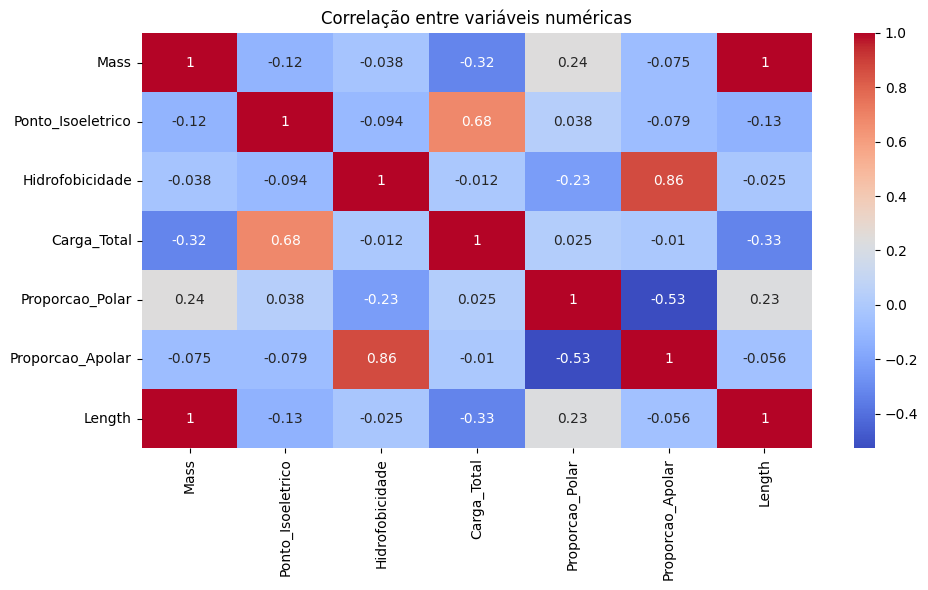


Distribuição das classes (puro):
Classes_GO
Enzima        87376
Receptora     82099
Estrutural    16528
Transporte    15047
Name: count, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Colunas numéricas disponíveis:")
print(df_puro.select_dtypes(include='number').columns.tolist())

print("\nResumo estatístico:")
print(df_puro.describe())

plt.figure(figsize=(10, 6))
sns.heatmap(df_puro.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis numéricas")
plt.tight_layout()
plt.show()

print("\nDistribuição das classes (puro):")
print(df_puro['Classes_GO'].value_counts())


['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 'Proporcao_Polar', 'Proporcao_Apolar', 'Length']


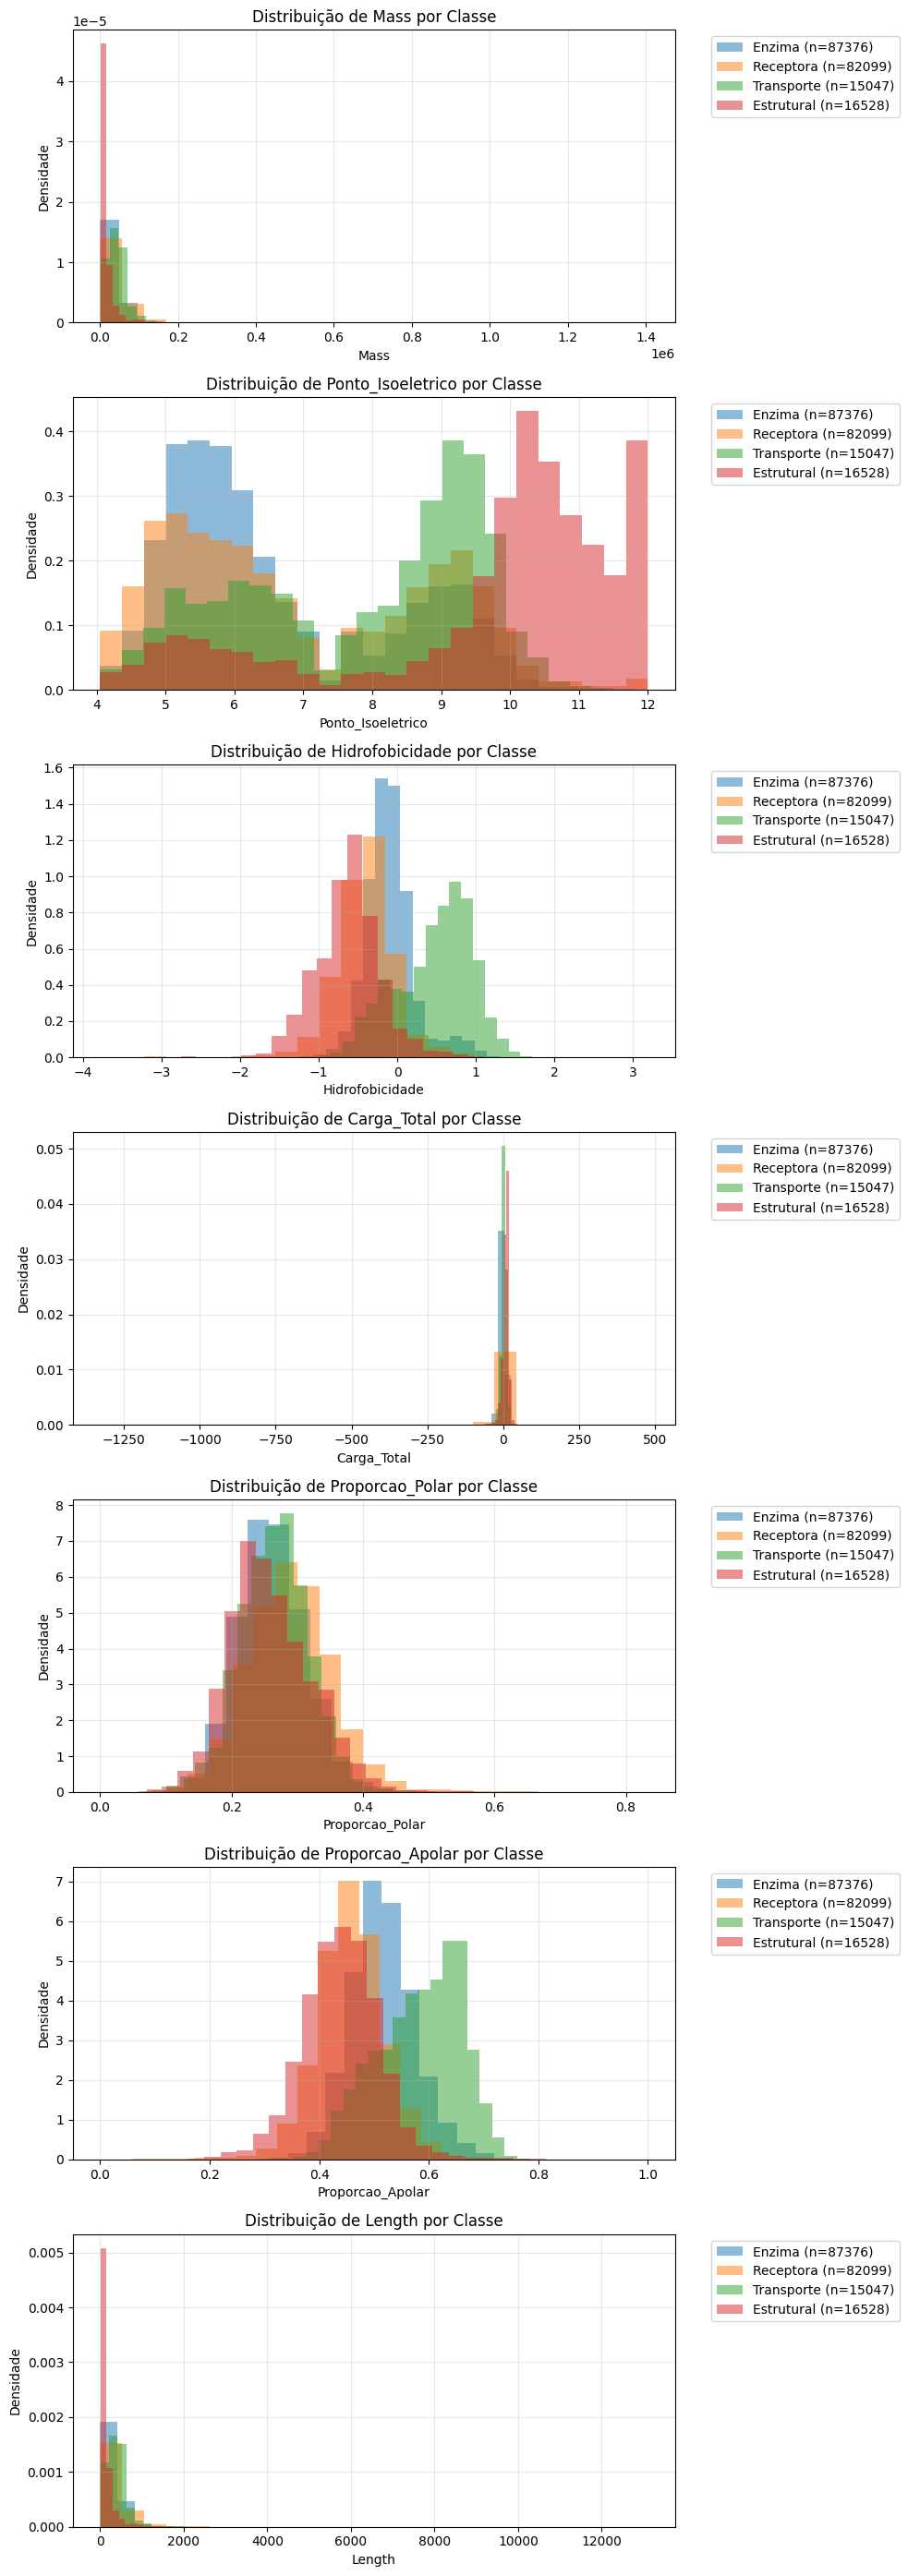

In [22]:
import matplotlib.pyplot as plt

df_puro_numericas = df_puro[['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 'Proporcao_Polar', 'Proporcao_Apolar', 'Length']]

colunas_numericas = df_puro_numericas.columns.tolist()

print(colunas_numericas)


fig, axes = plt.subplots(len(colunas_numericas), 1, 
                        figsize=(10, 4*len(colunas_numericas)))

if len(colunas_numericas) == 1:
    axes = [axes]

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, coluna in enumerate(colunas_numericas):
    ax = axes[i]
    
    for j, classe in enumerate(df_puro['Classes_GO'].unique()):
        dados_classe = df_puro[df_puro['Classes_GO'] == classe][coluna]
        ax.hist(dados_classe, bins=25, alpha=0.5, 
                label=f'{classe} (n={len(dados_classe)})', 
                color=cores[j], density=True)
    
    ax.set_xlabel(coluna)
    ax.set_ylabel('Densidade')
    ax.set_title(f'Distribuição de {coluna} por Classe')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Relatório de Classificação (df_puro):
              precision    recall  f1-score   support

      Enzima       0.80      0.80      0.80     17240
  Estrutural       0.80      0.81      0.80      3242
   Receptora       0.79      0.78      0.79     16704
  Transporte       0.74      0.75      0.74      3024

    accuracy                           0.79     40210
   macro avg       0.78      0.79      0.78     40210
weighted avg       0.79      0.79      0.79     40210

Matriz de Confusão:
[[13825   193  2766   456]
 [  205  2626   371    40]
 [ 2869   440 13082   313]
 [  422    25   306  2271]]


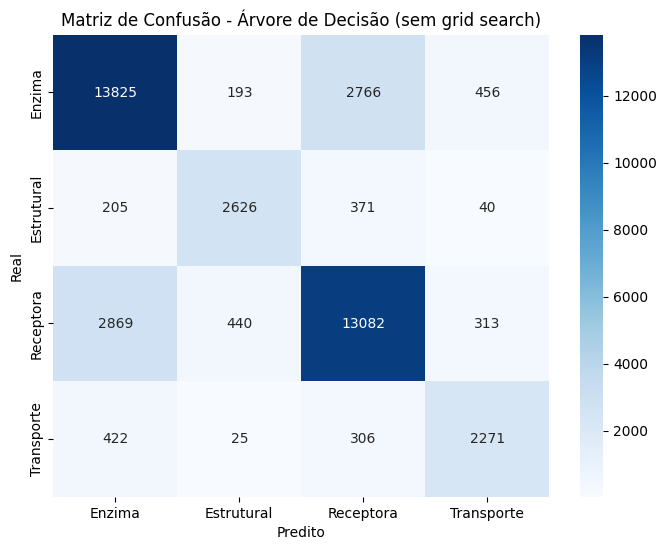

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_puro[['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total',
            'Proporcao_Polar', 'Proporcao_Apolar', 'Length']]
y = df_puro['Classes_GO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

clf = DecisionTreeClassifier(random_state=37)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nRelatório de Classificação (df_puro):")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Matriz de Confusão - Árvore de Decisão (sem grid search)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = { #Hiperparametros para variar
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree = DecisionTreeClassifier(random_state=37)

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                        cv=10, n_jobs=-1, scoring='f1_macro', verbose=1)

grid_search.fit(X_train, y_train)

# melhores parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Fitting 10 folds for each of 90 candidates, totalling 900 fits
Melhores parâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}



Relatório de Classificação (modelo otimizado):
              precision    recall  f1-score   support

      Enzima       0.78      0.82      0.80     17240
  Estrutural       0.82      0.81      0.82      3242
   Receptora       0.80      0.77      0.78     16704
  Transporte       0.77      0.74      0.75      3024

    accuracy                           0.79     40210
   macro avg       0.79      0.78      0.79     40210
weighted avg       0.79      0.79      0.79     40210

Matriz de Confusão:
[[14060   187  2633   360]
 [  220  2627   368    27]
 [ 3163   360 12904   277]
 [  469    23   303  2229]]


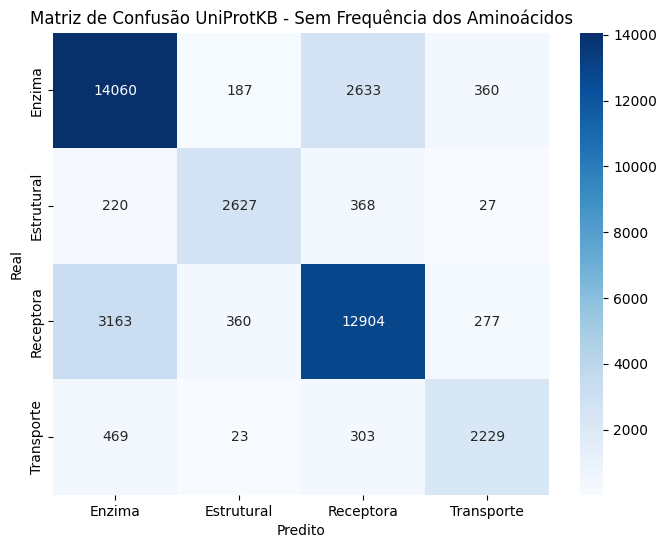

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# melhor modelo
best_model = grid_search.best_estimator_

# usando os melhores parâmetros
y_pred_best = best_model.predict(X_test)

print("\nRelatório de Classificação (modelo otimizado):")
print(classification_report(y_test, y_pred_best))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best))

matriz = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
        xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Matriz de Confusão UniProtKB - Sem Frequência dos Aminoácidos")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()



In [ ]:
# 20 aminoácidos padrão
aminoacidos = list('ACDEFGHIKLMNPQRSTVWY')

# calcular % de cada aminoácido
def calcular_frequencias(seq):
    seq = str(seq).upper()
    total = len(seq)
    frequencias = {aa: seq.count(aa) / total if total > 0 else 0 for aa in aminoacidos}
    return pd.Series(frequencias)

df_freqs = df_puro['Sequence'].apply(calcular_frequencias)

df_puro = pd.concat([df_puro.reset_index(drop=True), df_freqs.reset_index(drop=True)], axis=1)


          A         C         D         E         F         G         H  \
0  0.040892  0.000000  0.074349  0.085502  0.014870  0.029740  0.018587   
1  0.082915  0.000000  0.071608  0.045226  0.040201  0.056533  0.021357   
2  0.112903  0.024194  0.072581  0.024194  0.040323  0.088710  0.016129   
3  0.077406  0.020921  0.041841  0.033473  0.069038  0.048117  0.027197   
4  0.049689  0.049689  0.043478  0.105590  0.049689  0.049689  0.031056   

          I         K         L         M         N         P         Q  \
0  0.096654  0.126394  0.107807  0.011152  0.055762  0.022305  0.055762   
1  0.054020  0.046482  0.090452  0.018844  0.059045  0.065327  0.033920   
2  0.048387  0.032258  0.096774  0.020161  0.048387  0.060484  0.032258   
3  0.056485  0.048117  0.125523  0.033473  0.048117  0.037657  0.037657   
4  0.031056  0.068323  0.068323  0.006211  0.093168  0.049689  0.024845   

          R         S         T         V         W         Y  
0  0.033457  0.081784  0.059480  0

Melhores parâmetros encontrados:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2}

Relatório de Classificação (modelo otimizado):
              precision    recall  f1-score   support

      Enzima       0.84      0.87      0.86     17475
  Estrutural       0.87      0.84      0.85      3306
   Receptora       0.85      0.83      0.84     16420
  Transporte       0.82      0.77      0.80      3009

    accuracy                           0.85     40210
   macro avg       0.85      0.83      0.84     40210
weighted avg       0.85      0.85      0.85     40210



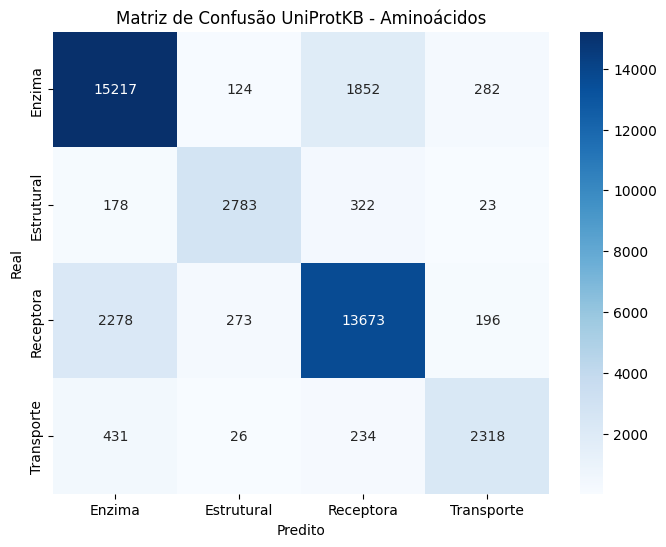

In [ ]:

# Atributos numéricos + frequências de aminoácidos
features = ['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 
            'Proporcao_Polar', 'Proporcao_Apolar', 'Length'] + list('ACDEFGHIKLMNPQRSTVWY')

X = df_puro[features]
y = df_puro['Classes_GO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37, stratify=y)

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=37), param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

melhor_modelo = grid_search.best_estimator_
y_pred = melhor_modelo.predict(X_test)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print("\nRelatório de Classificação (modelo otimizado):")
print(classification_report(y_test, y_pred))

matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=melhor_modelo.classes_, yticklabels=melhor_modelo.classes_)
plt.title("Matriz de Confusão UniProtKB - Aminoácidos")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Fitting 10 folds for each of 12 candidates, totalling 120 fits


c:\Users\dario\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:55:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhores parâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

Relatório de Classificação:
              precision    recall  f1-score   support

      Enzima       0.88      0.91      0.90     17475
  Estrutural       0.97      0.88      0.93      3306
   Receptora       0.89      0.89      0.89     16420
  Transporte       0.94      0.82      0.88      3009

    accuracy                           0.90     40210
   macro avg       0.92      0.88      0.90     40210
weighted avg       0.90      0.90      0.90     40210



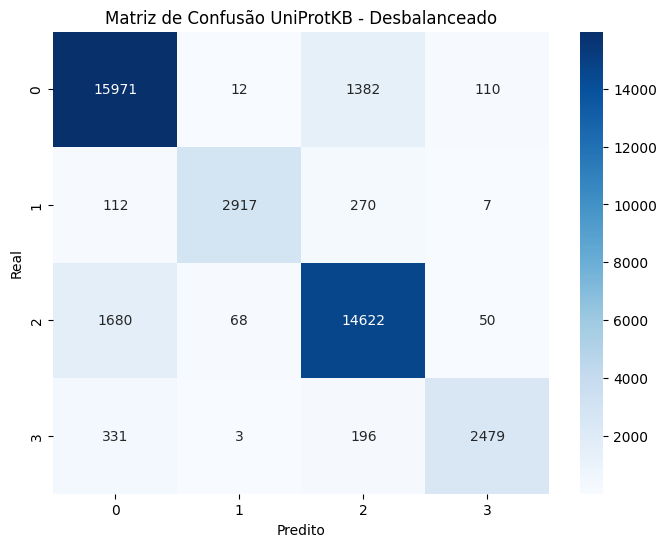

In [ ]:
%pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Features numéricas + frequências de aminoácidos
features = ['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total',
            'Proporcao_Polar', 'Proporcao_Apolar', 'Length'] + list('ACDEFGHIKLMNPQRSTVWY')

X = df_puro[features]
y = df_puro['Classes_GO']




le = LabelEncoder()
y_encoded = le.fit_transform(y)  # as classes agora são 0 1 2 3

classes = le.classes_



X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=37)

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=37)

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}


grid = GridSearchCV(xgb_clf, param_grid, cv=10, scoring='f1_macro', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Avaliação
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Melhores parâmetros encontrados:")
print(grid.best_params_)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=classes))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_,
            cmap='Blues')
plt.title("Matriz de Confusão UniProtKB - Desbalanceado")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


In [ ]:
# Quantidade por classe - pré balanceamento
print(df_puro['Classes_GO'].value_counts())


Classes_GO
Enzima        87376
Receptora     82099
Estrutural    16528
Transporte    15047
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

enzima = df_puro[df_puro['Classes_GO'] == 'Enzima']
receptora = df_puro[df_puro['Classes_GO'] == 'Receptora']
estrutural = df_puro[df_puro['Classes_GO'] == 'Estrutural']
transporte = df_puro[df_puro['Classes_GO'] == 'Transporte']

min_size = min(len(estrutural), len(transporte))

enzima_bal = resample(enzima, replace=False, n_samples=min_size, random_state=37)
receptora_bal = resample(receptora, replace=False, n_samples=min_size, random_state=37)
estrutural_bal = resample(estrutural, replace=False, n_samples=min_size, random_state=37)

df_balanceado = pd.concat([enzima_bal, receptora_bal, estrutural_bal, transporte])

df_balanceado = df_balanceado.sample(frac=1, random_state=37).reset_index(drop=True)

# Classes com novo balanceamento
print(df_balanceado['Classes_GO'].value_counts())


Classes_GO
Receptora     15047
Enzima        15047
Estrutural    15047
Transporte    15047
Name: count, dtype: int64


Fitting 10 folds for each of 12 candidates, totalling 120 fits


c:\Users\dario\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:02:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhores parâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

Relatório de Classificação:
              precision    recall  f1-score   support

      Enzima       0.84      0.85      0.85      3010
  Estrutural       0.97      0.93      0.95      3009
   Receptora       0.81      0.86      0.83      3009
  Transporte       0.94      0.92      0.93      3010

    accuracy                           0.89     12038
   macro avg       0.89      0.89      0.89     12038
weighted avg       0.89      0.89      0.89     12038



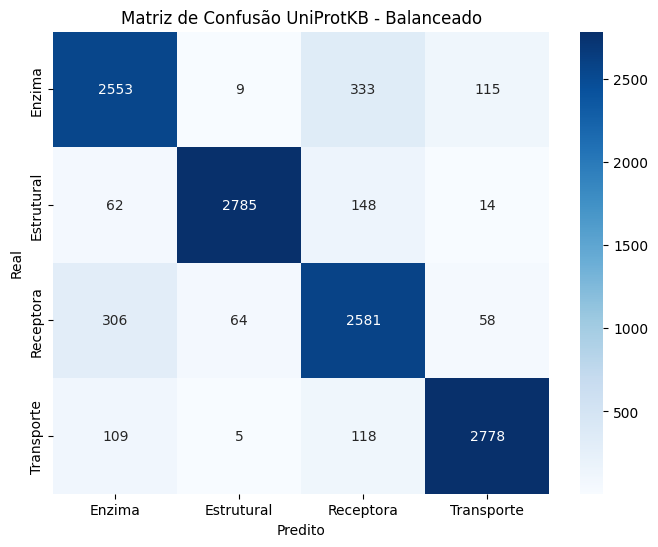

In [ ]:

# Features numéricas + frequências de aminoácidos
features = ['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 
            'Proporcao_Polar', 'Proporcao_Apolar', 'Length'] + list('ACDEFGHIKLMNPQRSTVWY')

X = df_balanceado[features]
y = df_balanceado['Classes_GO']

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0 1 2 3
classes = le.classes_

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=37)

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=37)

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

grid = GridSearchCV(xgb_clf, param_grid, cv=10, scoring='f1_macro', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Melhores parâmetros encontrados:")
print(grid.best_params_)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=classes))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.title("Matriz de Confusão UniProtKB - Balanceado")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


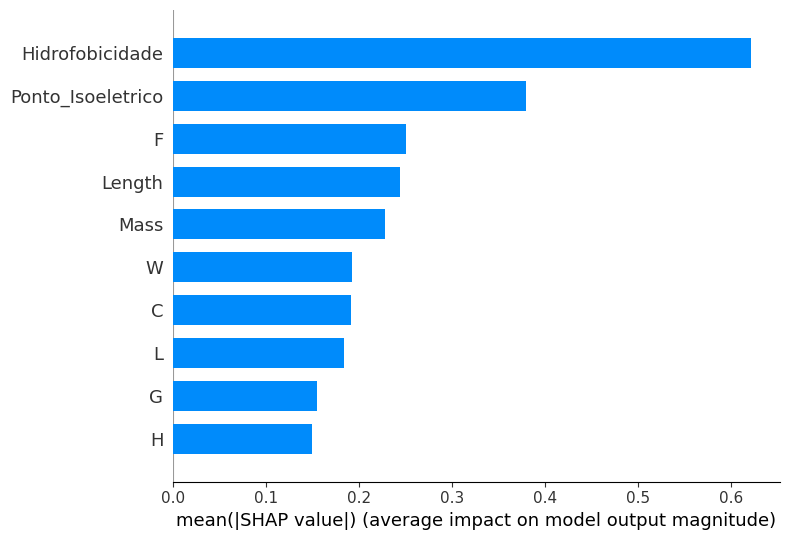

In [ ]:
%pip install shap
import shap
import numpy as np
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(best_model)

shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap_values_array = np.stack(shap_values, axis=2)
else:
    shap_values_array = shap_values  # Para de duas classes (facilitar comparação)

shap_values_global = np.mean(np.abs(shap_values_array), axis=2)

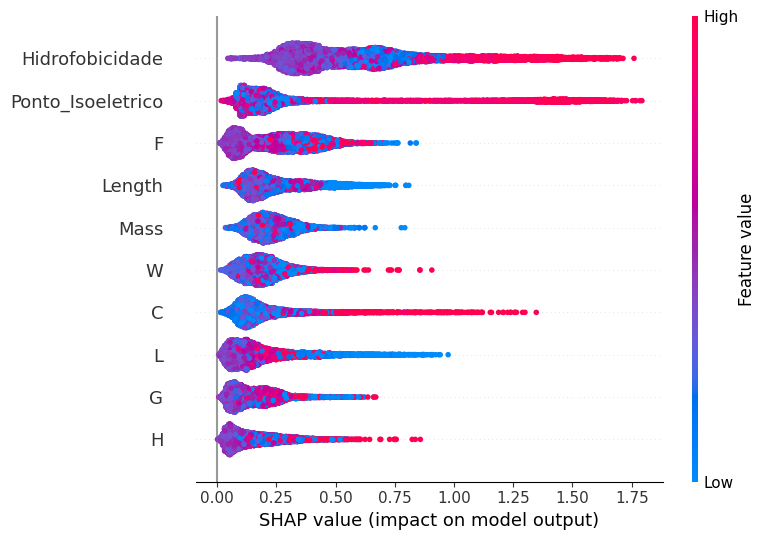

In [48]:
shap.summary_plot(shap_values_global, X_test, feature_names=X_test.columns, max_display=10, plot_type='dot')